# <div style="text-align: center;">Project 1: Data & Visualization</div>

In [2]:
# Packages
install.packages("tidyverse")
install.packages("ggrepel")
install.packages("ggcorrplot")
install.packages("DT")
install.packages("gridExtra")
install.packages("sf")
install.packages("modeest")
install.packages("factoextra")
install.packages("kableExtra")
install.packages("reshape2")
install.packages("knitr")
install.packages("caret")
install.packages("car")
install.packages("lubridate")

# Libraries
library("tidyverse")
library("ggrepel")
library("ggcorrplot")
library("DT")
library("gridExtra")
library("sf")
library("modeest")
library("knitr")
library("factoextra")
library("reshape2")
library("kableExtra")
library("knitr")
library("stringr")
library("caret")
library("car")
library("lubridate")


The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading req

In [4]:
# Define base directory
# base_dir <- "../../../../../../../Desktop/COVID-19/"
# base_dir <- "C:/Users/leona/OneDrive/CSMS/Data Mining (CS7331)/Projects/Project 1/COVID-19/"
base_dir <- "/Users/salissa/Desktop/Data Mining/Datasets/COVID-19"

# Use file.path() for better compatibility
global_mobility_path <- file.path(base_dir, "Global_Mobility_Report.csv")
covid_cases_census_path <- file.path(base_dir, "c19_census.csv")
covid_cases_tx_path <- file.path(base_dir, "c19_tx.csv")

In [6]:
# Custom function to read CSV files
read_data <- function(file_path, dataset_name) {
  if (file.exists(file_path)) {
    cat(paste0("\n--- Loading ", dataset_name, " ---\n"))
    # Suppress col_type messages
    return(read_csv(file_path, show_col_types = FALSE))
  } else {
    stop(paste0("Error: File not found -> ", file_path))
  }
}

# Load datasets
global_mobility <- read_data(global_mobility_path, "Global Mobility Data")
covid_cases_census <- read_data(covid_cases_census_path, "COVID-19 Cases and Census Data")
covid_cases_tx <- read_data(covid_cases_tx_path, "COVID-19 Cases for Texas")

cat("\n--- All datasets successfully loaded! ---\n")


--- Loading Global Mobility Data ---

--- Loading COVID-19 Cases and Census Data ---

--- Loading COVID-19 Cases for Texas ---

--- All datasets successfully loaded! ---


In [8]:
# Randomly display 10 rows global mobility data
global_mobility %>%
  sample_n(10)

country_region_code country_region sub_region_1              
1  IT                  Italy          Apulia                    
2  CA                  Canada         Quebec                    
3  US                  United States  Louisiana                 
4  IT                  Italy          Liguria                   
5  PL                  Poland         Lower Silesian Voivodeship
6  EC                  Ecuador        El Oro                    
7  CO                  Colombia       Caldas                    
8  DK                  Denmark        North Denmark Region      
9  US                  United States  Arkansas                  
10 AR                  Argentina      La Rioja Province         
   sub_region_2                      metro_area iso_3166_2_code
1  Province of Barletta-Andria-Trani NA         IT-BT          
2  Gatineau                          NA         NA             
3  Richland Parish                   NA         NA             
4  Province of La Spezia             NA         IT-SP          
5  Dzierżoniów County                NA         NA             
6  Pasaje                            NA         NA             
7  Manizales                         NA         NA             
8  Mariagerfjord Municipality        NA         NA             
9  Crittenden County                 NA         NA             
10 NA                                NA         AR-F           
   census_fips_code date      
1  NA               2020-06-02
2  NA               2021-01-21
3  22083            2021-01-07
4  NA               2020-07-12
5  NA               2020-05-15
6  NA               2020-12-04
7  NA               2021-01-01
8  NA               2020-11-01
9  05035            2020-09-15
10 NA               2020-08-03
   retail_and_recreation_percent_change_from_baseline
1   -5                                               
2  -57                                               
3   NA                                               
4  -10                                               
5   -7                                               
6   -1                                               
7  -76                                               
8   17                                               
9    9                                               
10 -45                                               
   grocery_and_pharmacy_percent_change_from_baseline
1  -38                                              
2  -25                                              
3   NA                                              
4  -10                                              
5   -3                                              
6   NA                                              
7  -61                                              
8   -6                                              
9   -1                                              
10  -4                                              
   parks_percent_change_from_baseline
1  205                               
2  -27                               
3   NA                               
4  128                               
5   NA                               
6   -1                               
7  -61                               
8   NA                               
9   NA                               
10 -90                               
   transit_stations_percent_change_from_baseline
1  -56                                          
2  -60                                          
3   -8                                          
4   74                                          
5  -43                                          
6  -30                                          
7  -61                                          
8   NA                                          
9   -7                                          
10 -56                                          
   workplaces_percent_change_from_baseline
1  -64                                    
2  -54                 

In [10]:
# View of data
glimpse(global_mobility)

Rows: 3,991,405
Columns: 14
$ country_region_code                                <chr> "AE", "AE", "AE", "…
$ country_region                                     <chr> "United Arab Emirat…
$ sub_region_1                                       <chr> NA, NA, NA, NA, NA,…
$ sub_region_2                                       <chr> NA, NA, NA, NA, NA,…
$ metro_area                                         <chr> NA, NA, NA, NA, NA,…
$ iso_3166_2_code                                    <chr> NA, NA, NA, NA, NA,…
$ census_fips_code                                   <chr> NA, NA, NA, NA, NA,…
$ date                                               <date> 2020-02-15, 2020-0…
$ retail_and_recreation_percent_change_from_baseline <dbl> 0, 1, -1, -2, -2, -…
$ grocery_and_pharmacy_percent_change_from_baseline  <dbl> 4, 4, 1, 1, 0, 1, 2…
$ parks_percent_change_from_baseline                 <dbl> 5, 4, 5, 5, 4, 6, 6…
$ transit_stations_percent_change_from_baseline      <dbl> 0, 1, 1, 0, -1, 1, …
$ workplaces

In [12]:
# Rename columns and filter dataset for key variables
global_mobility_filtered <- global_mobility %>%
  select(
    date,
    country = country_region,
    region_1 = sub_region_1,
    region_2 = sub_region_2,
    retail_change = retail_and_recreation_percent_change_from_baseline,
    grocery_change = grocery_and_pharmacy_percent_change_from_baseline,
    workplace_change = workplaces_percent_change_from_baseline,
    residential_change = residential_percent_change_from_baseline,
    transit_change = transit_stations_percent_change_from_baseline
  ) %>%
  select(date,
         country,
         region_1,
         region_2,
         retail_change,
         grocery_change,
         workplace_change,
         residential_change,
         transit_change)

In [14]:
# View only selected variables are displayed
global_mobility_filtered %>%
  head()

date       country              region_1 region_2 retail_change
1 2020-02-15 United Arab Emirates NA       NA        0           
2 2020-02-16 United Arab Emirates NA       NA        1           
3 2020-02-17 United Arab Emirates NA       NA       -1           
4 2020-02-18 United Arab Emirates NA       NA       -2           
5 2020-02-19 United Arab Emirates NA       NA       -2           
6 2020-02-20 United Arab Emirates NA       NA       -2           
  grocery_change workplace_change residential_change transit_change
1 4              2                1                   0            
2 4              2                1                   1            
3 1              2                1                   1            
4 1              2                1                   0            
5 0              2                1                  -1            
6 1              1                1                   1

In [16]:
# Verify column name change
colnames(global_mobility_filtered)

[1] "date"               "country"            "region_1"          
[4] "region_2"           "retail_change"      "grocery_change"    
[7] "workplace_change"   "residential_change" "transit_change"

In [18]:
# View filtered variables
glimpse(global_mobility_filtered)

Rows: 3,991,405
Columns: 9
$ date               <date> 2020-02-15, 2020-02-16, 2020-02-17, 2020-02-18, 20…
$ country            <chr> "United Arab Emirates", "United Arab Emirates", "Un…
$ region_1           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ region_2           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ retail_change      <dbl> 0, 1, -1, -2, -2, -2, -3, -2, -1, -3, -3, -2, 1, 1,…
$ grocery_change     <dbl> 4, 4, 1, 1, 0, 1, 2, 2, 3, 0, 2, 1, 5, 5, 7, 10, 7,…
$ workplace_change   <dbl> 2, 2, 2, 2, 2, 1, -1, 3, 4, 3, 3, 3, 3, 1, 5, 4, 4,…
$ residential_change <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, …
$ transit_change     <dbl> 0, 1, 1, 0, -1, 1, 0, -2, -1, -1, -2, -2, -1, -1, -…


In [24]:
# Filter for Texas, since we will focus on this region,
# before converting to factors
texas_mobility_data <- global_mobility_filtered %>%
  filter(country == "United States" & region_1 == "Texas")

In [26]:
# Confirming filtering success
glimpse(texas_mobility_data)

Rows: 64,162
Columns: 9
$ date               <date> 2020-02-15, 2020-02-16, 2020-02-17, 2020-02-18, 20…
$ country            <chr> "United States", "United States", "United States", …
$ region_1           <chr> "Texas", "Texas", "Texas", "Texas", "Texas", "Texas…
$ region_2           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ retail_change      <dbl> 3, 8, 6, -1, -2, -1, 2, 3, 4, 2, 6, 10, 11, 10, 10,…
$ grocery_change     <dbl> 3, 3, 2, -1, 0, -2, 0, 1, 1, 1, 2, 6, 6, 8, 8, 9, 7…
$ workplace_change   <dbl> 1, 1, -18, 1, 3, 1, 3, 4, 1, 3, 3, 4, 2, 1, 3, 2, 4…
$ residential_change <dbl> -1, -1, 4, 0, 1, 1, -1, -1, 0, 0, -1, -1, -2, -2, -…
$ transit_change     <dbl> 3, 4, 2, 3, 0, -1, 2, 3, 3, 2, 3, 5, 7, 7, 9, 7, 4,…


In [28]:
# Apply data type changes
texas_mobility_data <- texas_mobility_data %>%
  # Convert categorical variables from character to factor
  mutate(
    country = as.factor(country),
    region_1 = as.factor(region_1),
    region_2 = as.factor(region_2),
    # Data already in correct format
    # The following line is just for clarify
    date = as.Date(date),
  )

In [30]:
# Confirming data type change
glimpse(texas_mobility_data)

Rows: 64,162
Columns: 9
$ date               <date> 2020-02-15, 2020-02-16, 2020-02-17, 2020-02-18, 20…
$ country            <fct> United States, United States, United States, United…
$ region_1           <fct> Texas, Texas, Texas, Texas, Texas, Texas, Texas, Te…
$ region_2           <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ retail_change      <dbl> 3, 8, 6, -1, -2, -1, 2, 3, 4, 2, 6, 10, 11, 10, 10,…
$ grocery_change     <dbl> 3, 3, 2, -1, 0, -2, 0, 1, 1, 1, 2, 6, 6, 8, 8, 9, 7…
$ workplace_change   <dbl> 1, 1, -18, 1, 3, 1, 3, 4, 1, 3, 3, 4, 2, 1, 3, 2, 4…
$ residential_change <dbl> -1, -1, 4, 0, 1, 1, -1, -1, 0, 0, -1, -1, -2, -2, -…
$ transit_change     <dbl> 3, 4, 2, 3, 0, -1, 2, 3, 3, 2, 3, 5, 7, 7, 9, 7, 4,…


In [32]:
# Check for missing values in each column
missing_values <- texas_mobility_data %>%
  summarize(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(cols = everything(), names_to = "column", values_to = "missing_count") %>%
  mutate(missing_pct = (missing_count / nrow(texas_mobility_data)) * 100)

# View missing values summary
print(missing_values)

# A tibble: 9 × 3
  column             missing_count missing_pct
  <chr>                      <int>       <dbl>
1 date                           0       0    
2 country                        0       0    
3 region_1                       0       0    
4 region_2                     343       0.535
5 retail_change              23368      36.4  
6 grocery_change             26865      41.9  
7 workplace_change            4789       7.46 
8 residential_change         34106      53.2  
9 transit_change             34109      53.2  


In [34]:
# Remove rows with any missing values in the mobility columns
texas_mobility_data <- texas_mobility_data %>%
  drop_na(region_2, retail_change, grocery_change, workplace_change, residential_change, transit_change)

# Check how much data is left
cat("Remaining rows after missing value removal:", nrow(texas_mobility_data), "\n")

# Check how much data is left after removal
summary(texas_mobility_data)

Remaining rows after missing value removal: 18194 


      date                     country       region_1    
 Min.   :2020-02-15   United States:18194   Texas:18194  
 1st Qu.:2020-05-08                                      
 Median :2020-07-31                                      
 Mean   :2020-08-06                                      
 3rd Qu.:2020-11-07                                      
 Max.   :2021-01-22                                      
                                                         
           region_2     retail_change    grocery_change    workplace_change
 Bexar County  :  343   Min.   :-91.00   Min.   :-79.000   Min.   :-88.00  
 Dallas County :  343   1st Qu.:-21.00   1st Qu.:-11.000   1st Qu.:-36.00  
 El Paso County:  343   Median :-12.00   Median : -5.000   Median :-27.00  
 Harris County :  343   Mean   :-13.11   Mean   : -4.091   Mean   :-26.87  
 Hidalgo County:  343   3rd Qu.: -4.00   3rd Qu.:  3.000   3rd Qu.:-17.00  
 Midland County:  343   Max.   :152.00   Max.   : 69.000   Max.   : 27.00  
 (Ot

In [36]:
# Identify duplicate rows
duplicates <- texas_mobility_data %>%
  filter(duplicated(.))

# Count duplicate rows
num_duplicates <- nrow(duplicates)

# View duplicates
cat("Number of duplicate rows:", num_duplicates, "\n")

Number of duplicate rows: 0 


In [38]:
# Remove duplicates only if they exist
if (num_duplicates > 0) {
  texas_mobility_data <- texas_mobility_data %>%
    distinct()
  cat("Duplicates removed. New dataset size:", nrow(texas_mobility_data), "rows\n")
} else {
  cat("No duplicate rows found.\n")
}

No duplicate rows found.


In [40]:
# Define a function to count outliers using IQR
count_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  sum(x < (Q1 - 1.5 * IQR_value) | x > (Q3 + 1.5 * IQR_value), na.rm = TRUE)
}

# Create a summary table of outliers for each mobility change column
outlier_summary <- texas_mobility_data %>%
  summarize(across(
    c(retail_change, grocery_change, workplace_change, residential_change, transit_change),
    count_outliers,
    .names = "{.col}_outliers"
  )) %>%
  pivot_longer(everything(), names_to = "Column", values_to = "Outlier_Count")

# Print the table
print(outlier_summary, width=Inf)

# A tibble: 5 × 2
  Column                      Outlier_Count
  <chr>                               <int>
1 retail_change_outliers                521
2 grocery_change_outliers               531
3 workplace_change_outliers             269
4 residential_change_outliers           187
5 transit_change_outliers               157


In [42]:
# Custom function check if value is outlier using IQR
is_not_outlier <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  x >= (Q1 - 1.5 * IQR_value) & x <= (Q3 + 1.5 * IQR_value)
}

# Remove rows containing outliers
texas_mobility_data_cleaned <- texas_mobility_data %>%
  filter(
    is_not_outlier(retail_change) &
    is_not_outlier(grocery_change) &
    is_not_outlier(workplace_change) &
    is_not_outlier(residential_change) &
    is_not_outlier(transit_change)
  )

# How many rows were removed
rows_removed <- nrow(texas_mobility_data) - nrow(texas_mobility_data_cleaned)
cat("Number of rows removed due to outliers:", rows_removed, "\n")

Number of rows removed due to outliers: 1108 


In [44]:
# Stats after cleaning data
summary(texas_mobility_data_cleaned)

      date                     country       region_1    
 Min.   :2020-02-15   United States:17086   Texas:17086  
 1st Qu.:2020-05-13                                      
 Median :2020-08-03                                      
 Mean   :2020-08-07                                      
 3rd Qu.:2020-11-05                                      
 Max.   :2021-01-22                                      
                                                         
           region_2     retail_change    grocery_change    workplace_change
 Bexar County  :  331   Min.   :-46.00   Min.   :-32.000   Min.   :-64.0   
 Harris County :  331   1st Qu.:-21.00   1st Qu.:-11.000   1st Qu.:-35.0   
 Dallas County :  330   Median :-12.00   Median : -5.000   Median :-27.0   
 Ector County  :  328   Mean   :-12.37   Mean   : -3.995   Mean   :-25.8   
 Nueces County :  328   3rd Qu.: -4.00   3rd Qu.:  3.000   3rd Qu.:-17.0   
 Tarrant County:  327   Max.   : 21.00   Max.   : 24.000   Max.   : 11.0   
 (Ot

In [46]:
# Function to compute key statistics
compute_mobility_stats <- function(data, variables) {
  data %>%
    summarize(across(
      all_of(variables),
      list(
        Range = ~ max(.x, na.rm = TRUE) - min(.x, na.rm = TRUE),
        Mode = ~ mfv(.x),
        Mean = ~ mean(.x, na.rm = TRUE),
        Median = ~ median(.x, na.rm = TRUE),
        Variance = ~ var(.x, na.rm = TRUE),
        SD = ~ sd(.x, na.rm = TRUE)
      ),
      .names = "{.col}_{.fn}"
    ))
}

# Define mobility variables
mobility_variables <- c("retail_change", "grocery_change", "workplace_change", "residential_change", "transit_change")

# Compute statistics
mobility_stats_table <- compute_mobility_stats(texas_mobility_data_cleaned, mobility_variables)

# Convert to long format for better readability
mobility_stats_long <- mobility_stats_table %>%
  pivot_longer(cols = everything(),
               names_to = c("Variable", "Statistic"),
               names_pattern = "(.*)_(Range|Mode|Mean|Median|Variance|SD)",
               values_to = "Value") %>%
  pivot_wider(names_from = Statistic, values_from = Value)

# Print the table
print(mobility_stats_long, width=Inf)

# A tibble: 5 × 7
  Variable           Range  Mode   Mean Median Variance    SD
  <chr>              <dbl> <dbl>  <dbl>  <dbl>    <dbl> <dbl>
1 retail_change         67   -10 -12.4     -12    157.  12.5 
2 grocery_change        56    -5  -3.99     -5     97.4  9.87
3 workplace_change      75   -33 -25.8     -27    184.  13.6 
4 residential_change    29     7   8.83      9     30.0  5.47
5 transit_change       120    -3 -11.0      -9    396.  19.9 


In [48]:
# Display a static, nicely formatted table
kable(mobility_stats_long, caption = "Summary Statistics for Mobility Data")



Table: Summary Statistics for Mobility Data

|Variable           | Range| Mode|       Mean| Median|  Variance|        SD|
|:------------------|-----:|----:|----------:|------:|---------:|---------:|
|retail_change      |    67|  -10| -12.365914|    -12| 157.14722| 12.535838|
|grocery_change     |    56|   -5|  -3.994733|     -5|  97.41981|  9.870148|
|workplace_change   |    75|  -33| -25.801124|    -27| 184.17947| 13.571274|
|residential_change |    29|    7|   8.833489|      9|  29.97116|  5.474592|
|transit_change     |   120|   -3| -11.008779|     -9| 396.20665| 19.904940|

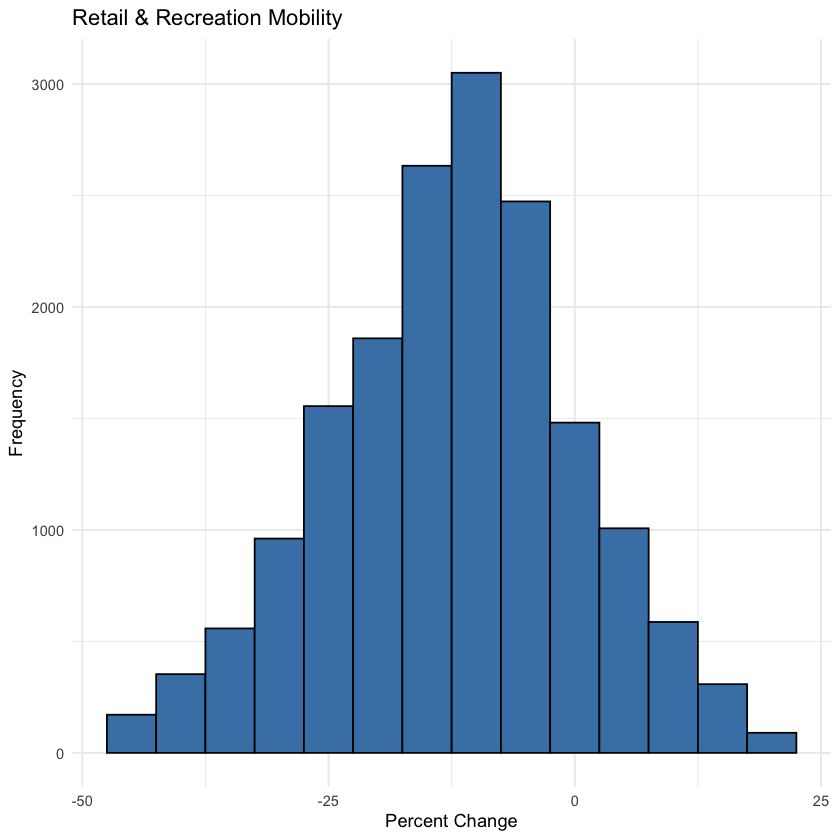

In [50]:
# 1. Retail and Recreation Percent Change Histogram
ggplot(texas_mobility_data_cleaned,
       aes(x = retail_change)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
  theme_minimal() +
  labs(title = "Retail & Recreation Mobility",
       x = "Percent Change",
       y = "Frequency")

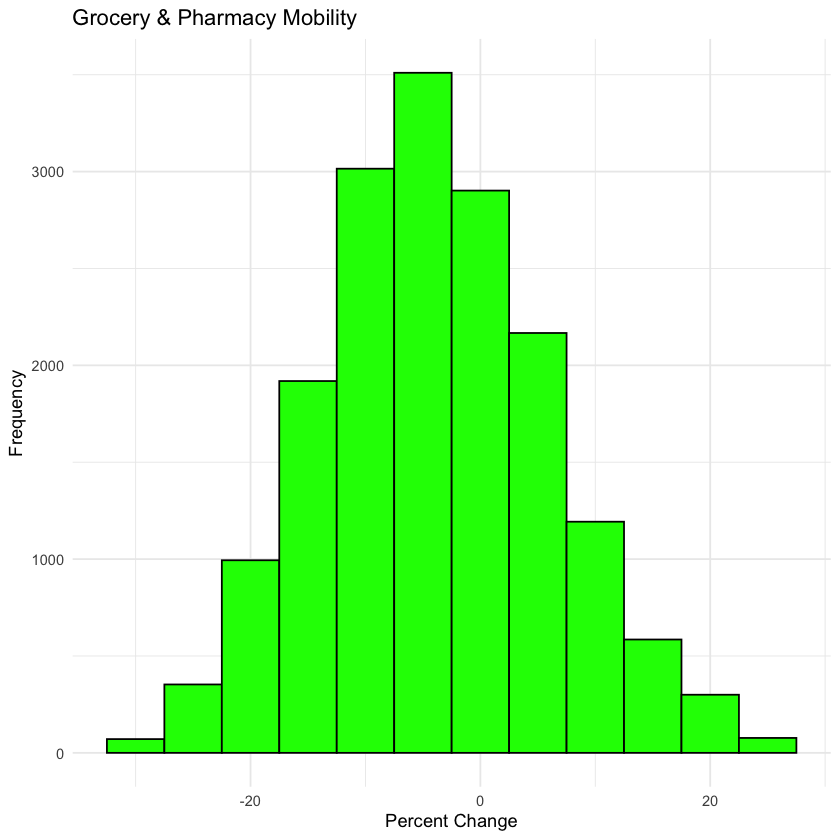

In [52]:
# 2. Grocery and Pharmacy Percent Change Histogram
ggplot(texas_mobility_data_cleaned,
       aes(x = grocery_change)) +
  geom_histogram(binwidth = 5, fill = "green", color = "black") +
  theme_minimal() +
  labs(title = "Grocery & Pharmacy Mobility",
       x = "Percent Change",
       y = "Frequency")

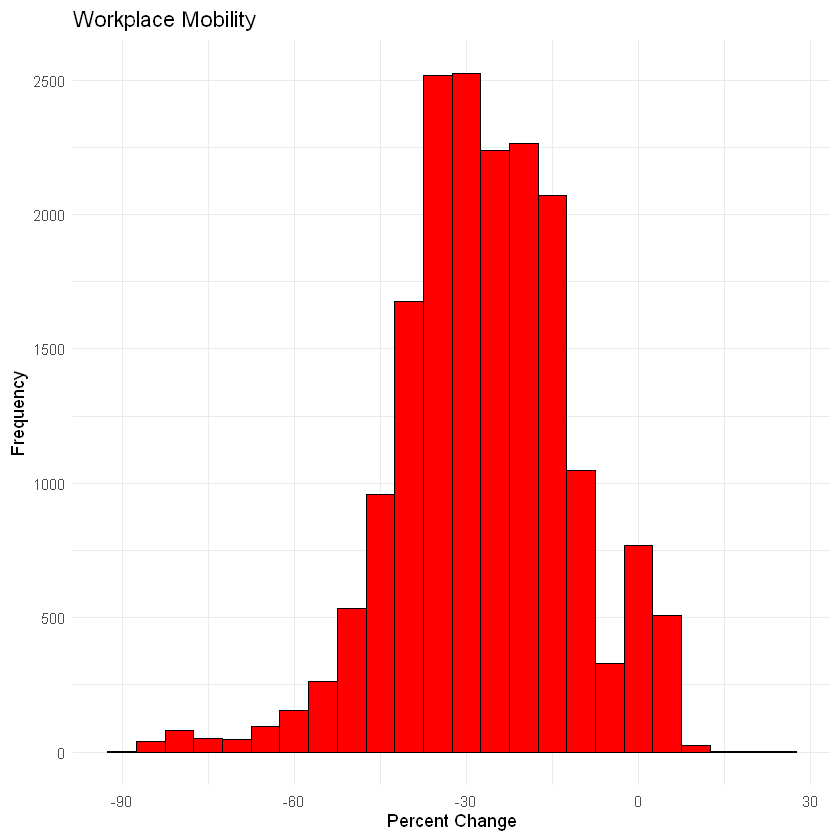

In [25]:
# Workplace Mobility Histogram
ggplot(texas_mobility_data, aes(x = workplace_change)) +
  geom_histogram(binwidth = 5, fill = "red", color = "black") +
  theme_minimal() +
  labs(title = "Workplace Mobility", x = "Percent Change", y = "Frequency")

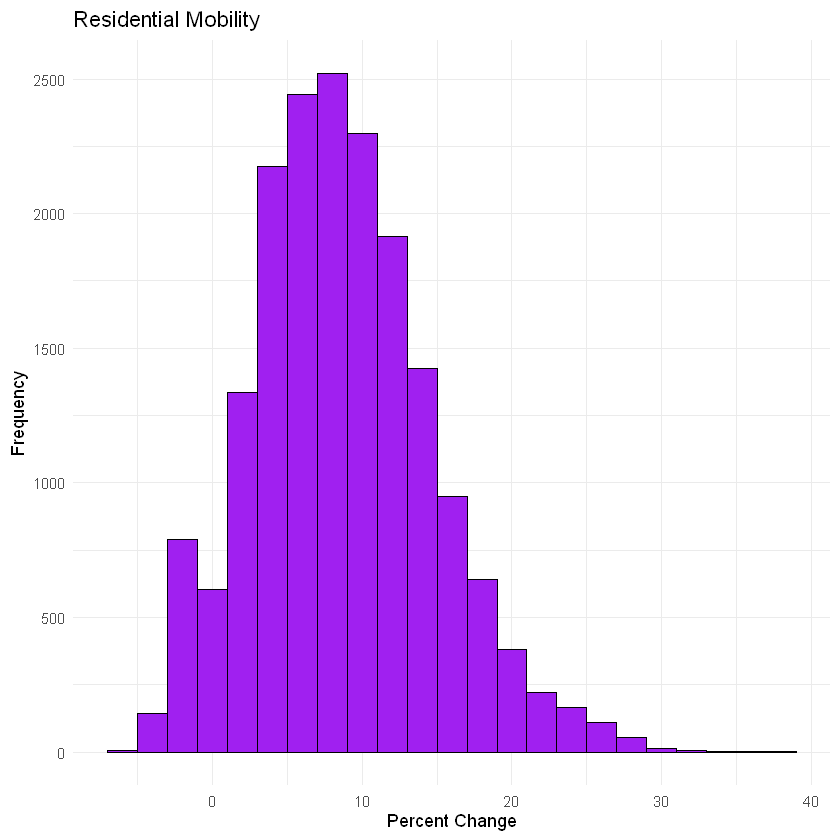

In [26]:
# Residential Mobility Histogram
ggplot(texas_mobility_data, aes(x = residential_change)) +
  geom_histogram(binwidth = 2, fill = "purple", color = "black") +
  theme_minimal() +
  labs(title = "Residential Mobility", x = "Percent Change", y = "Frequency")

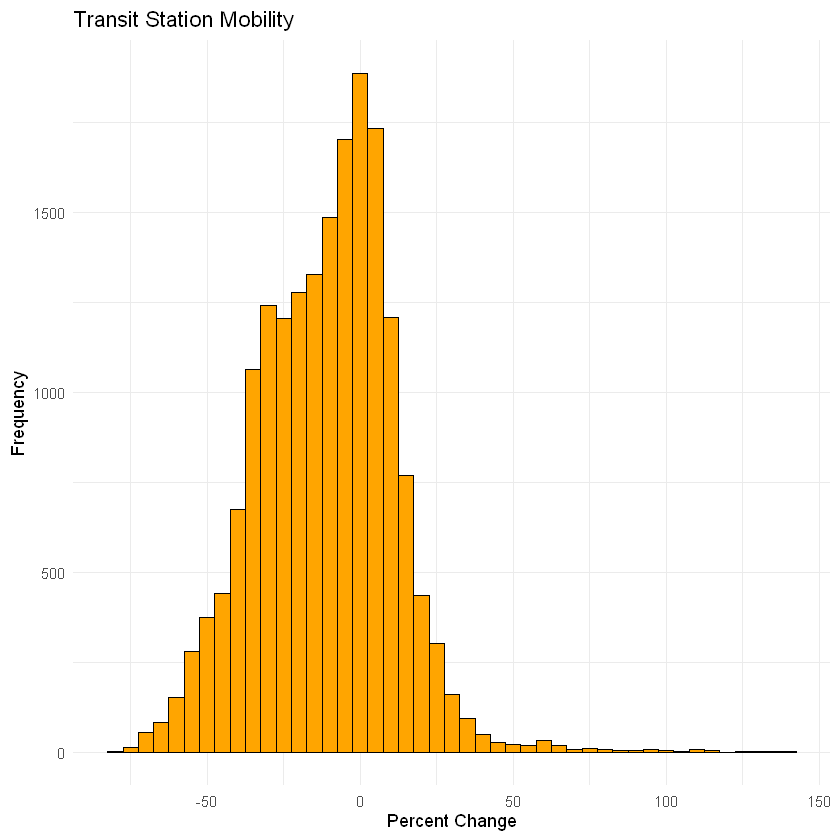

In [27]:
# Transit Station Mobility Histogram
ggplot(texas_mobility_data, 
       aes(x = transit_change)) +
  geom_histogram(binwidth = 5, fill = "orange", color = "black") +
  theme_minimal() +
  labs(title = "Transit Station Mobility",
       x = "Percent Change",
       y = "Frequency")

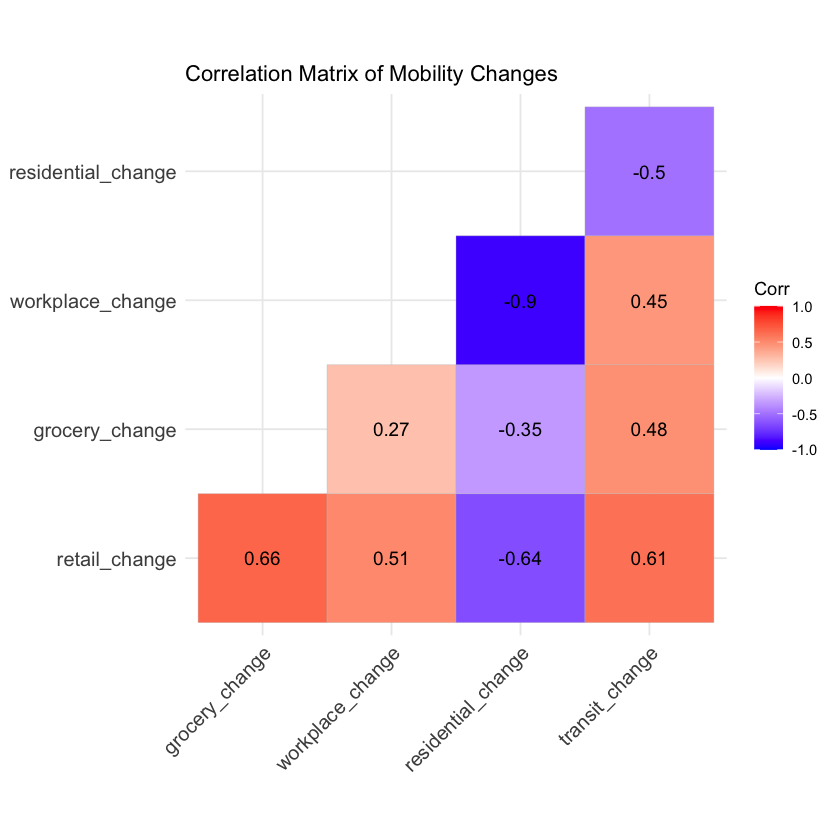

In [54]:
# Selecting variables for matrix
mobility_vars <- texas_mobility_data_cleaned %>%
  select(retail_change,
         grocery_change,
         workplace_change,
         residential_change,
         transit_change)

# Compute correlation matrix
cor_matrix <- cor(mobility_vars, use = "complete.obs")

# Plot heatmap
ggcorrplot(cor_matrix, method = "square", type = "lower", lab = TRUE,
           colors = c("blue", "white", "red"),
           title = "Correlation Matrix of Mobility Changes")

In [56]:
# Compute county-level averages for retail and workplace mobility
county_mobility <- texas_mobility_data_cleaned %>%
  group_by(region_2) %>%
  summarize(
    avg_retail = mean(retail_change, na.rm = TRUE),
    avg_workplace = mean(workplace_change, na.rm = TRUE)
  ) %>%
  arrange(avg_retail)

# View first few rows
head(county_mobility)

region_2         avg_retail avg_workplace
1 Maverick County  -27.31020  -31.44898    
2 Travis County    -25.96980  -36.43289    
3 Val Verde County -23.91176  -32.29412    
4 Webb County      -23.37778  -25.69524    
5 El Paso County   -22.26380  -30.12577    
6 Brazos County    -22.24906  -32.83774

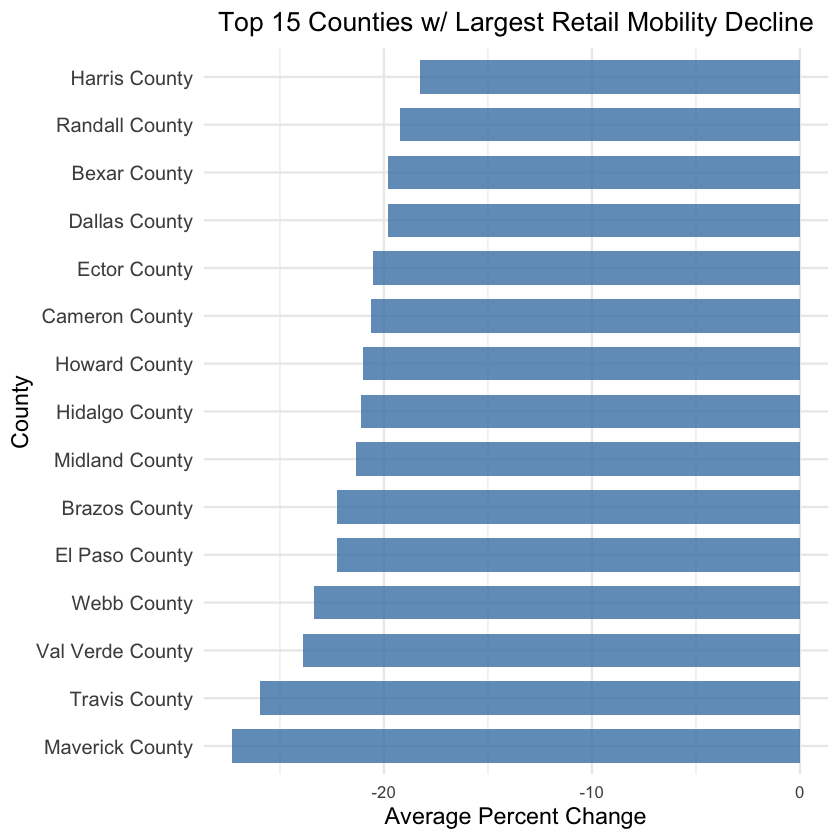

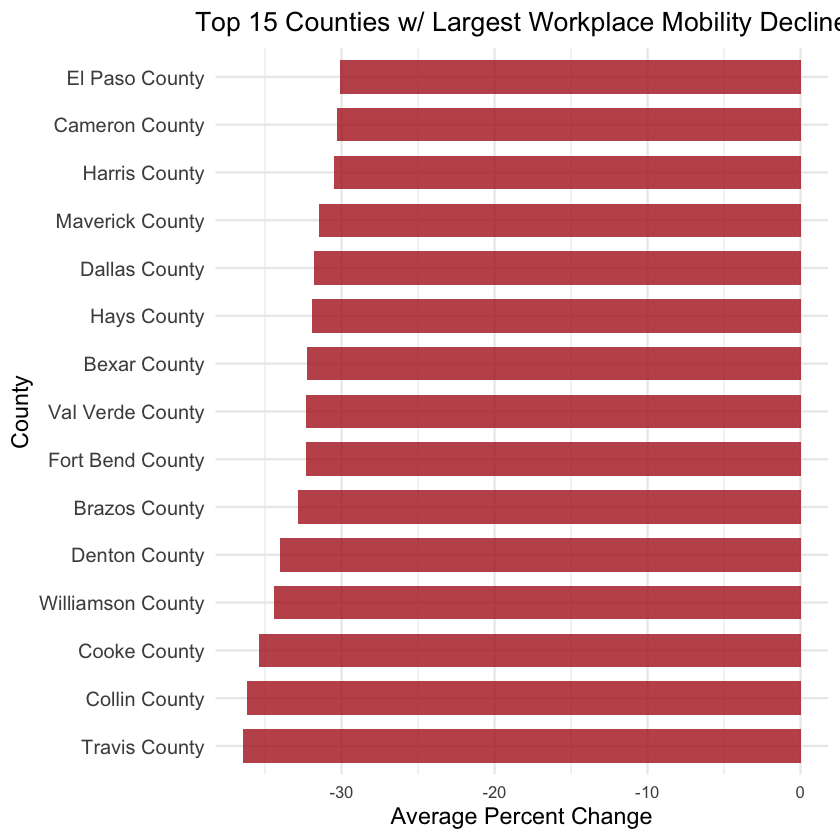

In [58]:
# Top 15 hardest-hit counties 
top_counties <- county_mobility %>%
  slice_min(avg_retail, n = 15)

# Bar plot retail mobility
ggplot(top_counties, aes(x = reorder(region_2, avg_retail), y = avg_retail)) +
  geom_col(fill = "steelblue", alpha = 0.8, width = 0.7) +  
  coord_flip() +
  theme_minimal(base_size = 14) + 
  labs(title = "Top 15 Counties w/ Largest Retail Mobility Decline",
       x = "County", y = "Average Percent Change") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),  
        axis.text.y = element_text(size = 12),  
        axis.text.x = element_text(size = 10)) 

# Bar plot workplace mobility 
top_counties <- county_mobility %>%
  slice_min(avg_workplace, n = 15)

# Create the bar plot
ggplot(top_counties, aes(x = reorder(region_2, avg_workplace), y = avg_workplace)) +
  geom_col(fill = "firebrick", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 15 Counties w/ Largest Workplace Mobility Decline",
       x = "County", y = "Average Percent Change") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),
        axis.text.y = element_text(size = 12),
        axis.text.x = element_text(size = 10))

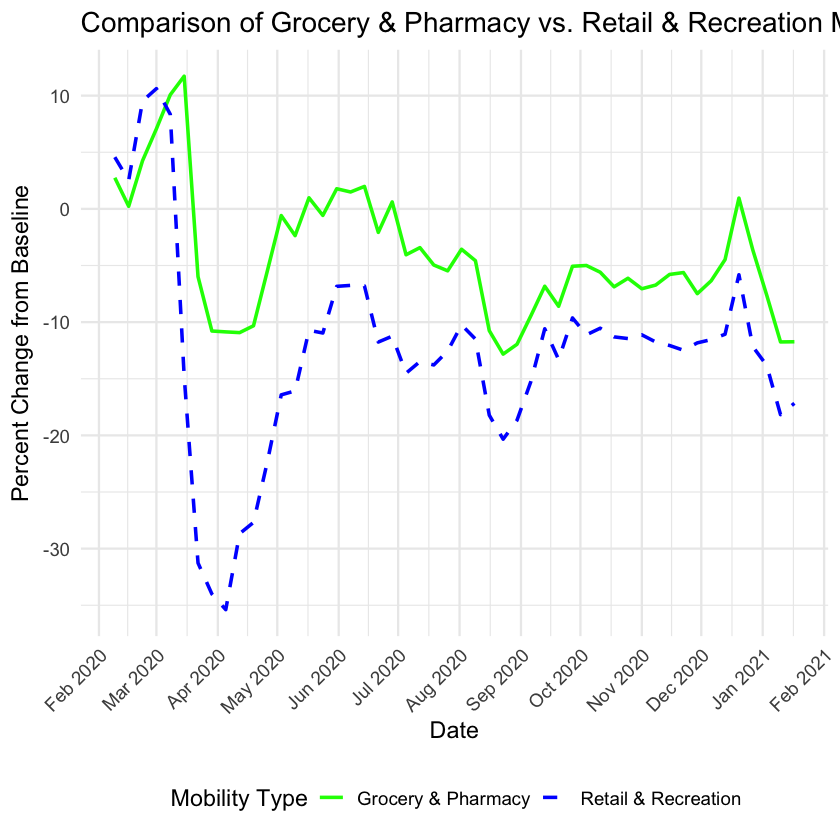

In [60]:
# Aggregate/week for smoother trends
mobility_trends <- texas_mobility_data_cleaned %>%
  mutate(week = floor_date(date, "week")) %>%
  group_by(week) %>%
  summarize(
    avg_grocery = mean(grocery_change, na.rm = TRUE),
    avg_retail = mean(retail_change, na.rm = TRUE)
  )

# Improved line plot with weekly data
ggplot(mobility_trends, aes(x = week)) +
  geom_line(aes(y = avg_grocery, color = "Grocery & Pharmacy"), linewidth = 1) +
  geom_line(aes(y = avg_retail, color = "Retail & Recreation"), linewidth = 1, linetype = "dashed") +
  theme_minimal(base_size = 14) +  
  scale_color_manual(values = c("Grocery & Pharmacy" = "green", "Retail & Recreation" = "blue")) +  
  labs(title = "Comparison of Grocery & Pharmacy vs. Retail & Recreation Mobility",  
       x = "Date", y = "Percent Change from Baseline", color = "Mobility Type") +  
  theme(legend.position = "bottom",
        legend.margin = margin(10, 10, 10, 10),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y")

In [62]:
# Filtering data for major metropolitan areas and rural areas
metro_areas <- c("Harris County", "Dallas County", "Travis County", "Bexar County", "Tarrant County", "Collin County", "Denton County") 
texas_mobility_data_cleaned$metro_area <- ifelse(texas_mobility_data_cleaned$region_2 %in% metro_areas, 
                                                 "Metro", "Rural")
# As factor
texas_mobility_data_cleaned$metro_area <- as.factor(texas_mobility_data_cleaned$metro_area)

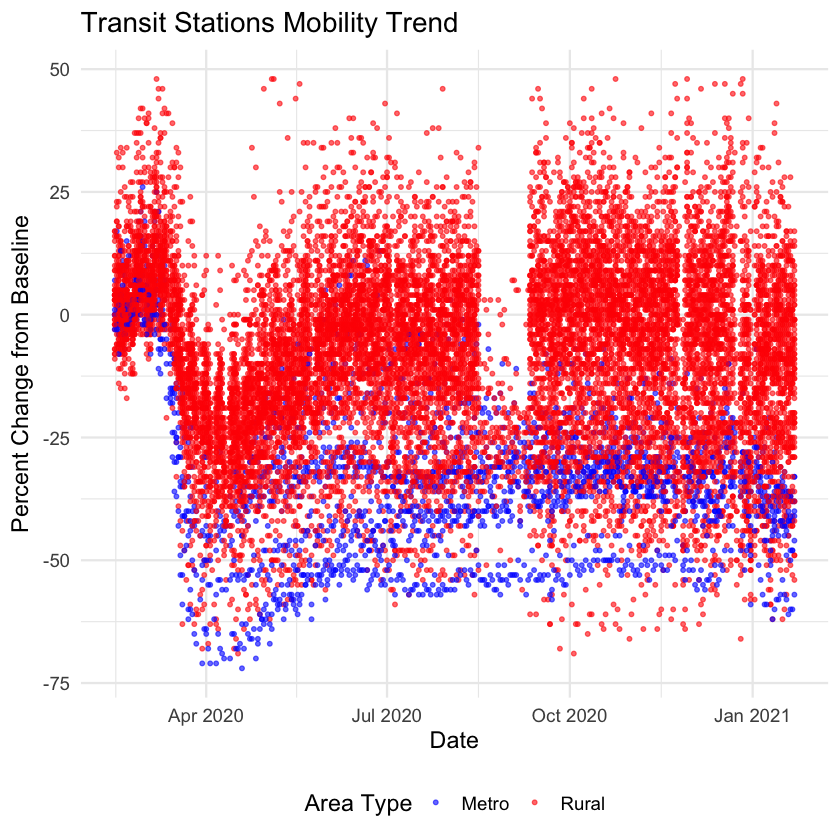

In [64]:
# Scatter plot for transit stations
ggplot(texas_mobility_data_cleaned, aes(x = date, y = transit_change, 
                                       color = metro_area)) +
  geom_point(alpha = 0.6, size = 1) +
  labs(title = "Transit Stations Mobility Trend", x = "Date", 
       y = "Percent Change from Baseline",
       color = "Area Type") +
  theme_minimal(base_size = 14) +
  scale_color_manual(values = c("Metro" = "blue", "Rural" = "red")) +
  theme(legend.position = "bottom")

In [34]:
# Group data by metro area and summarize mobility trends
summary_stats <- texas_mobility_data_cleaned %>%
  group_by(metro_area) %>%
  summarize(
    min_change = min(transit_change, na.rm = TRUE),
    avg_change = mean(transit_change, na.rm = TRUE),
    latest_change = transit_change[which.max(date)]
  )

print(summary_stats)

# A tibble: 2 × 4
  metro_area min_change avg_change latest_change
  <fct>           <dbl>      <dbl>         <dbl>
1 Metro             -72     -32.3            -33
2 Rural             -69      -7.82           -54


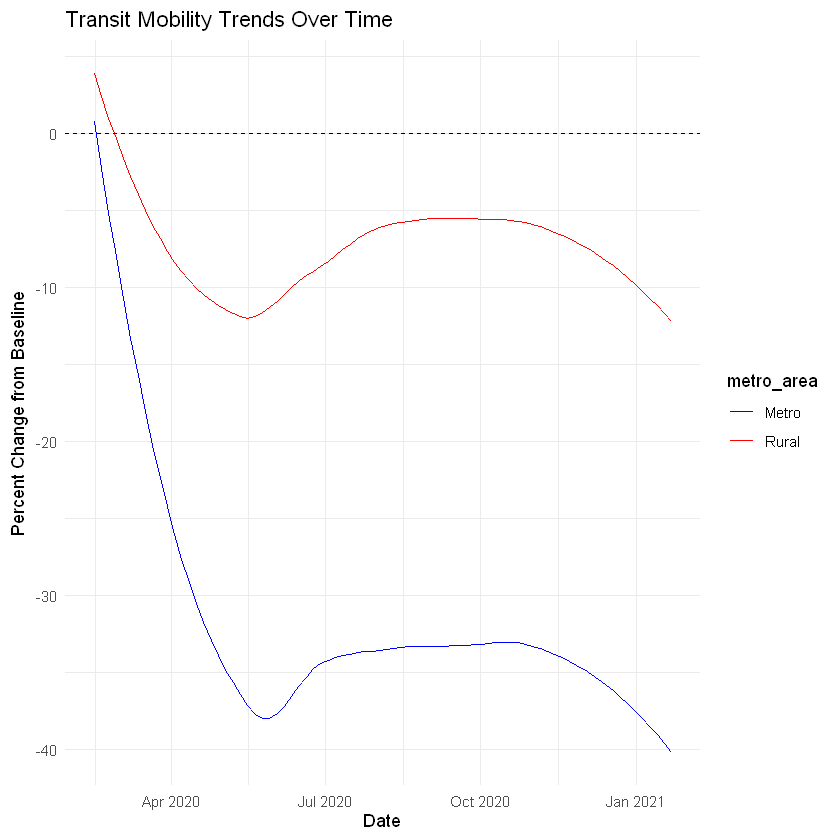

In [35]:
# Visual of trends
ggplot(texas_mobility_data_cleaned, 
       aes(x = as.Date(date), y = transit_change, color = metro_area)) +
  geom_line(stat = "smooth", formula = y ~ x, method = "loess", se = FALSE) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(title = "Transit Mobility Trends Over Time", 
       x = "Date", 
       y = "Percent Change from Baseline") +
  scale_color_manual(values = c("Metro" = "blue", "Rural" = "red")) +
  theme_minimal()

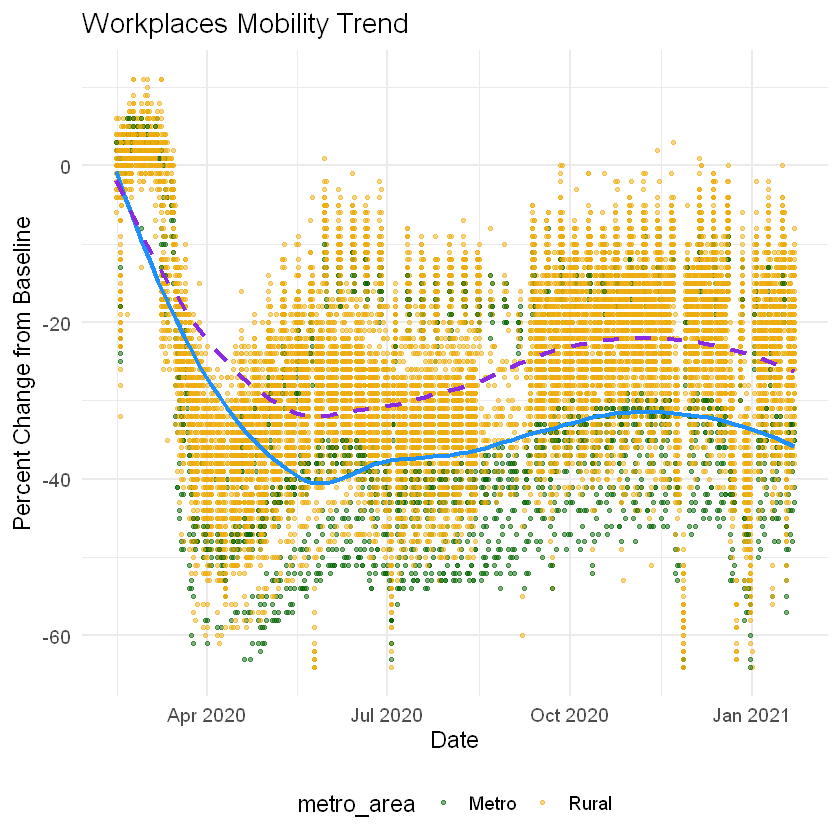

In [36]:
# Scatter plot for workplaces
ggplot(texas_mobility_data_cleaned, aes(x = as.Date(date), y = workplace_change, 
                                       color = metro_area)) +
  geom_point(alpha = 0.5, size = 1) +
 
  geom_smooth(data = subset(texas_mobility_data_cleaned, metro_area == "Metro"),
              method = "loess", formula = y ~ x, se = FALSE, linetype = "solid", linewidth = 1.2, color = "#1E90FF") + 
  geom_smooth(data = subset(texas_mobility_data_cleaned, metro_area == "Rural"),
              method = "loess", formula = y ~ x, se = FALSE, linetype = "dashed", linewidth = 1.2, color = "#8A2BE2") +
  labs(title = "Workplaces Mobility Trend", x = "Date", 
       y = "Percent Change from Baseline") +
  theme_minimal(base_size = 14) +
  scale_color_manual(values = c("Metro" = "darkgreen", "Rural" = "darkgoldenrod2")) +
  theme(legend.position = "bottom")

In [37]:
# Summary stats workplace mobility
summary_stats <- texas_mobility_data_cleaned %>%
  group_by(metro_area) %>%
  summarize(
    min_change = min(workplace_change, na.rm = TRUE),
    avg_change = mean(workplace_change, na.rm = TRUE),
    latest_change = workplace_change[which.max(date)]
  )

print(summary_stats)

# A tibble: 2 × 4
  metro_area min_change avg_change latest_change
  <fct>           <dbl>      <dbl>         <dbl>
1 Metro             -64      -32.8           -34
2 Rural             -64      -24.8           -14


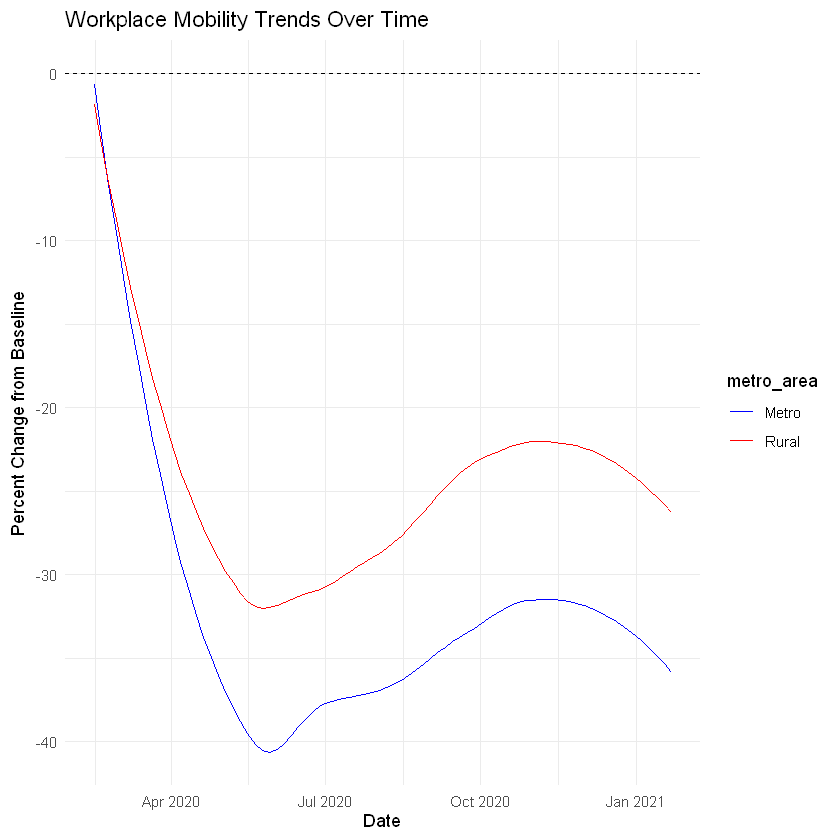

In [38]:
# Visual of trends
ggplot(texas_mobility_data_cleaned, aes(x = as.Date(date), y = workplace_change, color = metro_area)) +
  geom_line(stat = "smooth", formula = y ~ x, method = "loess", se = FALSE) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(title = "Workplace Mobility Trends Over Time", x = "Date", y = "Percent Change from Baseline") +
  scale_color_manual(values = c("Metro" = "blue", "Rural" = "red")) +
  theme_minimal()

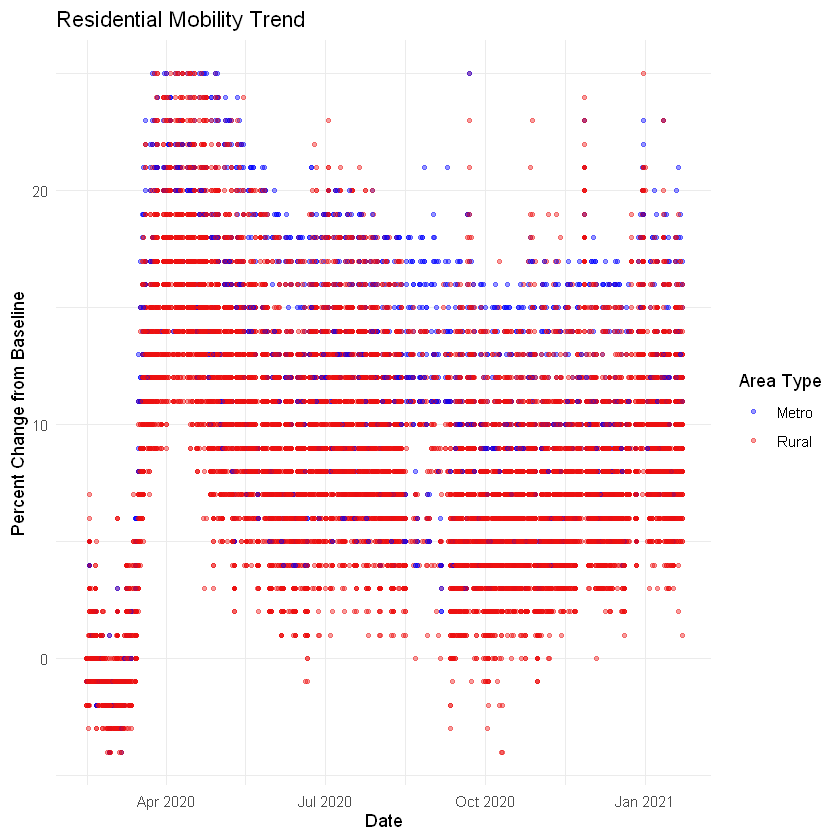

In [39]:
# Scatter plot for residential mobility
ggplot(texas_mobility_data_cleaned, 
       aes(x = as.Date(date), y = residential_change, color = metro_area)) +  
  geom_point(alpha = 0.4, size = 1) +  
  labs(title = "Residential Mobility Trend", 
       x = "Date", 
       y = "Percent Change from Baseline",
       color = "Area Type") + 
  theme_minimal() +
  scale_color_manual(values = c("Metro" = "blue1", "Rural" = "#ec1010")) 

In [40]:
# Summary stats residential
summary_stats <- texas_mobility_data_cleaned %>%
  group_by(metro_area) %>%
  summarize(
    min_change = min(residential_change, na.rm = TRUE),
    avg_change = mean(residential_change, na.rm = TRUE),
    latest_change = residential_change[which.max(date)]
  )

print(summary_stats)

# A tibble: 2 × 4
  metro_area min_change avg_change latest_change
  <fct>           <dbl>      <dbl>         <dbl>
1 Metro              -4      11.5             12
2 Rural              -4       8.44             7


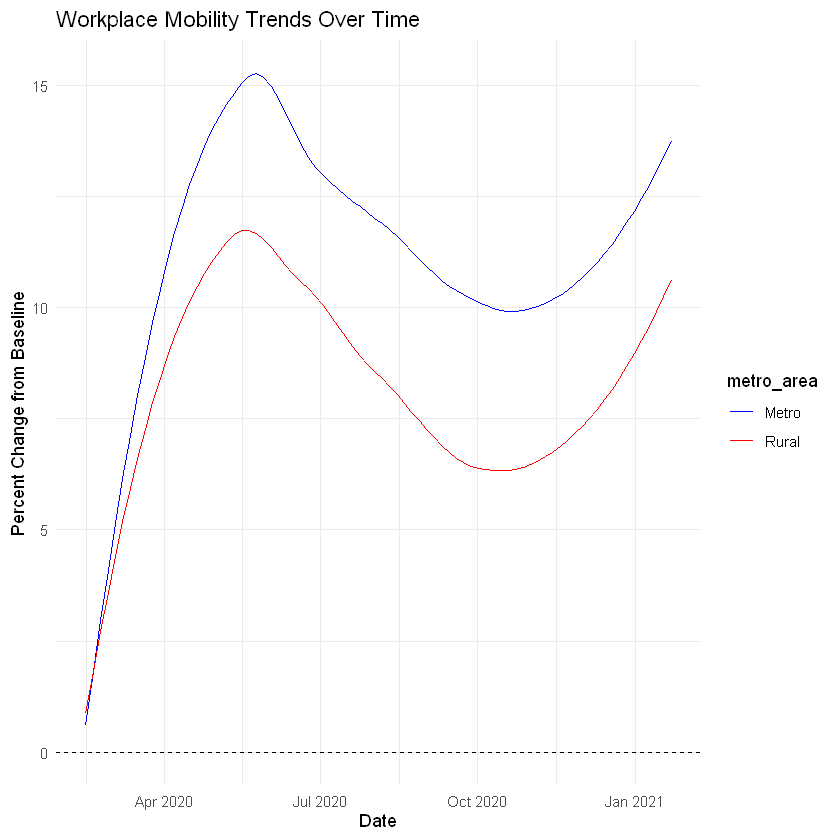

In [41]:
# Visual of trends
ggplot(texas_mobility_data_cleaned, aes(x = as.Date(date), y = residential_change, color = metro_area)) +
  geom_line(stat = "smooth", formula = y ~ x, method = "loess", se = FALSE) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(title = "Workplace Mobility Trends Over Time", x = "Date", y = "Percent Change from Baseline") +
  scale_color_manual(values = c("Metro" = "blue", "Rural" = "red")) +
  theme_minimal()

## Graduate Level Analysis: by Juan Carlos Dominguez

Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.7822 0.9880 0.70246 0.52511 0.28005
Proportion of Variance 0.6352 0.1953 0.09869 0.05515 0.01569
Cumulative Proportion  0.6352 0.8305 0.92917 0.98431 1.00000
                          PC1        PC2        PC3         PC4         PC5
retail_change      -0.4846627 -0.2578719 -0.1615188 -0.79081060 -0.21710466
grocery_change     -0.3761564 -0.6192678 -0.4583354  0.51225647  0.05035651
workplace_change   -0.4518306  0.5456696 -0.1068647  0.29443145 -0.63244275
residential_change  0.4890856 -0.4392028  0.1328170  0.01991946 -0.74152481
transit_change     -0.4245619 -0.2436290  0.8571931  0.15850943  0.02206616


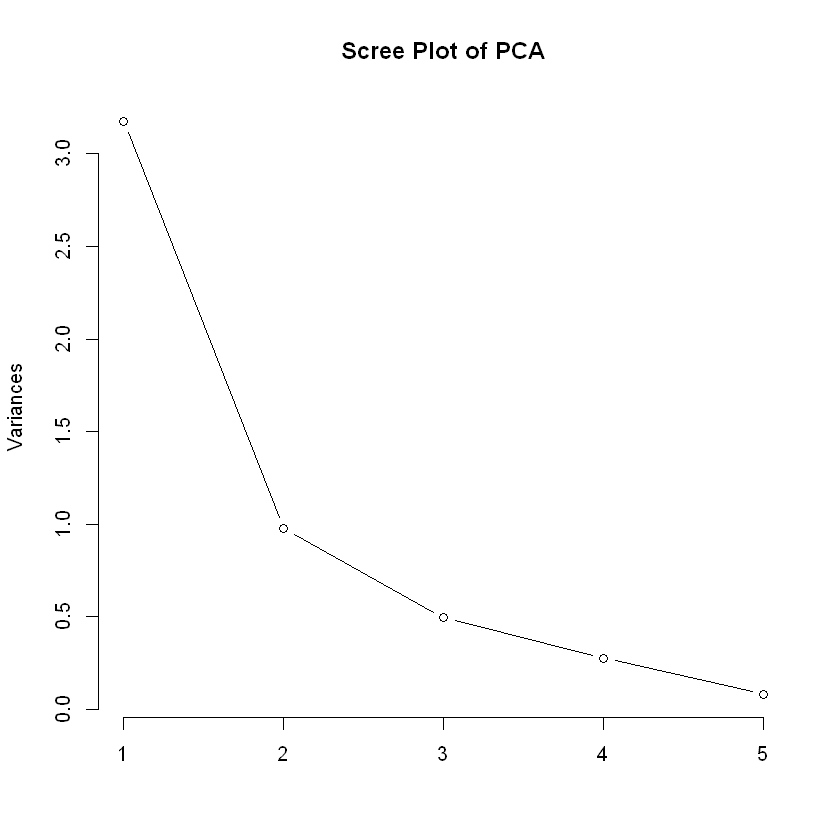

In [42]:
# Prepare data for PCA
mobility_features <- texas_mobility_data_cleaned %>%
  select(
    retail_change,
    grocery_change,
    workplace_change,
    residential_change,
    transit_change
  )

# Standardize data PCA
mobility_data_scaled <- scale(mobility_features)

# Perform PCA
pca <- prcomp(mobility_data_scaled, center = TRUE, scale. = TRUE)

# PCA Summary 
pca_summary <- summary(pca)
print(pca_summary)

# View PCA loadings - eigenvectors
print(pca$rotation)

# Scree plot to visualize variance
screeplot(pca, type = "lines", main = "Scree Plot of PCA")

   PC Standard_Deviation Variance_Explained Cumulative_Variance
1 PC1          1.7821721         0.63522751           0.6352275
2 PC2          0.9880482         0.19524785           0.8304754
3 PC3          0.7024639         0.09869111           0.9291665
4 PC4          0.5251115         0.05514842           0.9843149
5 PC5          0.2800456         0.01568511           1.0000000


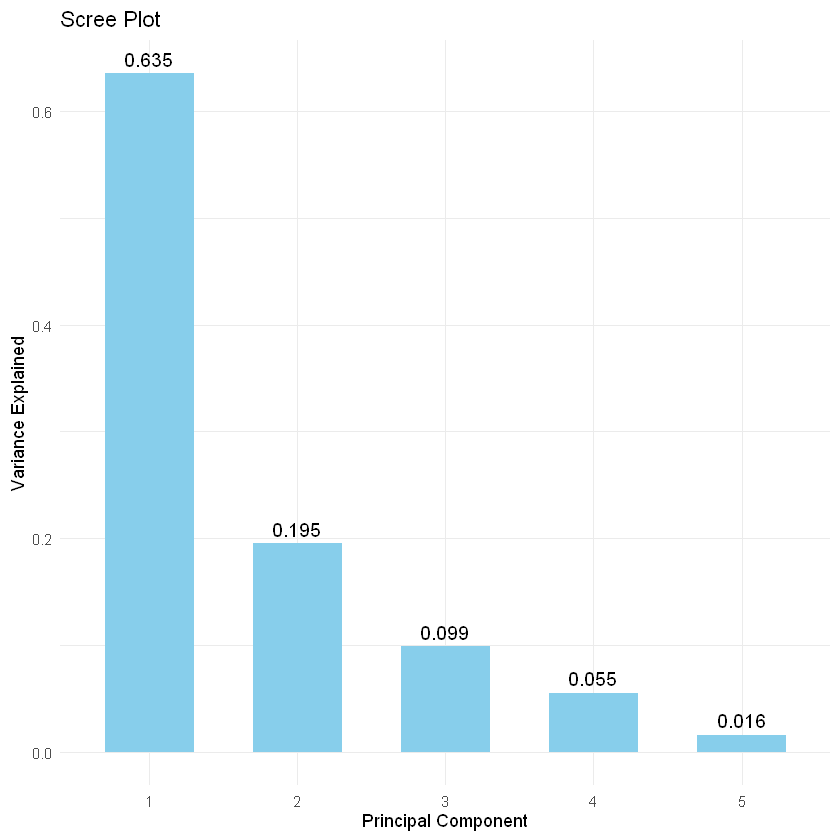

In [43]:
# Summary stats for PCA 
summary_stats_pca <- data.frame(
  PC = paste0("PC", 1:length(pca$sdev)),  
  Standard_Deviation = pca$sdev,  
  Variance_Explained = (pca$sdev^2) / sum(pca$sdev^2),  
  Cumulative_Variance = cumsum((pca$sdev^2) / sum(pca$sdev^2))  
)
 # View PCA stats
print(summary_stats_pca)  

# Extract PCA loadings 
pca_loadings <- as.data.frame(pca$rotation)
pca_loadings$Variable <- rownames(pca_loadings)
rownames(pca_loadings) <- NULL  

# Extract PCA scores &  county information
biplot_data <- as.data.frame(pca$x) %>%
  mutate(County = texas_mobility_data_cleaned$region_2)

# Scree Plot 
scree_data <- data.frame(
  PC = 1:length(pca$sdev),
  Variance = (pca$sdev^2) / sum(pca$sdev^2)
)

# Ensure PC is a factor 
scree_data$PC <- factor(scree_data$PC)

# Visualize Scree Plot
ggplot(scree_data, aes(x = PC, y = Variance)) +
  geom_bar(stat = "identity", fill = "skyblue", width = 0.6) +
  geom_text(aes(label = round(Variance, 3)), vjust = -0.5, size = 4) + 
  labs(title = "Scree Plot", x = "Principal Component", y = "Variance Explained") +
  theme_minimal()

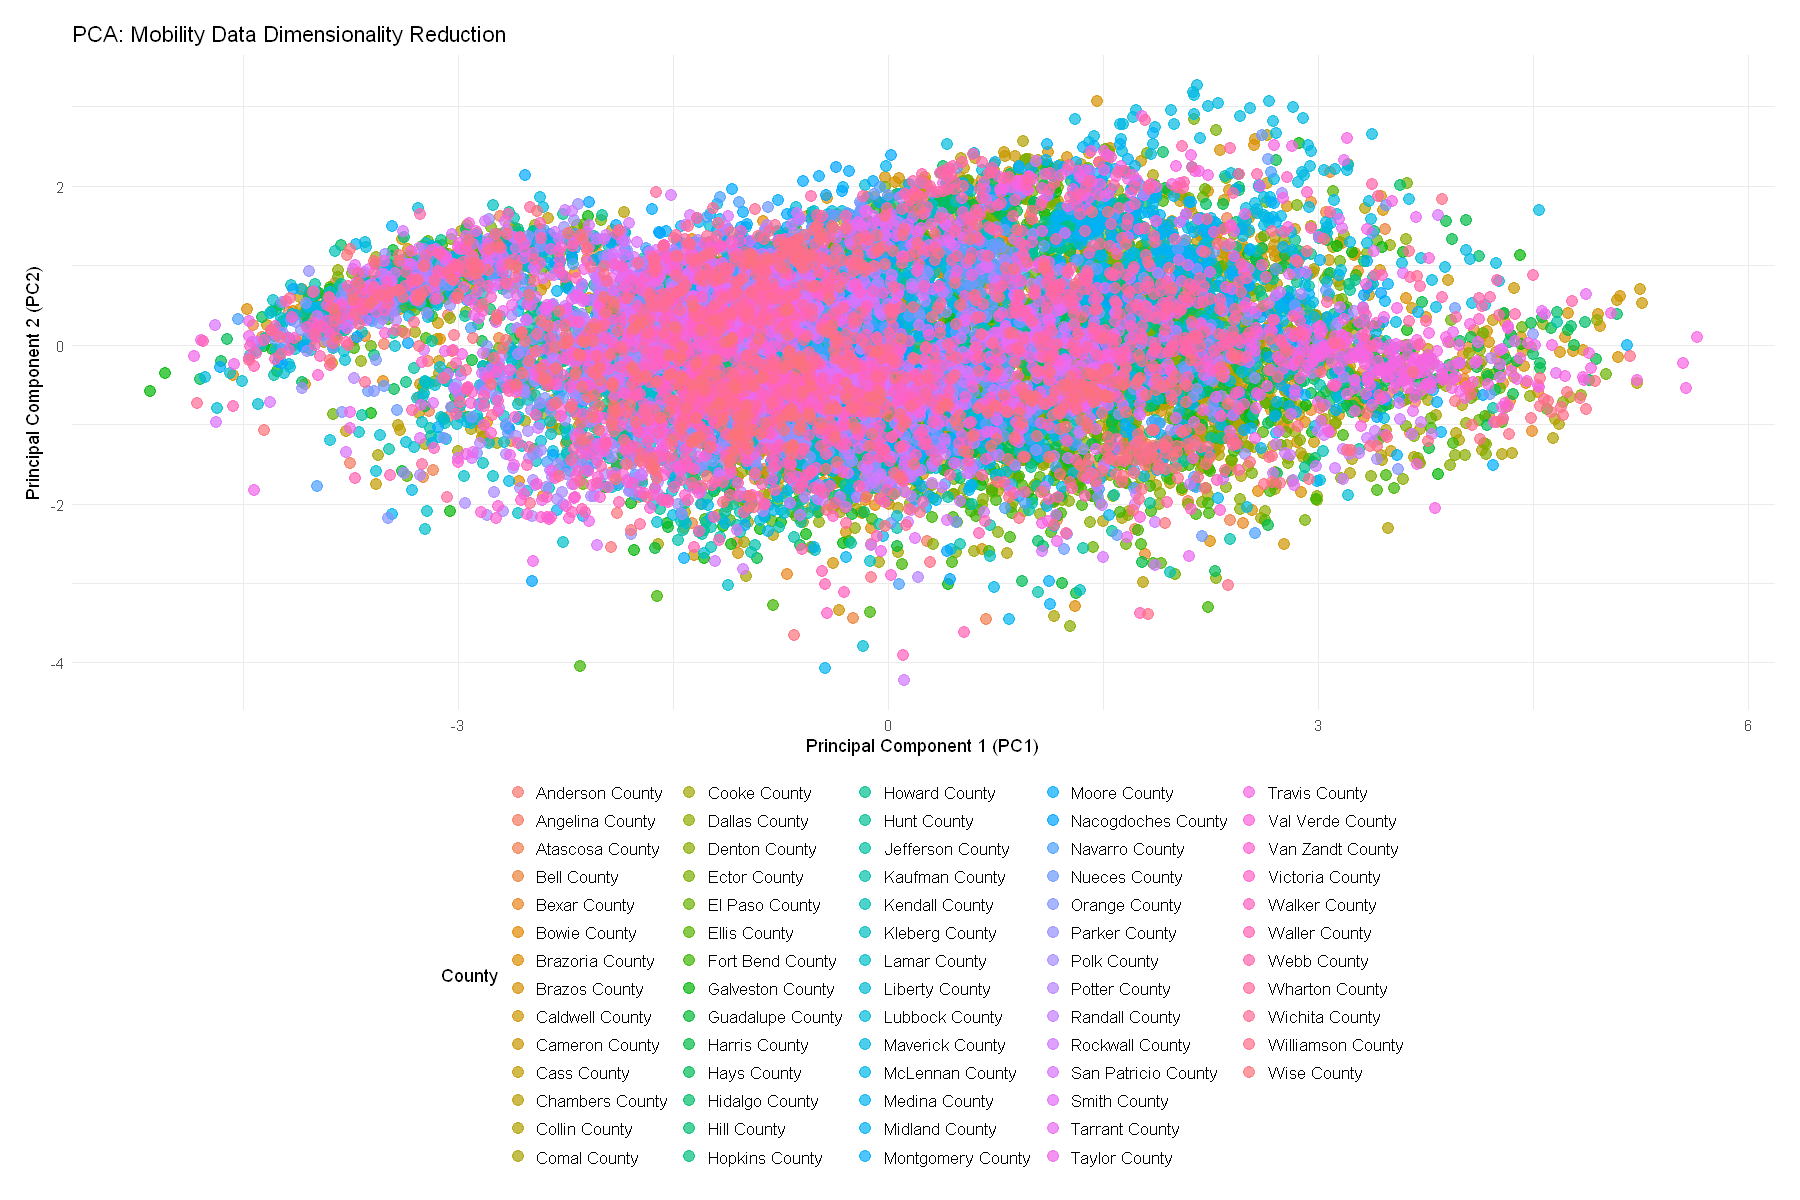

In [44]:
# PCA Plot (First Two Principal Components)
# Adjust plot size and improve visibility
pca_plot <- ggplot(biplot_data, aes(x = PC1, y = PC2, color = County)) +
  geom_point(alpha = 0.7, size = 3) + 
  labs(
    title = "PCA: Mobility Data Dimensionality Reduction",
    x = "Principal Component 1 (PC1)", 
    y = "Principal Component 2 (PC2)",
    color = "County"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",  
    legend.key.size = unit(0.4, "cm"),  
    legend.text = element_text(size = 10), 
    plot.margin = margin(15, 15, 15, 15) 
  ) +
  guides(color = guide_legend(ncol = 5))  

# Increase figure size 
options(repr.plot.width = 15, repr.plot.height = 10)

# Display the plot
print(pca_plot)

# Save the plot with adjusted dimensions
ggsave("pca_plot.png", plot = pca_plot, width = 12, height = 10, dpi = 300)

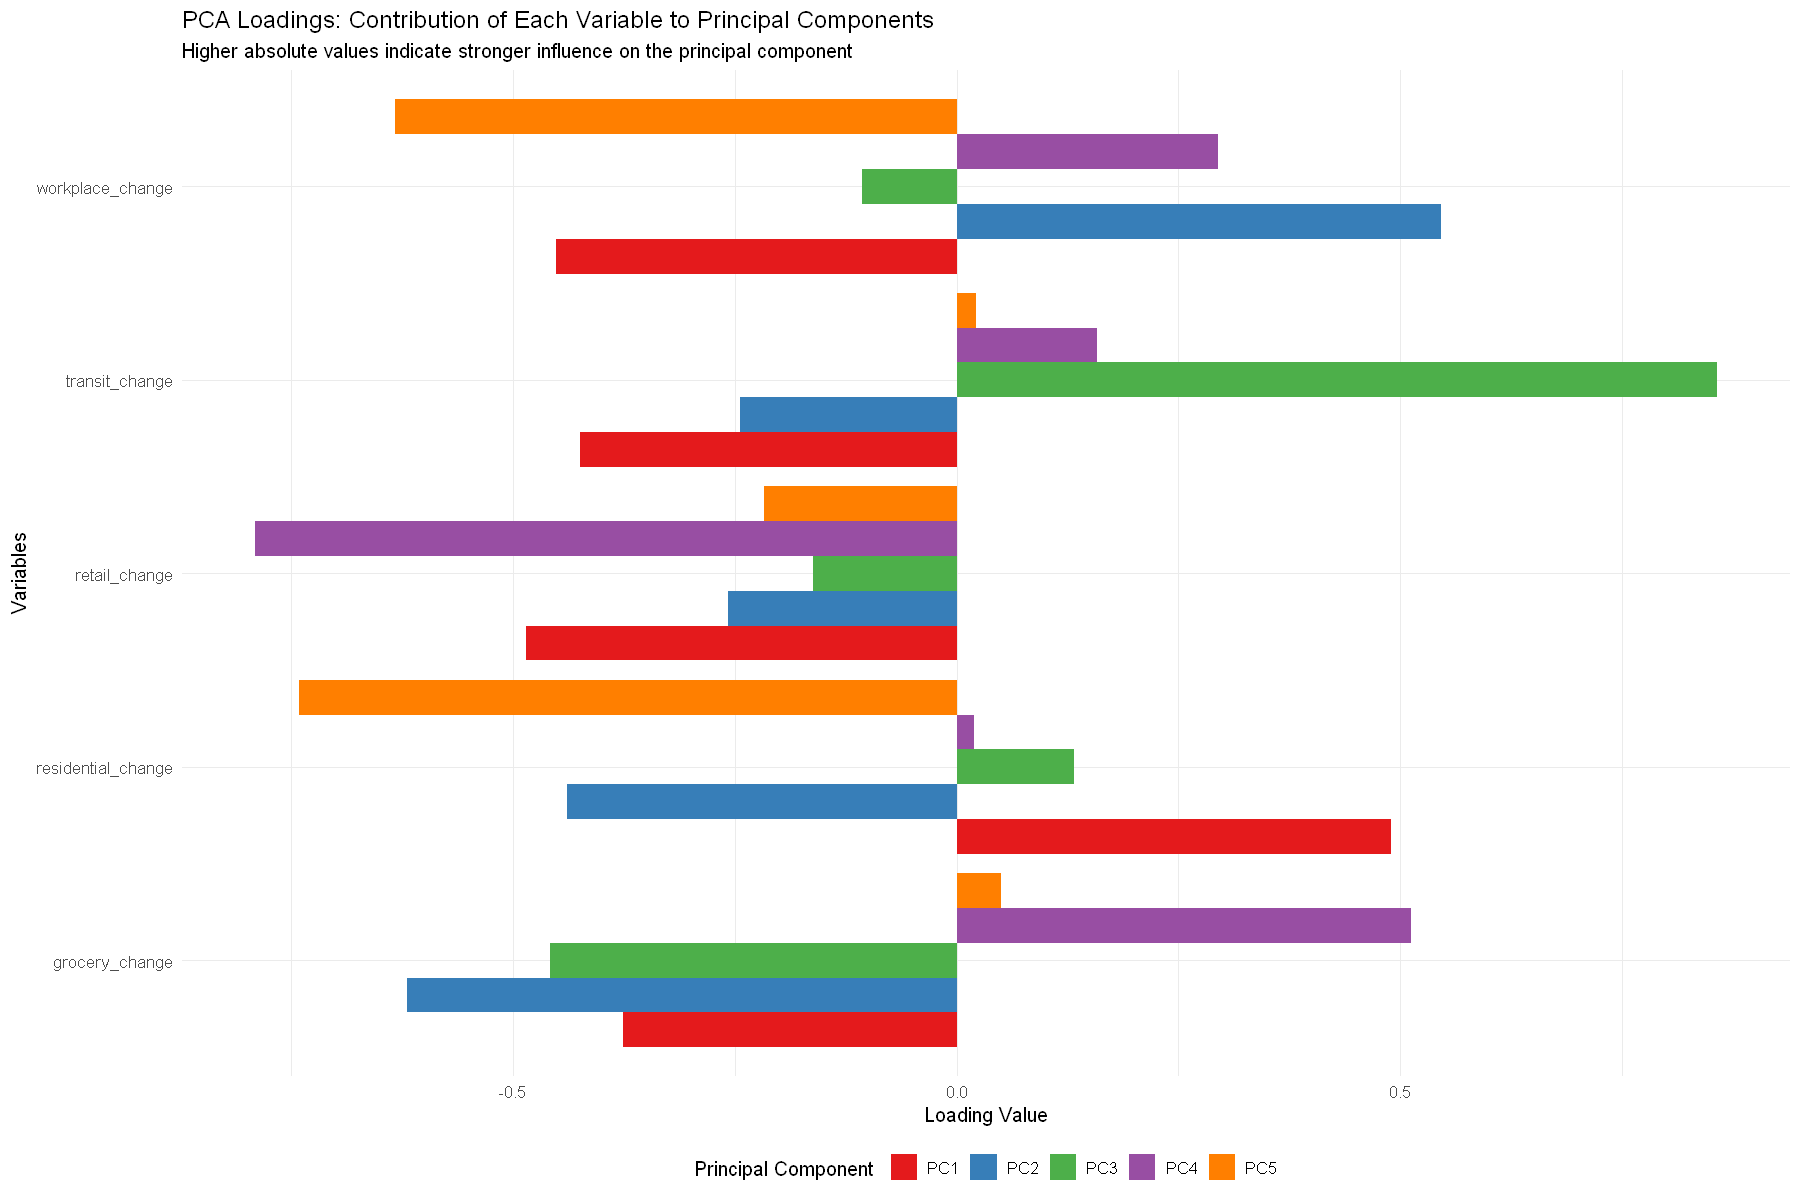

In [45]:
# Convert wide to long format
loading_df_long <- pca_loadings %>%
  pivot_longer(cols = -Variable, names_to = "PC", values_to = "loading_value")

# Create PCA Loadings Plot
ggplot(loading_df_long, aes(x = Variable, y = loading_value, fill = PC)) +
  geom_bar(stat = "identity", position = "dodge") +  
  coord_flip() + 
  scale_fill_brewer(palette = "Set1") + 
  theme_minimal() +
  theme(
    text = element_text(size = 12),  
    legend.position = "bottom",  
    axis.text.y = element_text(size = 10)  
  ) +
  labs(
    title = "PCA Loadings: Contribution of Each Variable to Principal Components",
    subtitle = "Higher absolute values indicate stronger influence on the principal component",
    x = "Variables", 
    y = "Loading Value",
    fill = "Principal Component"
  )

In [46]:
# Prints the PCA loadings
print(pca$rotation, 4)

                       PC1     PC2     PC3      PC4      PC5
retail_change      -0.4847 -0.2579 -0.1615 -0.79081 -0.21710
grocery_change     -0.3762 -0.6193 -0.4583  0.51226  0.05036
workplace_change   -0.4518  0.5457 -0.1069  0.29443 -0.63244
residential_change  0.4891 -0.4392  0.1328  0.01992 -0.74152
transit_change     -0.4246 -0.2436  0.8572  0.15851  0.02207


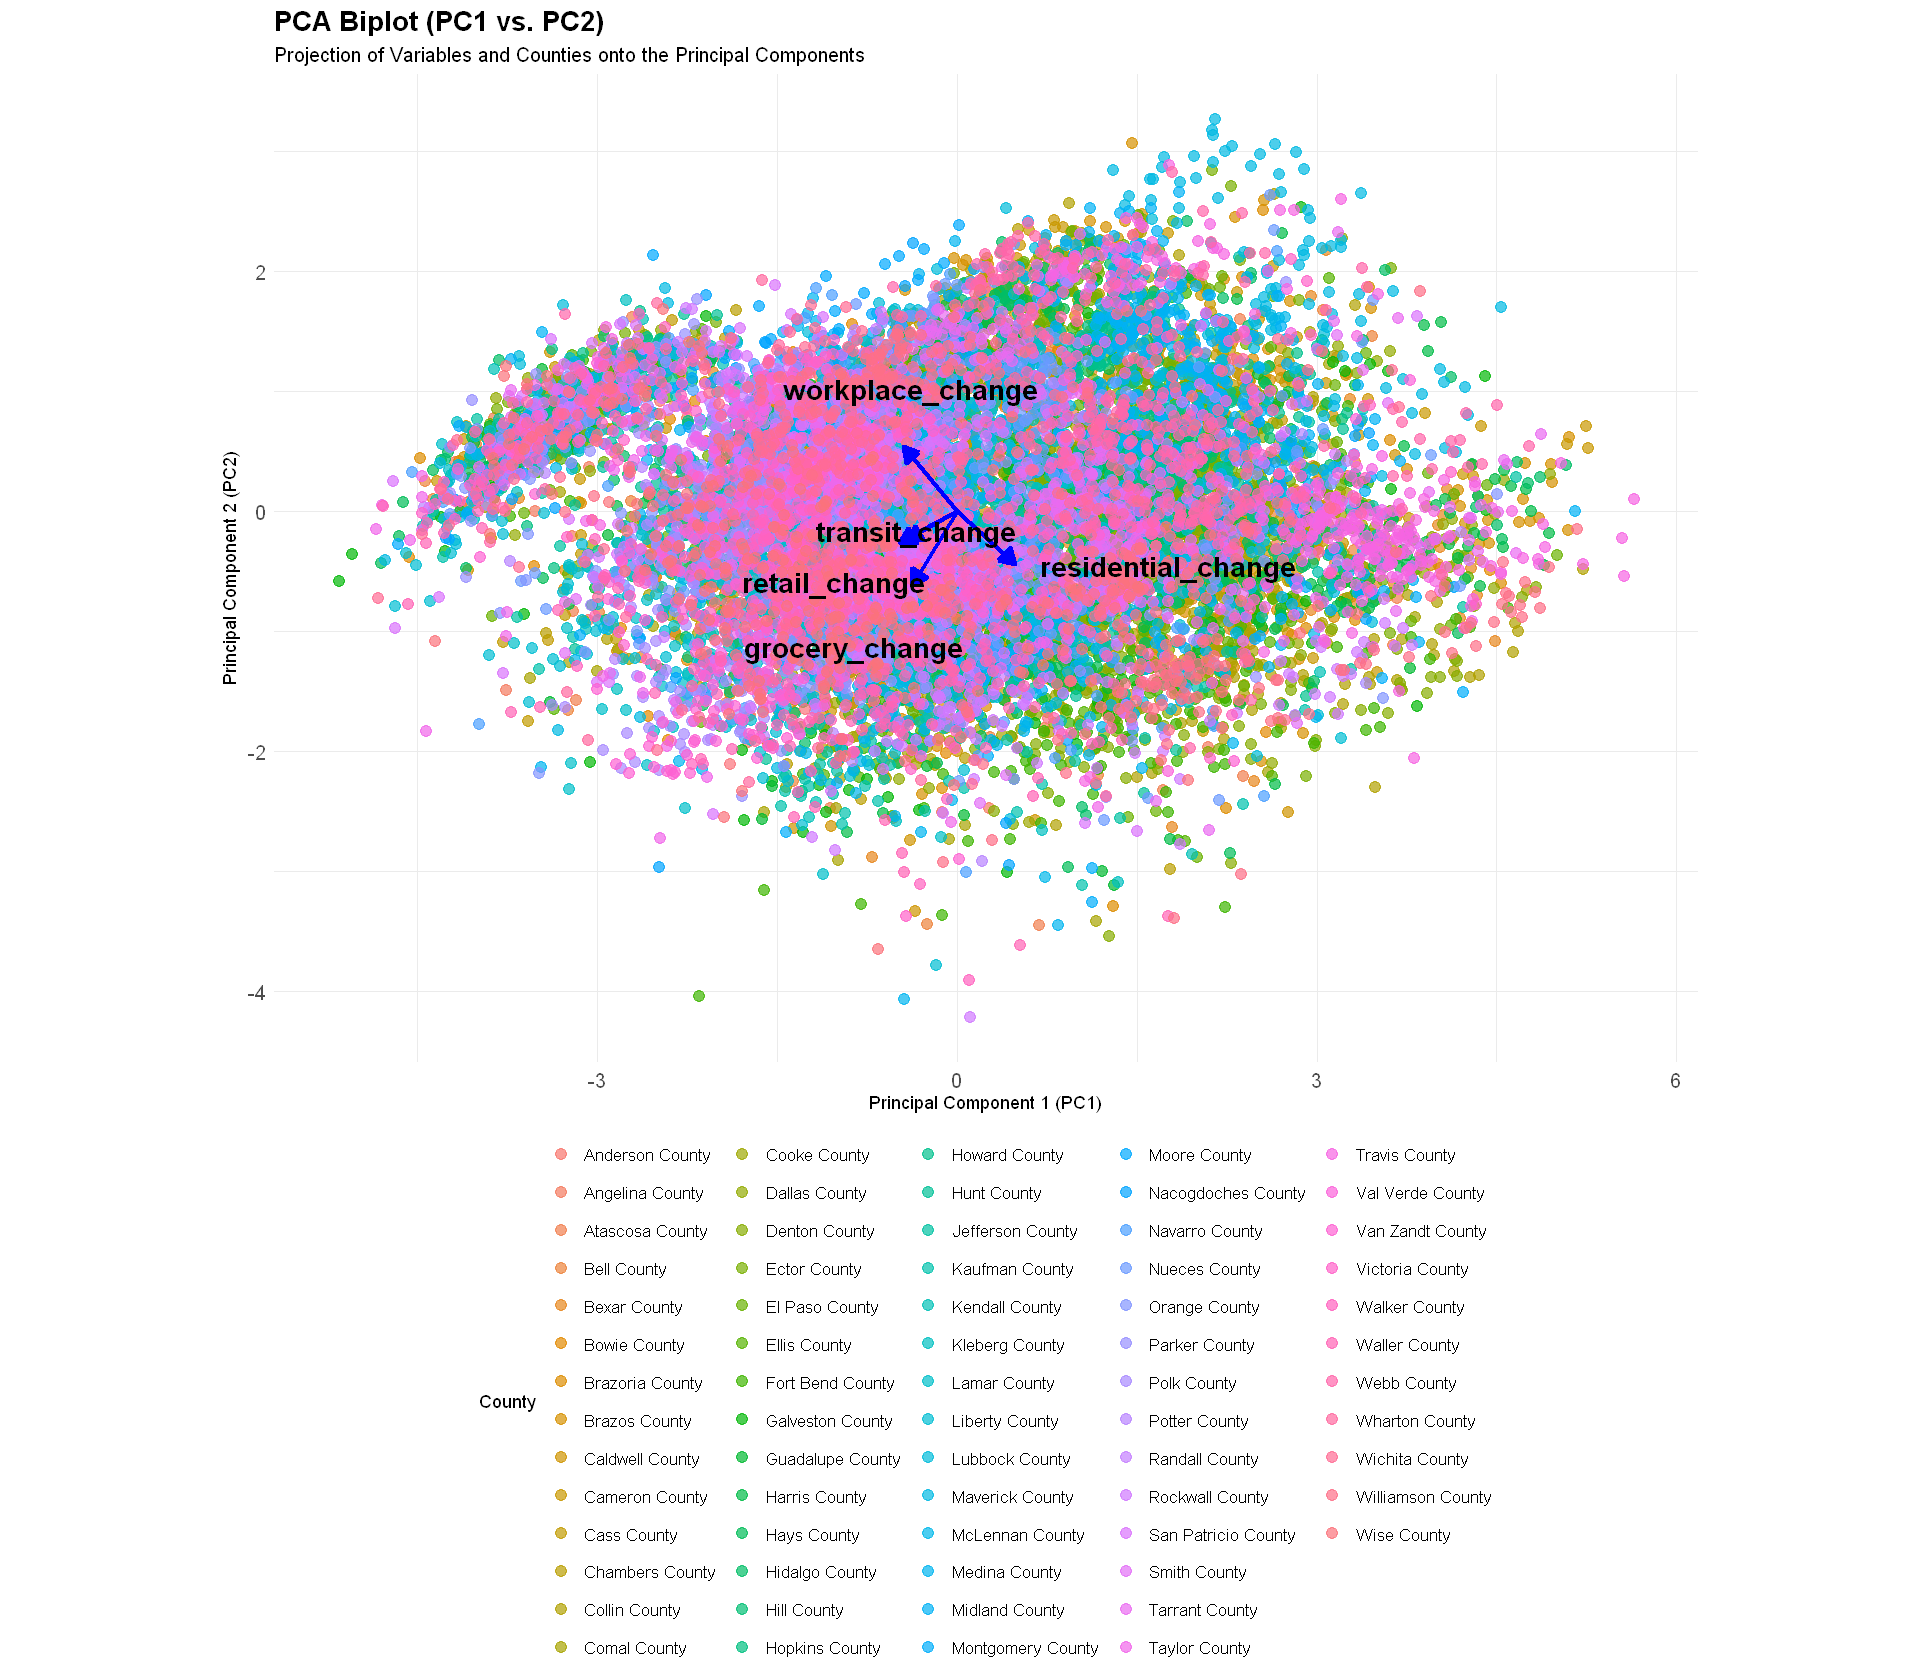

In [47]:
# Adjust plot size 
options(repr.plot.width = 16, repr.plot.height = 14)

# PCA Biplot PC1 vs PC2
ggplot(biplot_data, aes(x = PC1, y = PC2, color = County)) +
  geom_point(alpha = 0.7, size = 3) +  
  geom_segment(data = pca_loadings, 
               aes(x = 0, y = 0, xend = PC1, yend = PC2), 
               arrow = arrow(type = "closed", length = unit(0.15, "inches")), 
               color = "blue", linewidth = 1.2) +  
  geom_text_repel(data = pca_loadings, 
                  aes(x = PC1 * 1.5, y = PC2 * 1.5, label = Variable), 
                  color = "black", size = 6, fontface = "bold", 
                  box.padding = 0.5, 
                  point.padding = 0.5, 
                  max.overlaps = 10) +
  labs(
    title = "PCA Biplot (PC1 vs. PC2)",
    subtitle = "Projection of Variables and Counties onto the Principal Components",
    x = "Principal Component 1 (PC1)", 
    y = "Principal Component 2 (PC2)"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom", 
    legend.text = element_text(size = 10), 
    axis.text = element_text(size = 12), 
    plot.title = element_text(size = 16, face = "bold"),  
    plot.subtitle = element_text(size = 12)  
  ) +
  coord_fixed(ratio = 1)  

In [48]:
# Extract PCA Loadings for PC1 and PC2
pca_loadings_pc1_pc2 <- as.data.frame(round(pca$rotation[, 1:2], 4))  
pca_loadings_pc1_pc2$Variable <- rownames(pca_loadings_pc1_pc2)  
rownames(pca_loadings_pc1_pc2) <- NULL  

# Print PCA Loadings Summary for PC1 and PC2
print("PCA Loadings for PC1 and PC2:")
print(pca_loadings_pc1_pc2)

[1] "PCA Loadings for PC1 and PC2:"
      PC1     PC2           Variable
1 -0.4847 -0.2579      retail_change
2 -0.3762 -0.6193     grocery_change
3 -0.4518  0.5457   workplace_change
4  0.4891 -0.4392 residential_change
5 -0.4246 -0.2436     transit_change


In [49]:
# Extract variance explained by PC1 and PC2
explained_variance_pc1_pc2 <- round(sum(pca$sdev[1:2]^2) / sum(pca$sdev^2) * 100, 2)

# Print explained variance for PC1 and PC2
print(paste("PC1 and PC2 together explain", explained_variance_pc1_pc2, "% of the total variance."))

[1] "PC1 and PC2 together explain 83.05 % of the total variance."


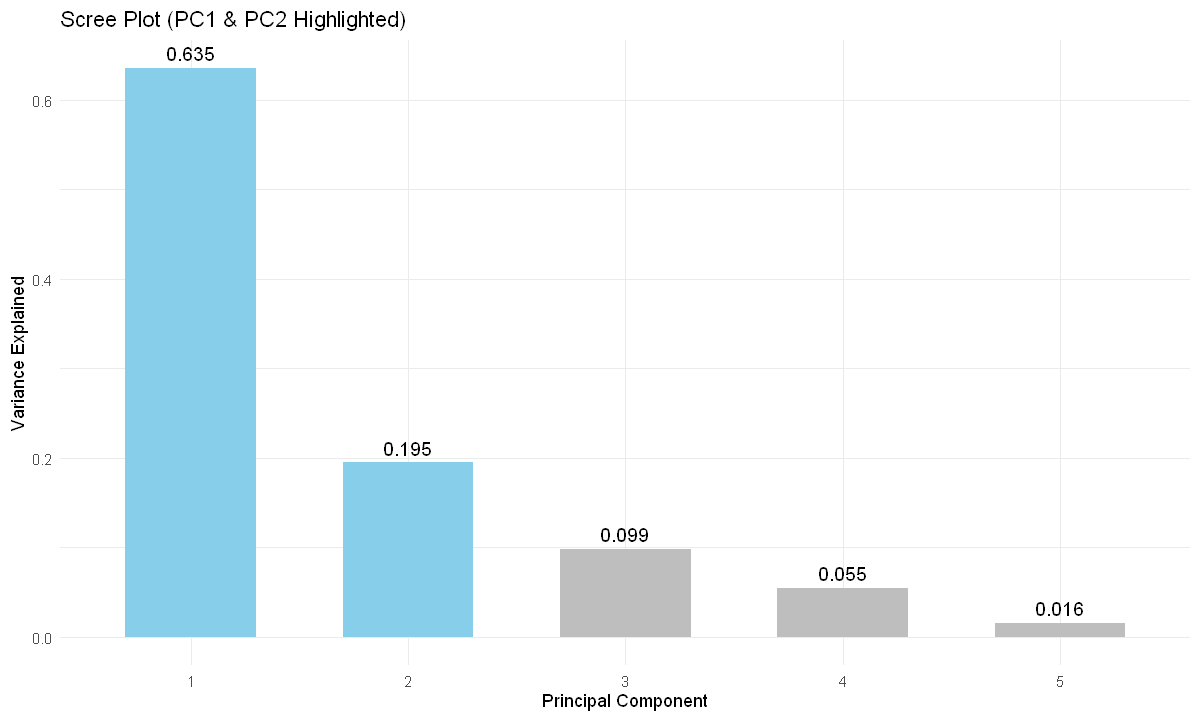

In [50]:
# Reduce plot size
options(repr.plot.width = 10, repr.plot.height = 6)

# Scree Plot Data
scree_data <- data.frame(PC = 1:length(pca$sdev), Variance = pca$sdev^2 / sum(pca$sdev^2))

# Ensure PC is a factor 
scree_data$PC <- factor(scree_data$PC)

# Highlight PC1 & PC2
ggplot(scree_data, aes(x = PC, y = Variance, fill = (PC %in% c("1", "2")))) +
  geom_bar(stat = "identity", width = 0.6) +
  geom_text(aes(label = round(Variance, 3)), vjust = -0.5, size = 4) +
  scale_fill_manual(values = c("gray", "skyblue"), guide = "none") + 
  labs(title = "Scree Plot (PC1 & PC2 Highlighted)", 
       x = "Principal Component", y = "Variance Explained") +
  theme_minimal()

# 2.2 Covid Cases Census Data

In [51]:
# Randomly display 10 rows
covid_cases_census %>%
  sample_n(10)

county_fips_code county_name        state state_fips_code date      
1  28127            Simpson County     MS    28              2021-01-19
2  17161            Rock Island County IL    17              2021-01-19
3  54109            Wyoming County     WV    54              2021-01-19
4  29059            Dallas County      MO    29              2021-01-19
5  20169            Saline County      KS    20              2021-01-19
6  31039            Cuming County      NE    31              2021-01-19
7  54093            Tucker County      WV    54              2021-01-19
8  19159            Ringgold County    IA    19              2021-01-19
9  29071            Franklin County    MO    29              2021-01-19
10 13073            Columbia County    GA    13              2021-01-19
   confirmed_cases deaths geo_id nonfamily_households family_households ⋯
1   2364            67    28127   2675                 6647             ⋯
2  11919           261    17161  22380                37684             ⋯
3   1426            25    54109   2641                 6528             ⋯
4    757            19    29059   1642                 4514             ⋯
5   5233            83    20169   8331                13963             ⋯
6    909             9    31039   1305                 2485             ⋯
7    417             7    54093   1054                 1897             ⋯
8    433             9    19159    675                 1388             ⋯
9   7664           122    29071  11953                28659             ⋯
10  8822           104    13073  10367                35456             ⋯
   speak_only_english_at_home speak_spanish_at_home
1  NA                         NA                   
2  NA                         NA                   
3  NA                         NA                   
4  NA                         NA                   
5  NA                         NA                   
6  NA                         NA                   
7  NA                         NA                   
8  NA                         NA                   
9  NA                         NA                   
10 NA                         NA                   
   speak_spanish_at_home_low_english pop_15_and_over pop_never_married
1  NA                                NA              NA               
2  NA                                NA              NA               
3  NA                                NA              NA               
4  NA                                NA              NA               
5  NA                                NA              NA               
6  NA                                NA              NA               
7  NA                                NA              NA               
8  NA                                NA              NA               
9  NA                                NA              NA               
10 NA                                NA              NA               
   pop_now_married pop_separated pop_widowed pop_divorced do_date 
1  NA              NA            NA          NA           20132017
2  NA              NA            NA          NA           20132017
3  NA              NA            NA          NA           20132017
4  NA              NA            NA          NA           20132017
5  NA              NA            NA          NA           20132017
6  NA              NA            NA          NA           20132017
7  NA              NA            NA          NA           20132017
8  NA              NA            NA          NA           20132017
9  NA              NA            NA          NA           20132017
10 NA              NA            NA          NA           20132017

In [52]:
# View of data
glimpse(covid_cases_census)

Rows: 3,142
Columns: 259
$ county_fips_code                                               <chr> "50009"…
$ county_name                                                    <chr> "Essex …
$ state                                                          <chr> "VT", "…
$ state_fips_code                                                <chr> "50", "…
$ date                                                           <date> 2021-0…
$ confirmed_cases                                                <dbl> 111, 36…
$ deaths                                                         <dbl> 0, 78, …
$ geo_id                                                         <chr> "50009"…
$ nonfamily_households                                           <dbl> 994, 27…
$ family_households                                              <dbl> 1726, 3…
$ median_year_structure_built                                    <dbl> 1973, 1…
$ rent_burden_not_computed                                       <dbl> 64, 115…
$ rent_over_50_

In [53]:
# comnbine income to create a less than $20k
covid_cases_census <- covid_cases_census %>%
  mutate(income_less_20000 = income_less_10000 + income_10000_14999 + income_15000_19999)

In [54]:
# Rename columns and filter for key variables
covid_census_filtered <- covid_cases_census %>%
    select(
        county = county_name,
        state,
        cases = confirmed_cases,
        deaths,
        population = total_pop,
        median_income,
        public_trans_commuters = commuters_by_public_transportation,
        food_stamps = households_public_asst_or_food_stamps,
        work_from_home = worked_at_home,
        poverty,
        income_below_20k = income_less_20000
    )

In [55]:
covid_census_filtered %>%
    head()

county            state cases deaths population median_income
1 Essex County      VT      111   0      6203     38767        
2 Chittenden County VT     3636  78    160985     66906        
3 Kent County       DE    11548 187    173145     57647        
4 Washington County RI     5521 122    126190     77862        
5 Belknap County    NH     2496  79     60383     65834        
6 Newport County    RI     3578   6     83204     75463        
  public_trans_commuters food_stamps work_from_home poverty income_below_20k
1    4                     575        167             960    673            
2 2336                    6748       4783           17057   8660            
3  903                   10685       3270           21743   9333            
4  702                    4350       3110           11569   6036            
5   11                    2512       1487            5421   3259            
6  825                    3581       2711            7178   4801

In [56]:
# Verify column name change
colnames(covid_census_filtered)

[1] "county"                 "state"                  "cases"                 
 [4] "deaths"                 "population"             "median_income"         
 [7] "public_trans_commuters" "food_stamps"            "work_from_home"        
[10] "poverty"                "income_below_20k"

In [57]:
# View filtered variables
glimpse(covid_census_filtered)

Rows: 3,142
Columns: 11
$ county                 <chr> "Essex County", "Chittenden County", "Kent Coun…
$ state                  <chr> "VT", "VT", "DE", "RI", "NH", "RI", "VT", "CT",…
$ cases                  <dbl> 111, 3636, 11548, 5521, 2496, 3578, 312, 6255, …
$ deaths                 <dbl> 0, 78, 187, 122, 79, 6, 1, 125, 5, 4, 2, 1104, …
$ population             <dbl> 6203, 160985, 173145, 126190, 60383, 83204, 251…
$ median_income          <dbl> 38767, 66906, 57647, 77862, 65834, 75463, 54899…
$ public_trans_commuters <dbl> 4, 2336, 903, 702, 11, 825, 66, 1572, 139, 17, …
$ food_stamps            <dbl> 575, 6748, 10685, 4350, 2512, 3581, 1408, 4556,…
$ work_from_home         <dbl> 167, 4783, 3270, 3110, 1487, 2711, 906, 3821, 1…
$ poverty                <dbl> 960, 17057, 21743, 11569, 5421, 7178, 3439, 879…
$ income_below_20k       <dbl> 673, 8660, 9333, 6036, 3259, 4801, 1836, 5178, …


In [58]:
# Filter dataset for Texas counties
covid_census_tx <- covid_census_filtered %>%
  filter(state == "TX")

# Convert categorical variables to factors
covid_census_tx <- covid_census_tx %>%
  mutate(
    county = as.factor(county),
    state = as.factor(state)
  )

# Verify changes
glimpse(covid_census_tx)

Rows: 254
Columns: 11
$ county                 <fct> Hansford County, Stonewall County, Cochran Coun…
$ state                  <fct> TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX,…
$ cases                  <dbl> 673, 134, 216, 472, 467, 118, 11, 114, 1475, 17…
$ deaths                 <dbl> 17, 4, 12, 13, 12, 11, 0, 3, 46, 7, 6, 6, 5, 11…
$ population             <dbl> 5532, 1084, 2932, 3836, 8145, 3067, 289, 1591, …
$ median_income          <dbl> 40678, 46786, 37500, 52310, 42367, 54961, 56964…
$ public_trans_commuters <dbl> 9, 0, 7, 0, 2, 7, 0, 0, 12, 2, 0, 0, 0, 19, 0, …
$ food_stamps            <dbl> 126, 41, 162, 143, 600, 23, 3, 88, 881, 162, 10…
$ work_from_home         <dbl> 18, 7, 23, 60, 61, 38, 7, 78, 120, 10, 79, 66, …
$ poverty                <dbl> 1017, 143, 717, 787, 1296, 448, 10, 220, 1590, …
$ income_below_20k       <dbl> 376, 135, 320, 196, 781, 161, 7, 147, 602, 201,…


In [59]:
# Check for missing values
missing_values <- covid_census_tx %>%
  summarize(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(cols = everything(), names_to = "column", values_to = "missing_count") %>%
  mutate(missing_pct = (missing_count / nrow(covid_census_tx)) * 100)

# View missing values summary
print(missing_values)

# A tibble: 11 × 3
   column                 missing_count missing_pct
   <chr>                          <int>       <dbl>
 1 county                             0           0
 2 state                              0           0
 3 cases                              0           0
 4 deaths                             0           0
 5 population                         0           0
 6 median_income                      0           0
 7 public_trans_commuters             0           0
 8 food_stamps                        0           0
 9 work_from_home                     0           0
10 poverty                            0           0
11 income_below_20k                   0           0


In [60]:
# Remove missing values 
covid_census_tx <- covid_census_tx %>%
  drop_na(county, cases, deaths, population, median_income, public_trans_commuters, 
          food_stamps, work_from_home, poverty, income_below_20k)

# Check how much data is left
cat("Remaining rows after missing value removal:", nrow(covid_census_tx), "\n")

# Check summary statistics of the cleaned dataset
summary(covid_census_tx)

Remaining rows after missing value removal: 254 


              county    state        cases            deaths       
 Anderson County :  1   TX:254   Min.   :     1   Min.   :   0.00  
 Andrews County  :  1            1st Qu.:   487   1st Qu.:  13.00  
 Angelina County :  1            Median :  1310   Median :  30.00  
 Aransas County  :  1            Mean   :  8419   Mean   : 127.48  
 Archer County   :  1            3rd Qu.:  3502   3rd Qu.:  78.75  
 Armstrong County:  1            Max.   :286356   Max.   :3825.00  
 (Other)         :248                                              
   population      median_income   public_trans_commuters  food_stamps      
 Min.   :     74   Min.   :24794   Min.   :    0.00       Min.   :     0.0  
 1st Qu.:   7072   1st Qu.:42327   1st Qu.:    0.00       1st Qu.:   284.8  
 Median :  18612   Median :48311   Median :   10.00       Median :   884.0  
 Mean   : 107951   Mean   :49894   Mean   :  737.44       Mean   :  4863.4  
 3rd Qu.:  49295   3rd Qu.:55741   3rd Qu.:   56.75       3rd Qu.:  231

In [61]:
# Identify duplicate rows
duplicates <- covid_census_tx %>%
    filter(duplicated(.))

# Count duplicate rows
num_duplicates <- nrow(duplicates)

# View duplicates
cat("Number of duplicate rows:", num_duplicates, "\n")

Number of duplicate rows: 0 


In [62]:
# Remove duplicates only if they exist
if (num_duplicates > 0) {
  covid_census_tx <- covid_census_tx %>%
    distinct()
  cat("Duplicates removed. New dataset size:", nrow(covid_census_tx), "rows\n")
} else {
  cat("No duplicate rows found.\n")
}

No duplicate rows found.


In [63]:
count_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  sum(x < (Q1 - 1.5 * IQR_value) | x > (Q3 + 1.5 * IQR_value), na.rm = TRUE)
}

# Create a summary table of outliers for key socioeconomic and COVID-19 variables
outlier_summary <- covid_census_tx %>%
  summarize(across(
    c(cases, deaths, population, median_income, public_trans_commuters, 
      food_stamps, work_from_home, poverty, income_below_20k),
    count_outliers,
    .names = "{.col}_outliers"
  )) %>%
  pivot_longer(everything(), names_to = "Column", values_to = "Outlier_Count")

# Print the outlier summary table
print(outlier_summary, width=Inf)

# A tibble: 9 × 2
  Column                          Outlier_Count
  <chr>                                   <int>
1 cases_outliers                             40
2 deaths_outliers                            37
3 population_outliers                        39
4 median_income_outliers                     10
5 public_trans_commuters_outliers            39
6 food_stamps_outliers                       33
7 work_from_home_outliers                    36
8 poverty_outliers                           31
9 income_below_20k_outliers                  29


In [64]:
# Custom function to check if value is NOT outlier using IQR
is_not_outlier <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  x >= (Q1 - 1.5 * IQR_value) & x <= (Q3 + 1.5 * IQR_value)
}

# Remove rows containing outliers 
covid_census_tx_cleaned <- covid_census_tx %>%
  filter(
    is_not_outlier(cases) &
    is_not_outlier(deaths) &
    is_not_outlier(population) &
    is_not_outlier(median_income) &
    is_not_outlier(public_trans_commuters) &
    is_not_outlier(food_stamps) &
    is_not_outlier(work_from_home) &
    is_not_outlier(poverty) &
    is_not_outlier(income_below_20k)
  )

# How many rows were removed
rows_removed <- nrow(covid_census_tx) - nrow(covid_census_tx_cleaned)
cat("Number of rows removed due to outliers:", rows_removed, "\n")

Number of rows removed due to outliers: 51 


In [65]:
# Stats after cleaning data
summary(covid_census_tx_cleaned)

              county    state        cases            deaths      
 Anderson County :  1   TX:203   Min.   :  11.0   Min.   :  0.00  
 Andrews County  :  1            1st Qu.: 411.5   1st Qu.: 11.00  
 Aransas County  :  1            Median : 967.0   Median : 22.00  
 Archer County   :  1            Mean   :1469.5   Mean   : 33.29  
 Armstrong County:  1            3rd Qu.:1975.5   3rd Qu.: 48.00  
 Atascosa County :  1            Max.   :7008.0   Max.   :158.00  
 (Other)         :197                                             
   population    median_income   public_trans_commuters  food_stamps    
 Min.   :  289   Min.   :24794   Min.   :  0.00         Min.   :   0.0  
 1st Qu.: 5573   1st Qu.:41591   1st Qu.:  0.00         1st Qu.: 231.5  
 Median :13095   Median :46685   Median :  2.00         Median : 647.0  
 Mean   :20062   Mean   :47509   Mean   : 16.07         Mean   : 973.5  
 3rd Qu.:26477   3rd Qu.:52490   3rd Qu.: 22.50         3rd Qu.:1317.5  
 Max.   :93635   Max.   :7

In [66]:
# Verify rows, columns, data types
glimpse(covid_census_tx_cleaned)

Rows: 203
Columns: 11
$ county                 <fct> Hansford County, Stonewall County, Cochran Coun…
$ state                  <fct> TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX,…
$ cases                  <dbl> 673, 134, 216, 472, 467, 118, 11, 114, 1475, 17…
$ deaths                 <dbl> 17, 4, 12, 13, 12, 11, 0, 3, 46, 7, 6, 6, 5, 11…
$ population             <dbl> 5532, 1084, 2932, 3836, 8145, 3067, 289, 1591, …
$ median_income          <dbl> 40678, 46786, 37500, 52310, 42367, 54961, 56964…
$ public_trans_commuters <dbl> 9, 0, 7, 0, 2, 7, 0, 0, 12, 2, 0, 0, 0, 19, 34,…
$ food_stamps            <dbl> 126, 41, 162, 143, 600, 23, 3, 88, 881, 162, 10…
$ work_from_home         <dbl> 18, 7, 23, 60, 61, 38, 7, 78, 120, 10, 79, 66, …
$ poverty                <dbl> 1017, 143, 717, 787, 1296, 448, 10, 220, 1590, …
$ income_below_20k       <dbl> 376, 135, 320, 196, 781, 161, 7, 147, 602, 201,…


In [67]:
# Function to compute key statistics
compute_census_stats <- function(data, variables) {
  data %>%
    summarize(across(
      all_of(variables),
      list(
        Range = ~ max(.x, na.rm = TRUE) - min(.x, na.rm = TRUE),
        Mode = ~ mfv(.x)[1],
        Mean = ~ mean(.x, na.rm = TRUE),
        Median = ~ median(.x, na.rm = TRUE),
        Variance = ~ var(.x, na.rm = TRUE),
        SD = ~ sd(.x, na.rm = TRUE)
      ),
      .names = "{.col}_{.fn}"
    ))
}

# Define key census variables for analysis
census_variables <- c("cases", "deaths", "population", "median_income", 
                      "public_trans_commuters", "food_stamps", 
                      "work_from_home", "poverty", 
                      "income_below_20k")

# Compute statistics
census_stats_table <- compute_census_stats(covid_census_tx_cleaned, census_variables)

census_stats_long <- census_stats_table %>%
  pivot_longer(
    cols = everything(),
    names_to = "Combined",
    values_to = "Value"
  ) %>%
  mutate(
    Variable = str_extract(Combined, "^[^_]+"),  # Extract the first part (Variable)
    Statistic = str_extract(Combined, "[^_]+$")  # Extract the last part (Statistic)
  ) %>%
  select(Variable, Statistic, Value) %>%  
  pivot_wider(
    names_from = "Statistic", 
    values_from = "Value",
    values_fn = list  
  ) %>%
  mutate(across(where(is.list), ~ map_dbl(.x, ~ .x[1])))  

# Print the formatted table
kable(census_stats_long, digits = 0)



|Variable   | Range|  Mode|  Mean| Median|  Variance|    SD|
|:----------|-----:|-----:|-----:|------:|---------:|-----:|
|cases      |  6997|   207|  1470|    967|   2117934|  1455|
|deaths     |   158|    20|    33|     22|       927|    30|
|population | 93346|   289| 20062|  13095| 402106159| 20053|
|median     | 49574| 42500| 47509|  46685|  92474203|  9616|
|public     |   125|     0|    16|      2|       636|    25|
|food       |  5324|    97|   974|    647|   1084979|  1042|
|work       |  1552|     0|   293|    181|    109061|   330|
|poverty    | 16420|   140|  3162|   2078|  10510456|  3242|
|income     |  7184|   169|  1379|   1001|   1829204|  1352|

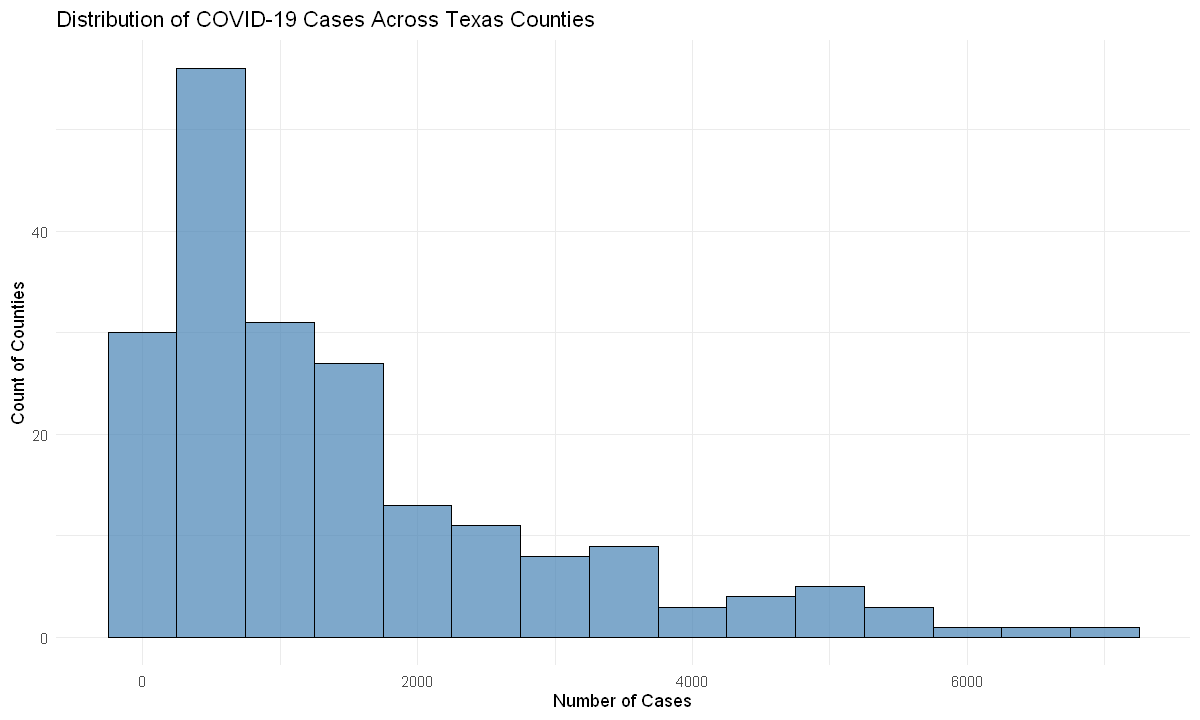

In [68]:
# 1. Distribution of COVID-19 Cases Histogram
ggplot(covid_census_tx_cleaned, aes(x = cases)) +
  geom_histogram(binwidth = 500, fill = "steelblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of COVID-19 Cases Across Texas Counties",
       x = "Number of Cases", y = "Count of Counties") +
  theme_minimal()

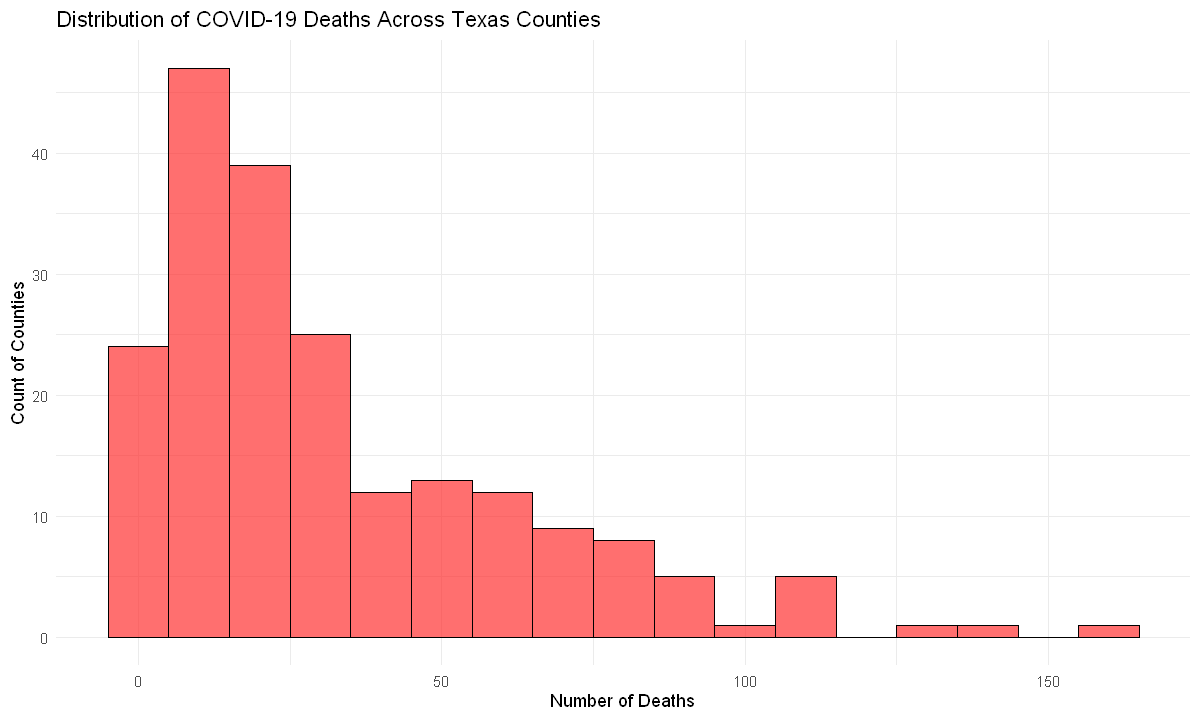

In [69]:
# 2. COVID-19 Cases vs. Population Histogram
ggplot(covid_census_tx_cleaned, aes(x = deaths)) +
  geom_histogram(binwidth = 10, fill = "firebrick1", color = "black", alpha = 0.7) +
  labs(title = "Distribution of COVID-19 Deaths Across Texas Counties",
       x = "Number of Deaths", y = "Count of Counties") +
  theme_minimal()

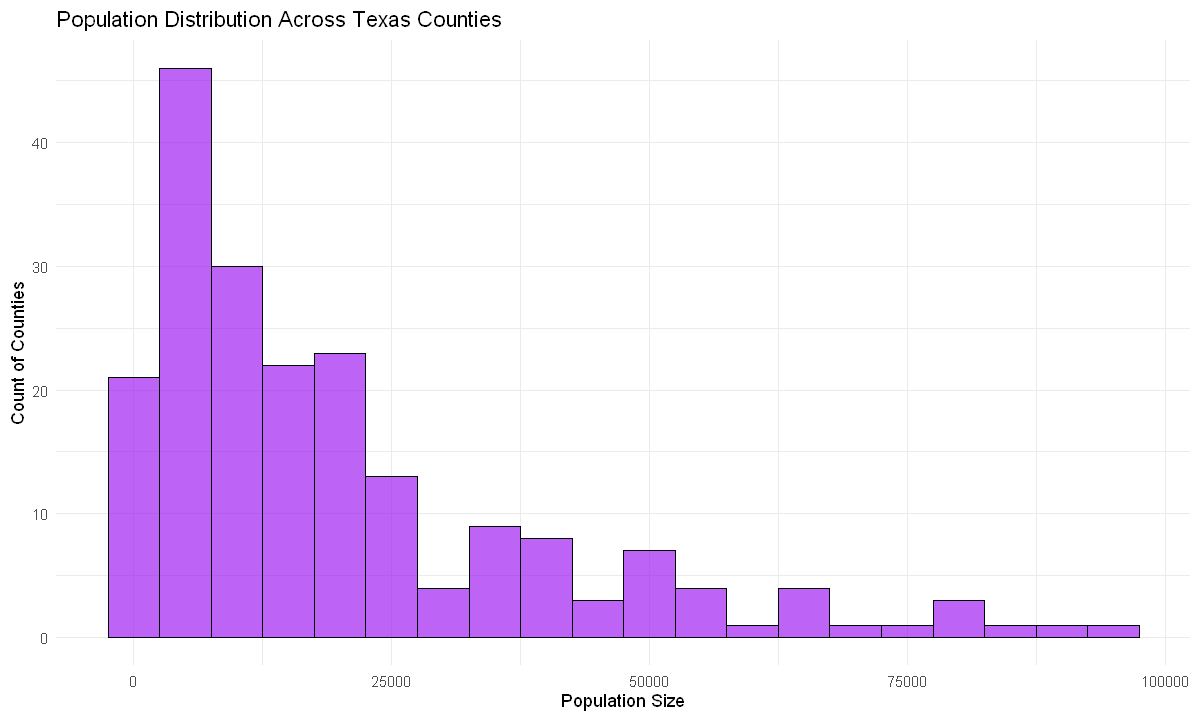

In [70]:
# 3. Histogram for Population Size
ggplot(covid_census_tx_cleaned, aes(x = population)) +
  geom_histogram(binwidth = 5000, fill = "purple", color = "black", alpha = 0.7) +
  labs(title = "Population Distribution Across Texas Counties",
       x = "Population Size", y = "Count of Counties") +
  theme_minimal()

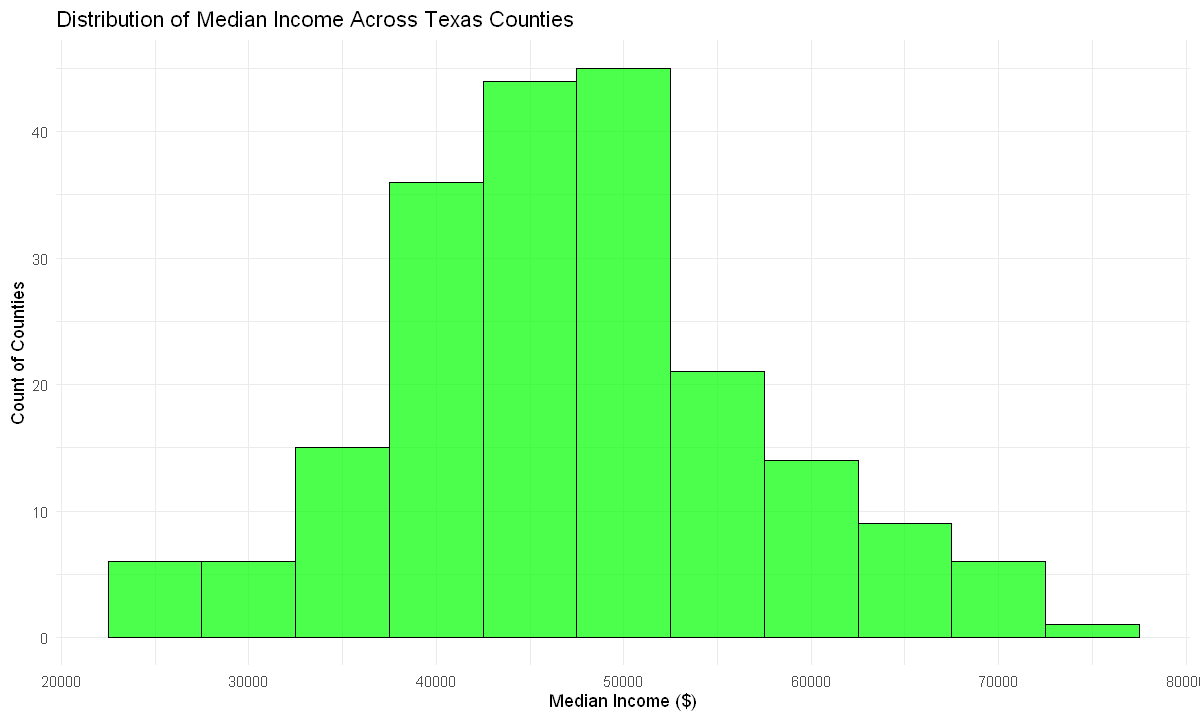

In [71]:
# 4. Median Income Distribution Histogram
ggplot(covid_census_tx_cleaned, aes(x = median_income)) +
  geom_histogram(binwidth = 5000, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Median Income Across Texas Counties",
       x = "Median Income ($)", y = "Count of Counties") +
  theme_minimal()

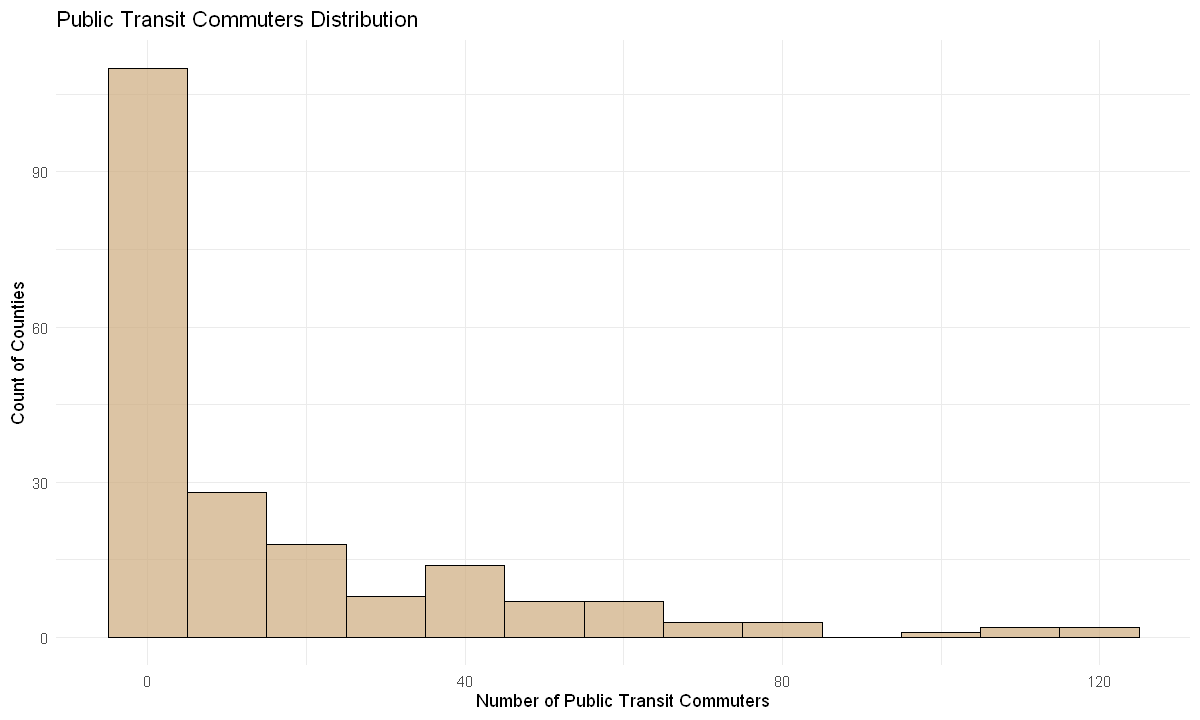

In [72]:
# 5. Public Transportation Commuters
ggplot(covid_census_tx_cleaned, aes(x = public_trans_commuters)) +
  geom_histogram(binwidth = 10, fill = "burlywood3", color = "black", alpha = 0.7) +
  labs(title = "Public Transit Commuters Distribution",
       x = "Number of Public Transit Commuters", y = "Count of Counties") +
  theme_minimal()

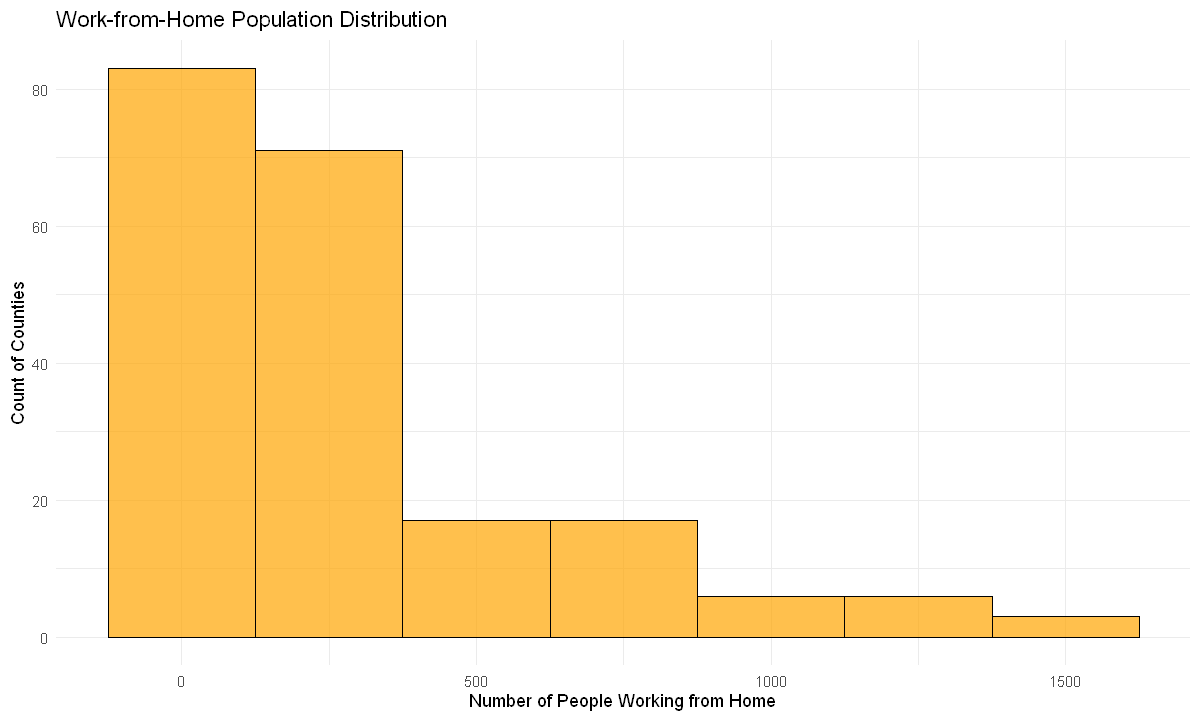

In [73]:
# 6. Work from home
ggplot(covid_census_tx_cleaned, aes(x = work_from_home)) +
  geom_histogram(binwidth = 250, fill = "orange", color = "black", alpha = 0.7) +
  labs(title = "Work-from-Home Population Distribution",
       x = "Number of People Working from Home", y = "Count of Counties") +
  theme_minimal()

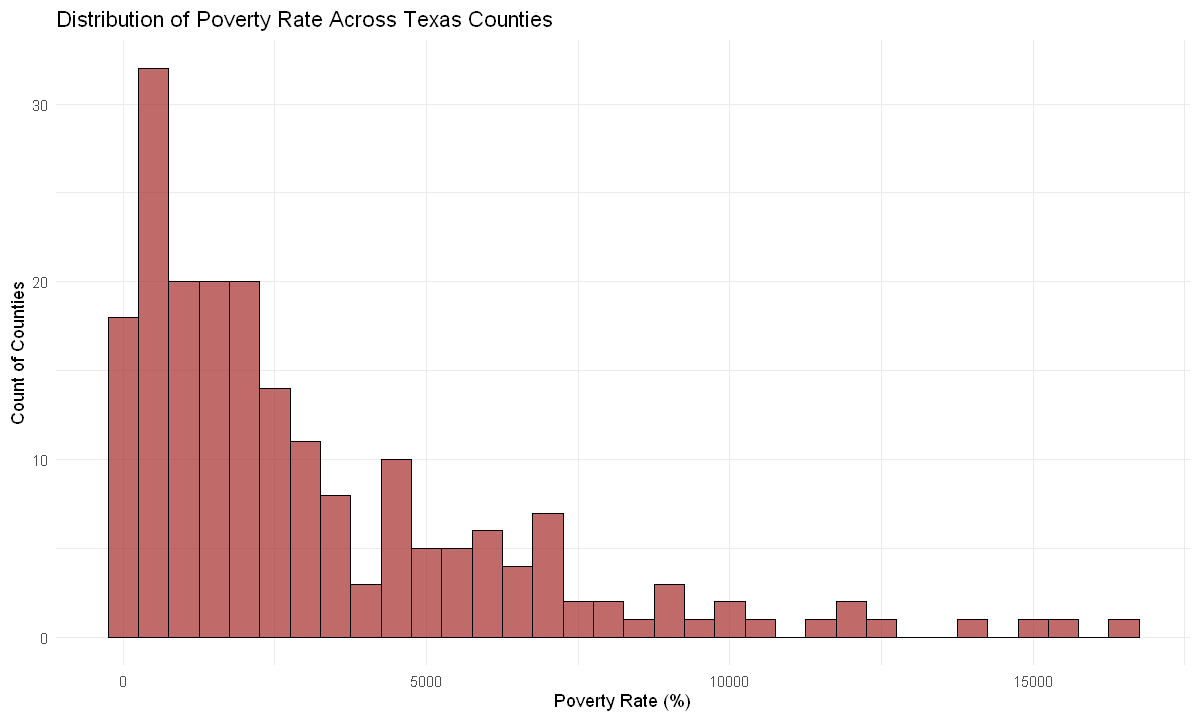

In [74]:
# 6. Poverty Rate
ggplot(covid_census_tx_cleaned, aes(x = poverty)) +
  geom_histogram(binwidth = 500, fill = "brown", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Poverty Rate Across Texas Counties",
       x = "Poverty Rate (%)", y = "Count of Counties") +
  theme_minimal()

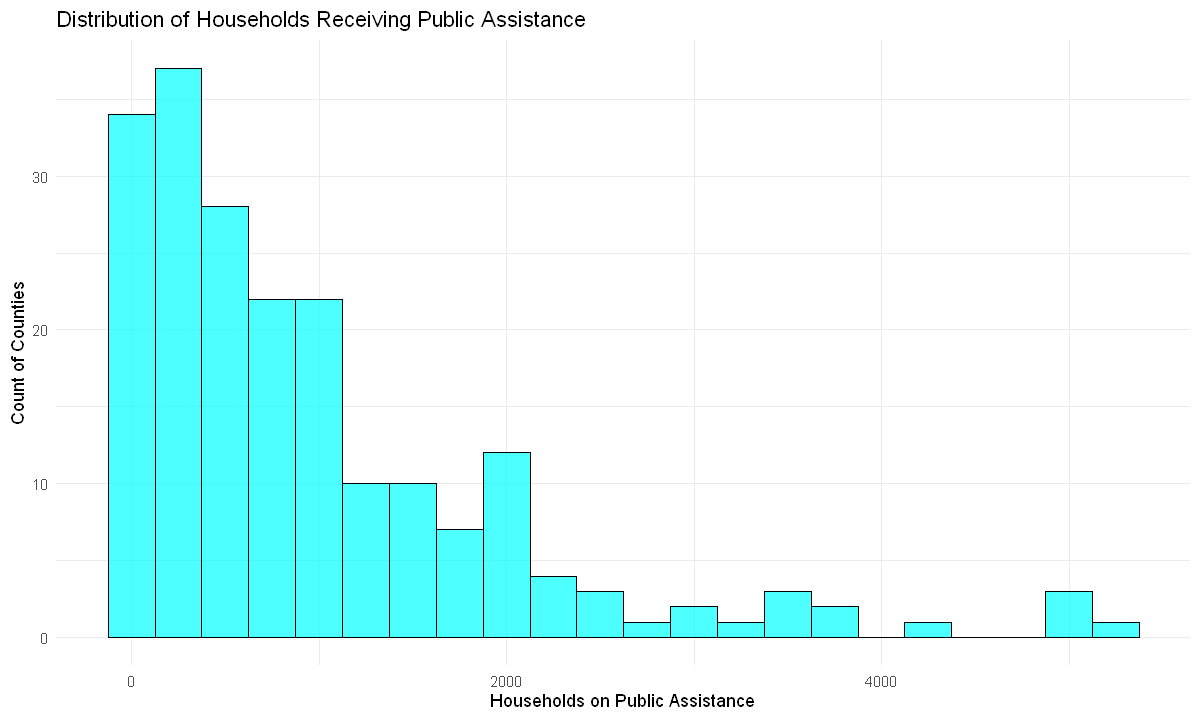

In [75]:
# 7. Public assistance or food stamps
ggplot(covid_census_tx_cleaned, aes(x = food_stamps)) +
  geom_histogram(binwidth = 250, fill = "cyan", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Households Receiving Public Assistance",
       x = "Households on Public Assistance", y = "Count of Counties") +
  theme_minimal()

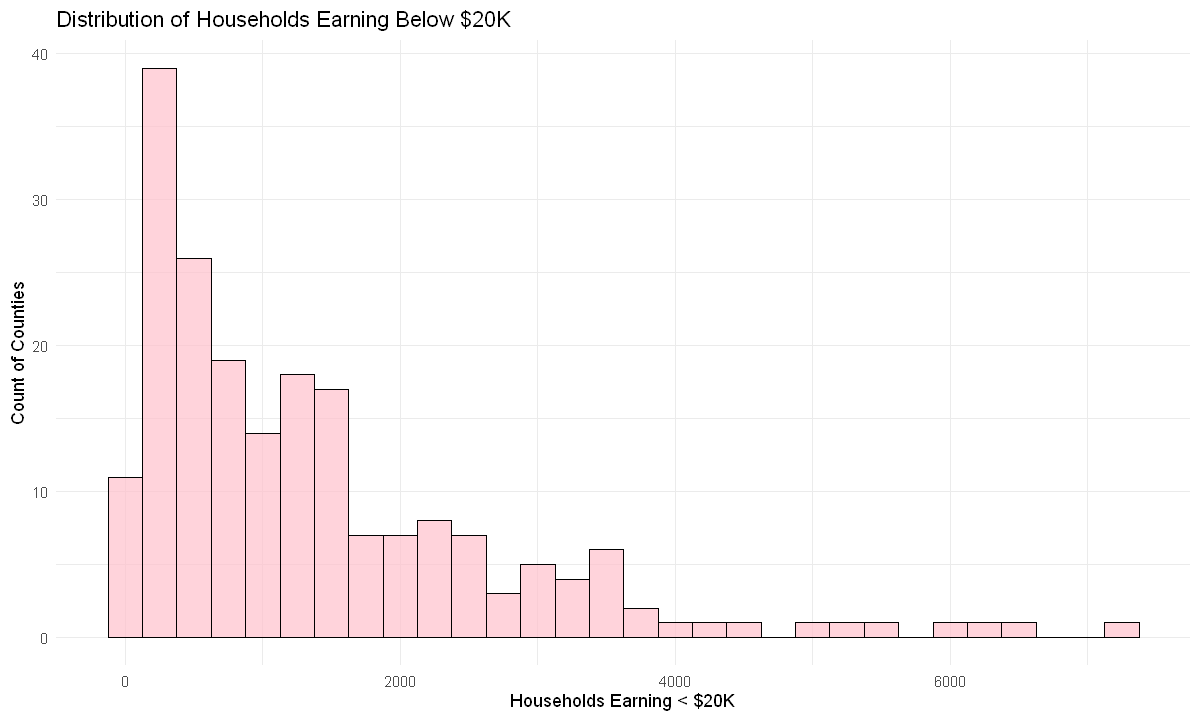

In [76]:
# 8. Household earnings below $10K
ggplot(covid_census_tx_cleaned, aes(x = income_below_20k)) +
  geom_histogram(binwidth = 250, fill = "pink", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Households Earning Below $20K",
       x = "Households Earning < $20K", y = "Count of Counties") +
  theme_minimal()

In [77]:
# Compute county-level averages for COVID-19 cases and deaths
county_covid_summary <- covid_census_tx_cleaned %>%
  group_by(county) %>%
  summarize(
    avg_cases = mean(cases, na.rm = TRUE),
    avg_deaths = mean(deaths, na.rm = TRUE),
    avg_poverty = mean(poverty, na.rm = TRUE),
    avg_income = mean(median_income, na.rm = TRUE),
    avg_public_trans = mean(public_trans_commuters, na.rm = TRUE),
    avg_work_from_home = mean(work_from_home, na.rm = TRUE)
  ) %>%
  arrange(desc(avg_cases))  

# View first few rows
head(county_covid_summary)

county           avg_cases avg_deaths avg_poverty avg_income avg_public_trans
1 Walker County    7008       93        12653       41456      30              
2 Val Verde County 6331      158         9849       44609      71              
3 Orange County    5946       81        11759       53667      67              
4 Hale County      5668      135         6358       46012      50              
5 Anderson County  5575       75         6935       42313      39              
6 Wise County      5384       84         8042       59081      39              
  avg_work_from_home
1  900              
2  695              
3  605              
4  446              
5  674              
6 1552

In [78]:
# CASE STUDY: Filter dataset for Walker County and Val Verde County
walker_data <- covid_census_tx_cleaned %>%
  filter(county == "Walker County")

val_verde_data <- covid_census_tx_cleaned %>%
  filter(county == "Val Verde County")

# View summary statistics for both counties
summary(walker_data)
summary(val_verde_data)

# Check total cases and deaths in Walker County
walker_cases <- sum(walker_data$cases, na.rm = TRUE)
walker_deaths <- sum(walker_data$deaths, na.rm = TRUE)
cat("Total Cases in Walker County:", walker_cases, "\n")
cat("Total Deaths in Walker County:", walker_deaths, "\n")

# Check total cases and deaths in Val Verde County
val_verde_cases <- sum(val_verde_data$cases, na.rm = TRUE)
val_verde_deaths <- sum(val_verde_data$deaths, na.rm = TRUE)
cat("Total Cases in Val Verde County:", val_verde_cases, "\n")
cat("Total Deaths in Val Verde County:", val_verde_deaths, "\n")

# Compute per capita case and death rates for Walker County
walker_per_capita_cases <- walker_cases / sum(walker_data$population) * 100
walker_per_capita_deaths <- walker_deaths / sum(walker_data$population) * 100

cat("Cases per 100 people in Walker County:", walker_per_capita_cases, "\n")
cat("Deaths per 100 people in Walker County:", walker_per_capita_deaths, "\n")

# Compute per capita case and death rates for Val Verde County
val_verde_per_capita_cases <- val_verde_cases / sum(val_verde_data$population) * 100
val_verde_per_capita_deaths <- val_verde_deaths / sum(val_verde_data$population) * 100

cat("Cases per 100 people in Val Verde County:", val_verde_per_capita_cases, "\n")
cat("Deaths per 100 people in Val Verde County:", val_verde_per_capita_deaths, "\n")

             county  state      cases          deaths     population   
 Walker County  :1   TX:1   Min.   :7008   Min.   :93   Min.   :70818  
 Anderson County:0          1st Qu.:7008   1st Qu.:93   1st Qu.:70818  
 Andrews County :0          Median :7008   Median :93   Median :70818  
 Angelina County:0          Mean   :7008   Mean   :93   Mean   :70818  
 Aransas County :0          3rd Qu.:7008   3rd Qu.:93   3rd Qu.:70818  
 Archer County  :0          Max.   :7008   Max.   :93   Max.   :70818  
 (Other)        :0                                                     
 median_income   public_trans_commuters  food_stamps   work_from_home
 Min.   :41456   Min.   :30             Min.   :1324   Min.   :900   
 1st Qu.:41456   1st Qu.:30             1st Qu.:1324   1st Qu.:900   
 Median :41456   Median :30             Median :1324   Median :900   
 Mean   :41456   Mean   :30             Mean   :1324   Mean   :900   
 3rd Qu.:41456   3rd Qu.:30             3rd Qu.:1324   3rd Qu.:900   
 Max

              county  state      cases          deaths      population   
 Val Verde County:1   TX:1   Min.   :6331   Min.   :158   Min.   :48976  
 Anderson County :0          1st Qu.:6331   1st Qu.:158   1st Qu.:48976  
 Andrews County  :0          Median :6331   Median :158   Median :48976  
 Angelina County :0          Mean   :6331   Mean   :158   Mean   :48976  
 Aransas County  :0          3rd Qu.:6331   3rd Qu.:158   3rd Qu.:48976  
 Archer County   :0          Max.   :6331   Max.   :158   Max.   :48976  
 (Other)         :0                                                      
 median_income   public_trans_commuters  food_stamps   work_from_home
 Min.   :44609   Min.   :71             Min.   :3400   Min.   :695   
 1st Qu.:44609   1st Qu.:71             1st Qu.:3400   1st Qu.:695   
 Median :44609   Median :71             Median :3400   Median :695   
 Mean   :44609   Mean   :71             Mean   :3400   Mean   :695   
 3rd Qu.:44609   3rd Qu.:71             3rd Qu.:3400   3rd

Total Cases in Walker County: 7008 
Total Deaths in Walker County: 93 
Total Cases in Val Verde County: 6331 
Total Deaths in Val Verde County: 158 
Cases per 100 people in Walker County: 9.895789 
Deaths per 100 people in Walker County: 0.1313225 
Cases per 100 people in Val Verde County: 12.92674 
Deaths per 100 people in Val Verde County: 0.322607 


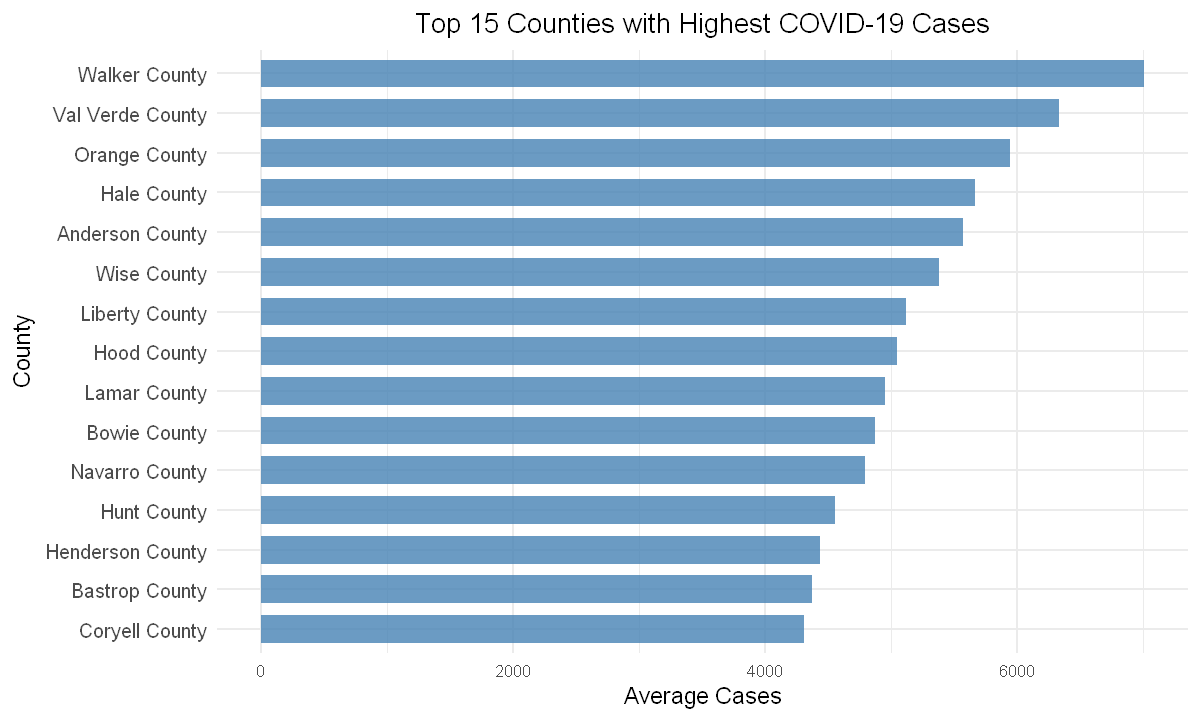

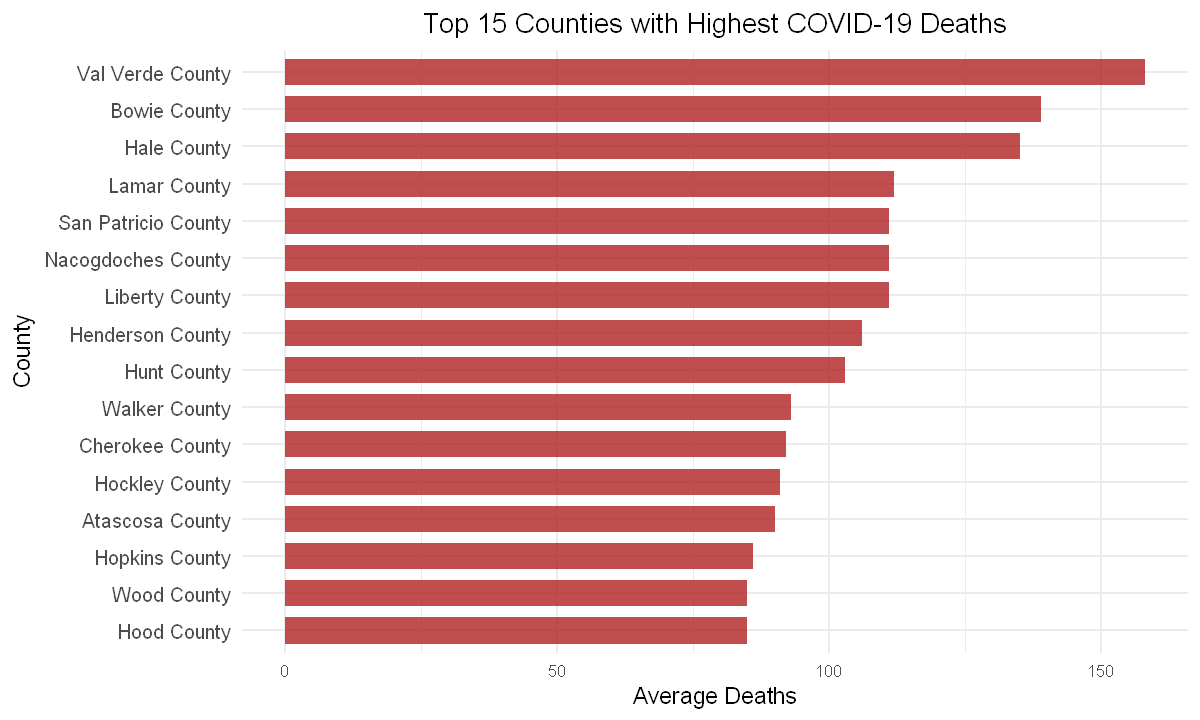

In [79]:
# Select the top 15 counties with the highest avg_cases
top_counties_cases <- county_covid_summary %>%
  slice_max(avg_cases, n = 15)

# Bar plot for highest COVID-19 cases
ggplot(top_counties_cases, aes(x = reorder(county, avg_cases), y = avg_cases)) +
  geom_col(fill = "steelblue", alpha = 0.8, width = 0.7) +  
  coord_flip() +
  theme_minimal(base_size = 14) + 
  labs(title = "Top 15 Counties with Highest COVID-19 Cases",
       x = "County", y = "Average Cases") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),  
        axis.text.y = element_text(size = 12),  
        axis.text.x = element_text(size = 10))

# Select the top 15 counties with the highest avg_deaths
top_counties_deaths <- county_covid_summary %>%
  slice_max(avg_deaths, n = 15)

# Bar plot for highest COVID-19 deaths
ggplot(top_counties_deaths, aes(x = reorder(county, avg_deaths), y = avg_deaths)) +
  geom_col(fill = "firebrick", alpha = 0.8, width = 0.7) +  
  coord_flip() +
  theme_minimal(base_size = 14) + 
  labs(title = "Top 15 Counties with Highest COVID-19 Deaths",
       x = "County", y = "Average Deaths") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),  
        axis.text.y = element_text(size = 12),  
        axis.text.x = element_text(size = 10))

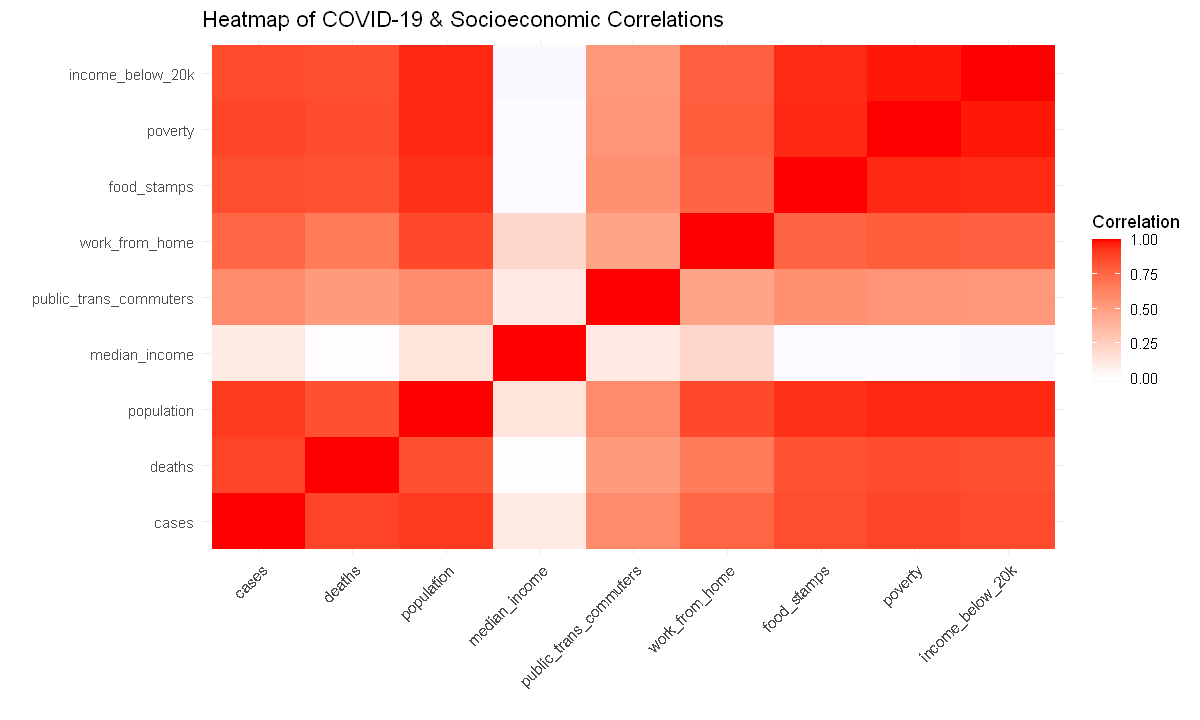

In [80]:
# Correlation Heatmap
census_vars <- covid_census_tx_cleaned %>%
  select(cases, deaths, population, median_income, 
         public_trans_commuters, work_from_home, food_stamps,
         poverty, income_below_20k)

# Compute correlation matrix
cor_matrix <- cor(census_vars, use = "complete.obs")

# Convert to long format for ggplot
heatmap_melted <- melt(cor_matrix)

# Plot heatmap before calculating the correlation matrix for the table
ggplot(heatmap_melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  labs(title = "Heatmap of COVID-19 & Socioeconomic Correlations",
       x = "", y = "", fill = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

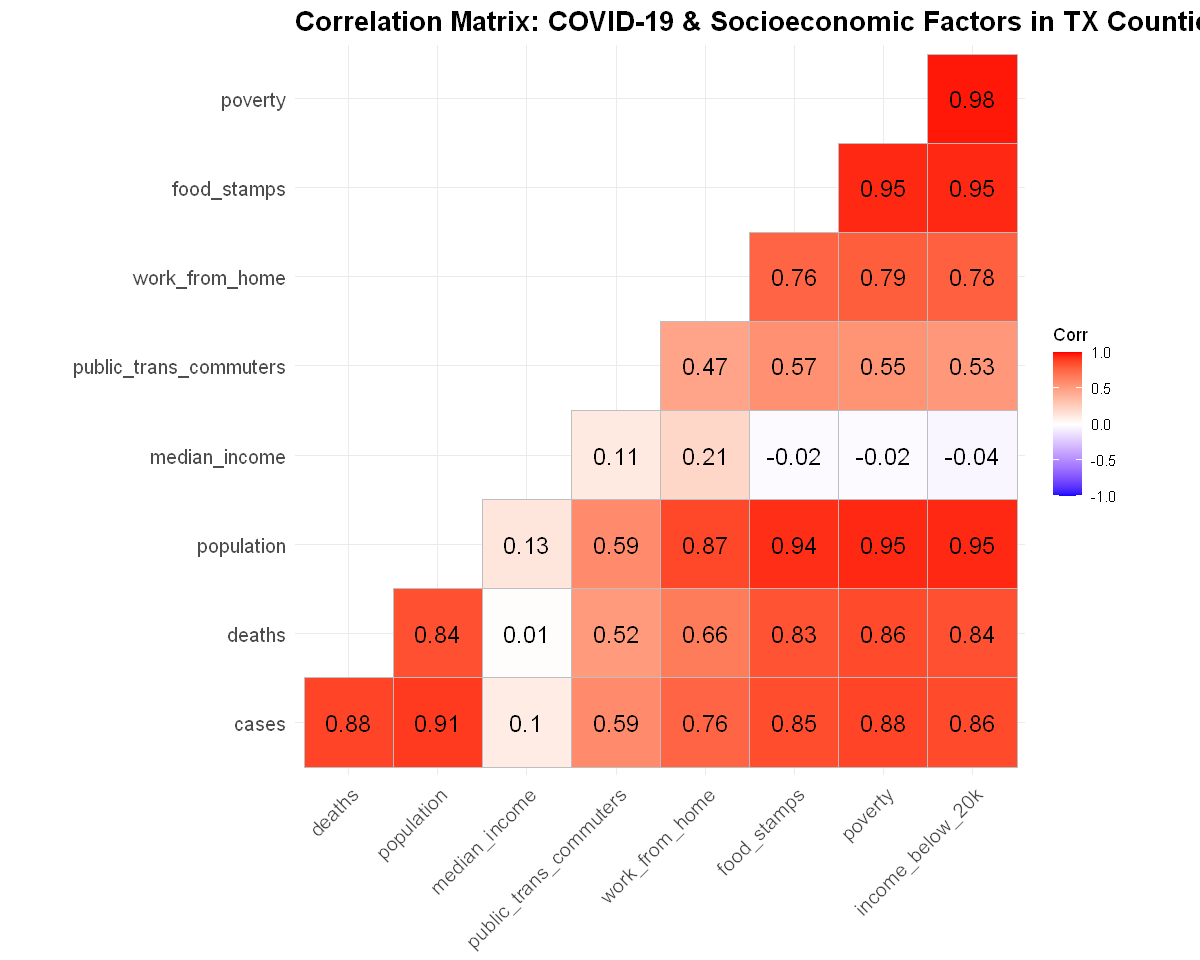

In [81]:
# Correlation Matrix
# Set figure size
options(repr.plot.width = 10, repr.plot.height = 8)
        
# Plot heatmap of correlation matrix
ggcorrplot(cor_matrix, method = "square", type = "lower", lab = TRUE,
           colors = c("blue", "white", "red"),
           title = "Correlation Matrix: COVID-19 & Socioeconomic Factors in TX Counties",
           lab_size = 5) +
    theme(
    plot.title = element_text(size = 16, face = "bold"),  
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),  
    axis.text.y = element_text(size = 12)  
  )

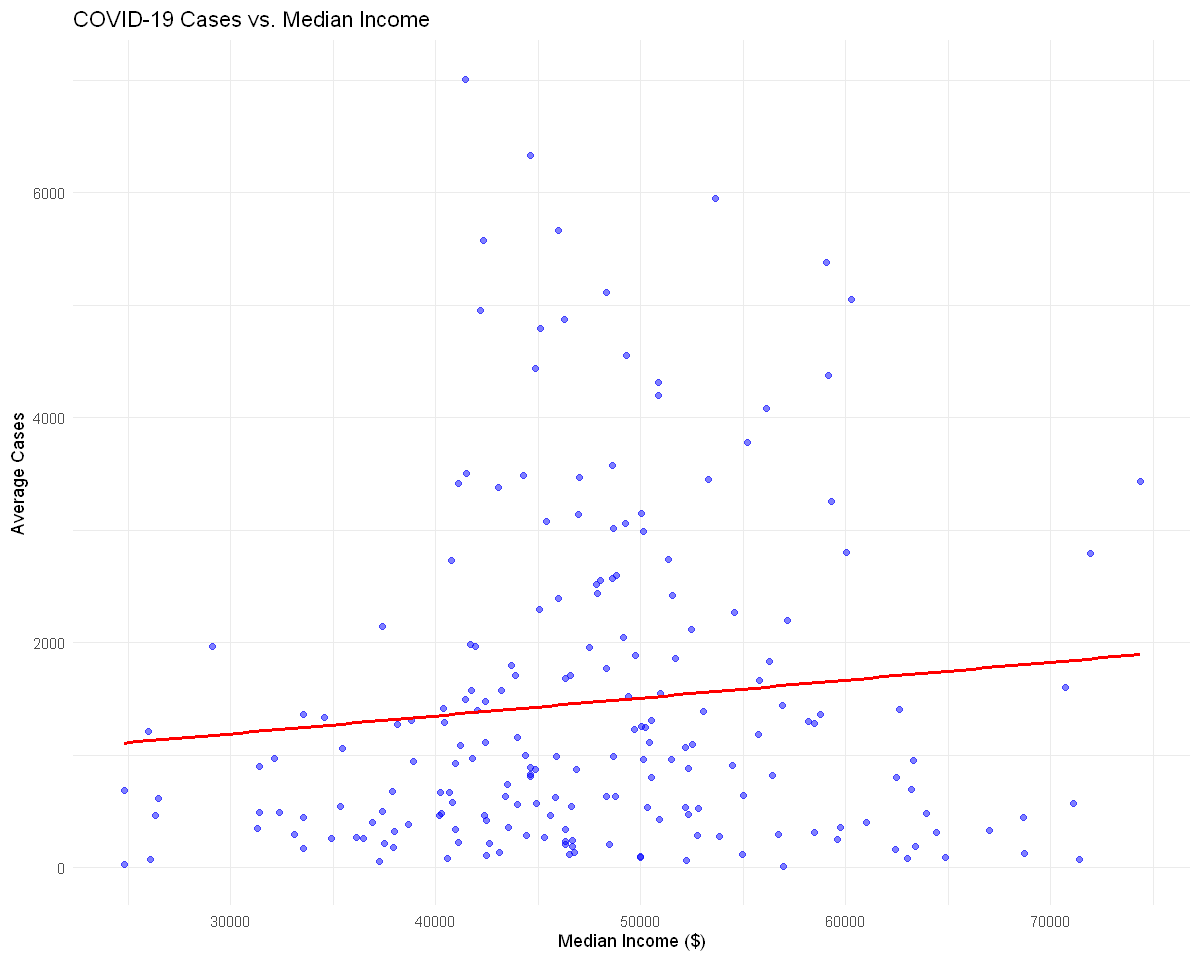

In [82]:
# Scatter Plot: COVID-19 Cases vs. Median Income
ggplot(county_covid_summary, aes(x = avg_income, y = avg_cases)) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red", se = FALSE) +
  labs(title = "COVID-19 Cases vs. Median Income",
       x = "Median Income ($)",
       y = "Average Cases") +
  theme_minimal()

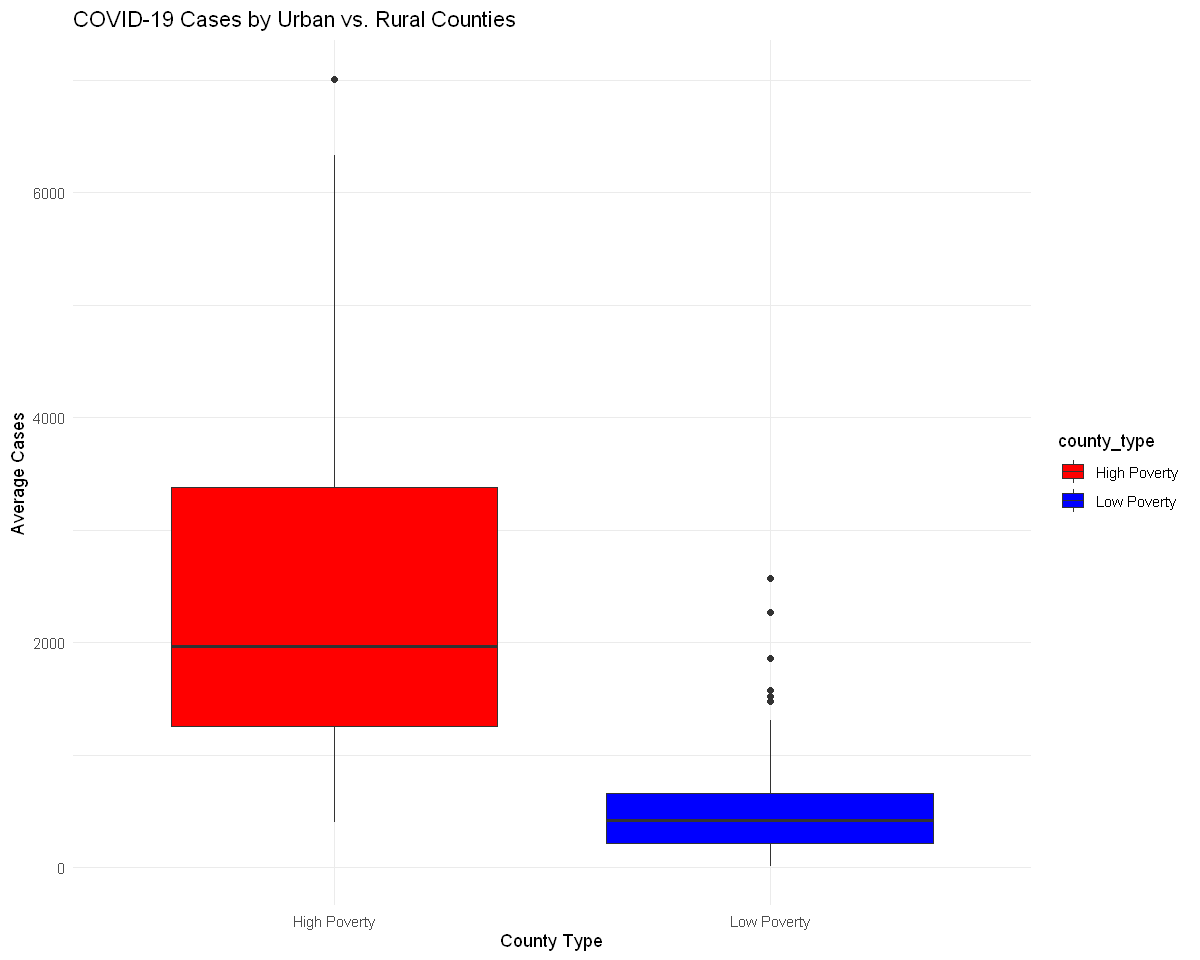

In [83]:
# Define urban vs. rural counties using median population size as a threshold
county_covid_summary <- county_covid_summary %>%
  mutate(county_type = ifelse(avg_poverty > median(avg_poverty, na.rm = TRUE), "High Poverty", "Low Poverty"))

# Box plot comparing case rates in urban vs. rural counties
ggplot(county_covid_summary, aes(x = county_type, y = avg_cases, fill = county_type)) +
  geom_boxplot() +
  labs(title = "COVID-19 Cases by Urban vs. Rural Counties",
       x = "County Type",
       y = "Average Cases") +
  scale_fill_manual(values = c("High Poverty" = "red", "Low Poverty" = "blue")) +
  theme_minimal()

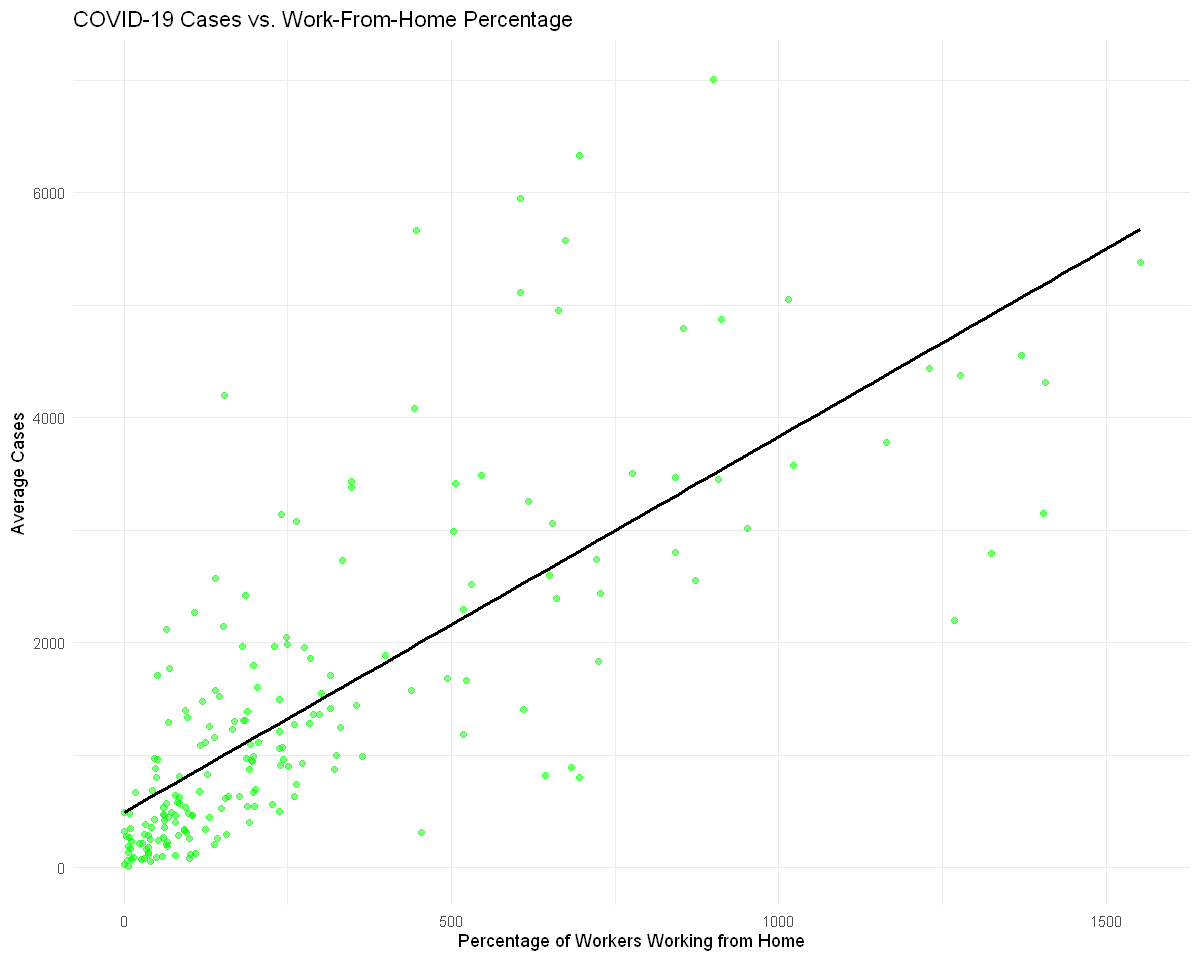

In [84]:
# Cases vs. Work-From-Home
ggplot(county_covid_summary, aes(x = avg_work_from_home, y = avg_cases)) +
  geom_point(alpha = 0.5, color = "green") +
  geom_smooth(method = "lm", formula = y ~ x, color = "black", se = FALSE) +
  labs(title = "COVID-19 Cases vs. Work-From-Home Percentage",
       x = "Percentage of Workers Working from Home",
       y = "Average Cases") +
  theme_minimal()

## Graduate-Level Analysis: by Salissa Hernandez

In [85]:
# Standardize key socioeconomic factors (z-scores)
covid_census_tx_cleaned <- covid_census_tx_cleaned %>%
  mutate(
    z_poverty = scale(poverty),
    z_public_trans = scale(public_trans_commuters),
    z_work_from_home = scale(work_from_home) 
  )

# Compute Socioeconomic Vulnerability Index
covid_census_tx_cleaned <- covid_census_tx_cleaned %>%
  mutate(vulnerability_index = (z_poverty + z_public_trans - z_work_from_home) / 3)

# View first few rows
head(covid_census_tx_cleaned %>% select(county, vulnerability_index, cases, deaths))

county           vulnerability_index cases deaths
1 Hansford County  -0.03626582         673   17    
2 Stonewall County -0.23398564         134    4    
3 Cochran County   -0.09859347         216   12    
4 Crockett County  -0.22126681         472   13    
5 McCulloch County -0.14350638         467   12    
6 Sherman County   -0.14139175         118   11

In [86]:
# Compute correlation between the vulnerability index and COVID-19 cases & deaths
cor_vulnerability_cases <- cor(covid_census_tx_cleaned$vulnerability_index, covid_census_tx_cleaned$cases, use = "complete.obs")
cor_vulnerability_deaths <- cor(covid_census_tx_cleaned$vulnerability_index, covid_census_tx_cleaned$deaths, use = "complete.obs")

# Print correlation results
cat("Correlation between Vulnerability Index and Cases:", cor_vulnerability_cases, "\n")
cat("Correlation between Vulnerability Index and Deaths:", cor_vulnerability_deaths, "\n")

Correlation between Vulnerability Index and Cases: 0.5675032 
Correlation between Vulnerability Index and Deaths: 0.5643839 


In [87]:
# Test for statistical significance of correlation
cor.test(covid_census_tx_cleaned$vulnerability_index, covid_census_tx_cleaned$cases)


	Pearson's product-moment correlation

data:  covid_census_tx_cleaned$vulnerability_index and covid_census_tx_cleaned$cases
t = 9.7717, df = 201, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4662296 0.6540950
sample estimates:
      cor 
0.5675032 


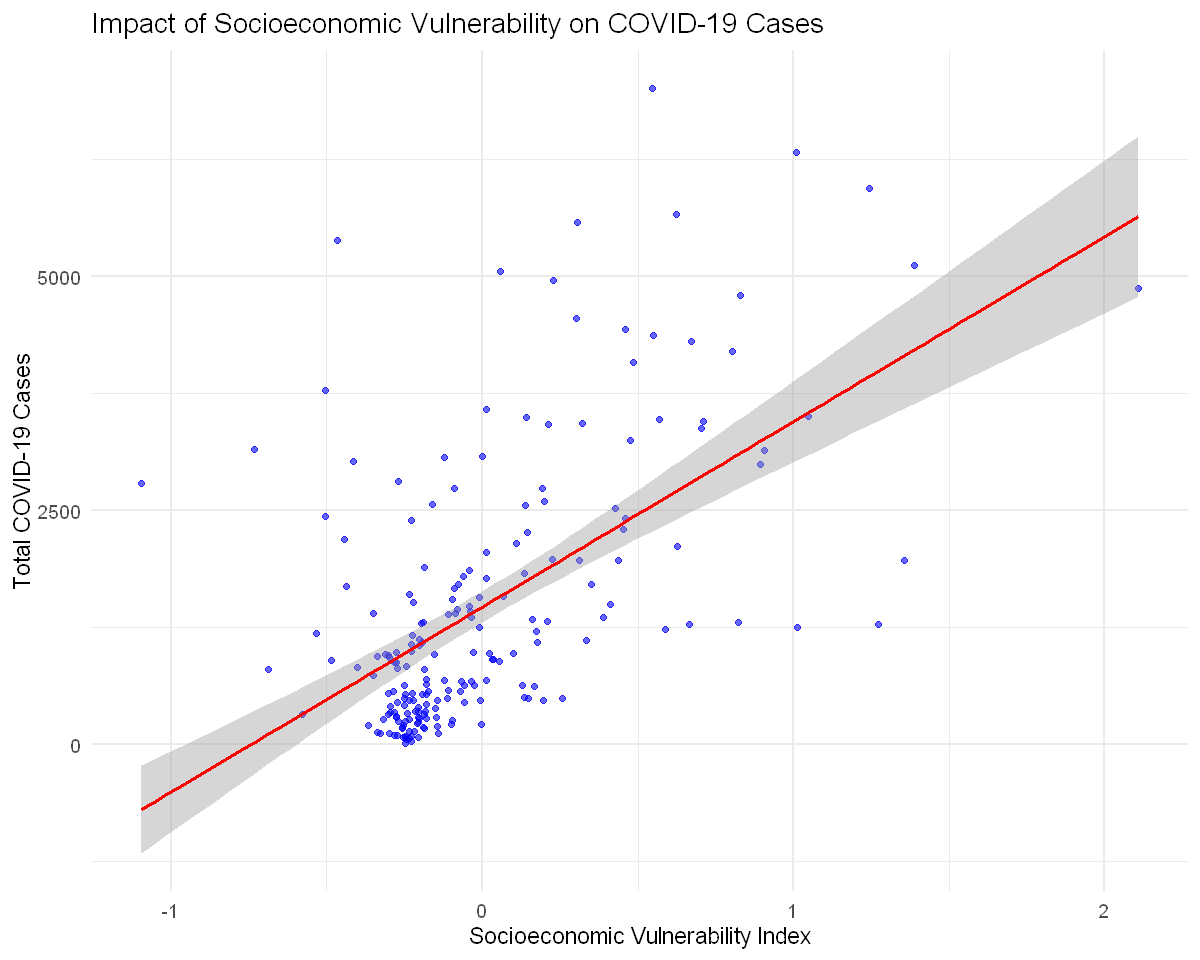

In [88]:
# Scatter plot of cases vs. vulnerability index
ggplot(covid_census_tx_cleaned, aes(x = vulnerability_index, y = cases)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_smooth(method = "lm", formula = 'y ~ x', color = "red") +
  theme_minimal(base_size = 14) +
  labs(title = "Impact of Socioeconomic Vulnerability on COVID-19 Cases",
       x = "Socioeconomic Vulnerability Index",
       y = "Total COVID-19 Cases")

In [89]:
# Select the top 10 most vulnerable counties
top_vulnerable_counties <- covid_census_tx_cleaned %>%
  arrange(desc(vulnerability_index)) %>%
  select(county, vulnerability_index, cases, deaths) %>%
  head(10)

# Display results
print(top_vulnerable_counties)

# A tibble: 10 × 4
   county             vulnerability_index[,1] cases deaths
   <fct>                                <dbl> <dbl>  <dbl>
 1 Bowie County                         2.11   4876    139
 2 Liberty County                       1.39   5116    111
 3 Gonzales County                      1.36   1962     29
 4 Jackson County                       1.27   1284     23
 5 Orange County                        1.24   5946     81
 6 Nacogdoches County                   1.05   3506    111
 7 Colorado County                      1.01   1251     17
 8 Val Verde County                     1.01   6331    158
 9 Titus County                         0.906  3137     60
10 Wharton County                       0.895  2988     84


Warning message:
"attributes are not identical across measure variables; they will be dropped"


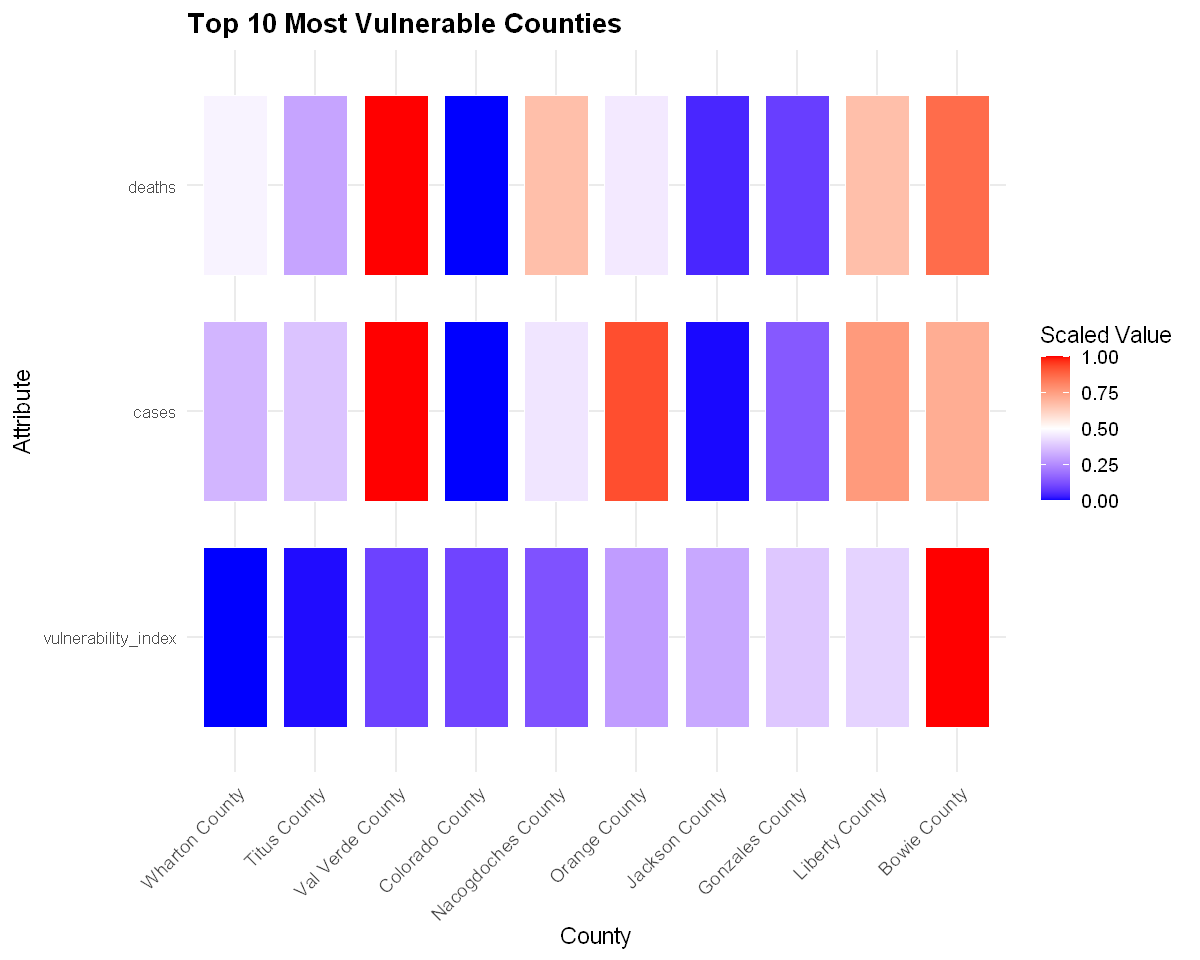

In [90]:
# Heatmap 10 most vulnerable counties

# Scale vulnerability
top_vulnerable_counties$vulnerability_index <- scales::rescale(top_vulnerable_counties$vulnerability_index)
top_vulnerable_counties$cases <- scales::rescale(top_vulnerable_counties$cases)
top_vulnerable_counties$deaths <- scales::rescale(top_vulnerable_counties$deaths)

# Melt data
heatmap_melted <- melt(top_vulnerable_counties, id.vars = "county")

# Order counties by vulnerability index
heatmap_melted$county <- factor(heatmap_melted$county, 
                                levels = top_vulnerable_counties$county[order(top_vulnerable_counties$vulnerability_index)])

# Plot heatmap
ggplot(heatmap_melted, aes(x = county, y = variable, fill = value)) +
  geom_tile(color = "white", width = 0.8, height = 0.8) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0.5) +
  labs(title = "Top 10 Most Vulnerable Counties",
       x = "County",
       y = "Attribute",
       fill = "Scaled Value") +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(size = 10),
        plot.title = element_text(size = 16, face = "bold"))

## 2.3 Covid Cases Texas

In [91]:
# Randomly display 10 rows
covid_cases_tx %>%
  sample_n(10)

county_fips_code county_name      state state_fips_code date      
1  48051            Burleson County  TX    48              2020-08-13
2  48397            Rockwall County  TX    48              2020-12-01
3  48097            Cooke County     TX    48              2020-02-12
4  48057            Calhoun County   TX    48              2020-09-19
5  48213            Henderson County TX    48              2020-06-22
6  48411            San Saba County  TX    48              2020-03-09
7  48179            Gray County      TX    48              2020-09-24
8  48459            Upshur County    TX    48              2020-02-16
9  48421            Sherman County   TX    48              2020-05-15
10 48173            Glasscock County TX    48              2020-08-20
   confirmed_cases deaths
1   248             6    
2  2994            37    
3     0             0    
4   626             7    
5    97             3    
6     0             0    
7   295             6    
8     0             0    
9    21             0    
10    6             0

In [92]:
# View of data
glimpse(covid_cases_tx)

Rows: 94,350
Columns: 7
$ county_fips_code <chr> "00000", "00000", "00000", "00000", "00000", "00000",…
$ county_name      <chr> "Statewide Unallocated", "Statewide Unallocated", "St…
$ state            <chr> "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX",…
$ state_fips_code  <dbl> 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 4…
$ date             <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020…
$ confirmed_cases  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ deaths           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


In [93]:
# Rename columns for clarity and consistency
covid_cases_tx <- covid_cases_tx %>%
  select(
    county = county_name,
    state,
    date,
    cases = confirmed_cases,
    deaths
  )

In [94]:
# verify column name change
colnames(covid_cases_tx)

[1] "county" "state"  "date"   "cases"  "deaths"

In [95]:
#View the structure of the dataset
glimpse(covid_cases_tx)

Rows: 94,350
Columns: 5
$ county <chr> "Statewide Unallocated", "Statewide Unallocated", "Statewide Un…
$ state  <chr> "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX…
$ date   <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 20…
$ cases  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ deaths <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [96]:
# View the first few rows again to confirm changes
head(covid_cases_tx)

county                state date       cases deaths
1 Statewide Unallocated TX    2020-01-22 0     0     
2 Statewide Unallocated TX    2020-01-23 0     0     
3 Statewide Unallocated TX    2020-01-24 0     0     
4 Statewide Unallocated TX    2020-01-25 0     0     
5 Statewide Unallocated TX    2020-01-26 0     0     
6 Statewide Unallocated TX    2020-01-27 0     0

In [97]:
# Convert categorical variables to factors and date to Date type
covid_cases_tx <- covid_cases_tx %>%
  mutate(
    county = as.factor(county),
    state = as.factor(state),
    date = as.Date(date)
  )

  # Display the filtered dataset
glimpse(covid_cases_tx)

# View the first few rows again to confirm changes
head(covid_cases_tx)

Rows: 94,350
Columns: 5
$ county <fct> Statewide Unallocated, Statewide Unallocated, Statewide Unalloc…
$ state  <fct> TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX,…
$ date   <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 20…
$ cases  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ deaths <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


county                state date       cases deaths
1 Statewide Unallocated TX    2020-01-22 0     0     
2 Statewide Unallocated TX    2020-01-23 0     0     
3 Statewide Unallocated TX    2020-01-24 0     0     
4 Statewide Unallocated TX    2020-01-25 0     0     
5 Statewide Unallocated TX    2020-01-26 0     0     
6 Statewide Unallocated TX    2020-01-27 0     0

In [98]:
# Check for missing values in each column
missing_values <- covid_cases_tx %>%
  summarize(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(cols = everything(), names_to = "column", values_to = "missing_count") %>%
  mutate(missing_pct = (missing_count / nrow(covid_cases_tx)) * 100)

# View missing values summary
print(missing_values)

# Outcome
cat("Remaining rows after missing value removal:", nrow(covid_cases_tx), "\n")

# Check summary statistics of the cleaned dataset
summary(covid_cases_tx)

# A tibble: 5 × 3
  column missing_count missing_pct
  <chr>          <int>       <dbl>
1 county             0           0
2 state              0           0
3 date               0           0
4 cases              0           0
5 deaths             0           0
Remaining rows after missing value removal: 94350 


              county      state           date                cases         
 Anderson County :  370   TX:94350   Min.   :2020-01-22   Min.   :     0.0  
 Andrews County  :  370              1st Qu.:2020-04-23   1st Qu.:     1.0  
 Angelina County :  370              Median :2020-07-24   Median :    82.0  
 Aransas County  :  370              Mean   :2020-07-24   Mean   :  2158.6  
 Archer County   :  370              3rd Qu.:2020-10-25   3rd Qu.:   639.8  
 Armstrong County:  370              Max.   :2021-01-25   Max.   :297629.0  
 (Other)         :92130                                                     
     deaths       
 Min.   :   0.00  
 1st Qu.:   0.00  
 Median :   2.00  
 Mean   :  38.19  
 3rd Qu.:  15.00  
 Max.   :4024.00  
                  

In [99]:
# Identify duplicate rows
duplicates <- covid_cases_tx %>%
  filter(duplicated(.))

# Count duplicate rows
num_duplicates <- nrow(duplicates)

# View duplicate count
cat("Number of duplicate rows:", num_duplicates, "\n")

Number of duplicate rows: 0 


In [100]:
# Remove duplicates only if they exist
if (num_duplicates > 0) {
  covid_cases_tx <- covid_cases_tx %>%
    distinct()
  cat("Duplicates removed. New dataset size:", nrow(covid_cases_tx), "rows\n")
} else {
  cat("No duplicate rows found.\n")
}

No duplicate rows found.


In [101]:
# Define a function to count outliers using IQR
count_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  sum(x < (Q1 - 1.5 * IQR_value) | x > (Q3 + 1.5 * IQR_value), na.rm = TRUE)
}

# Create a summary table of outliers for COVID-19 case-related variables
outlier_summary <- covid_cases_tx %>%
  summarize(
    across(c(cases, deaths), count_outliers, .names = "{.col}_outliers")
  ) %>%
  pivot_longer(everything(), names_to = "Column", values_to = "Outlier_Count")

# Print the outlier summary table
print(outlier_summary, width=Inf)

# A tibble: 2 × 2
  Column          Outlier_Count
  <chr>                   <int>
1 cases_outliers          13401
2 deaths_outliers         13732


In [102]:
# Define a function to check if a value is NOT an outlier using IQR
is_not_outlier <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  x >= (Q1 - 1.5 * IQR_value) & x <= (Q3 + 1.5 * IQR_value)
}

# Remove rows containing outliers
covid_cases_tx_cleaned <- covid_cases_tx %>%
  filter(
    is_not_outlier(cases) &
    is_not_outlier(deaths)
  )

# Count how many rows were removed
rows_removed <- nrow(covid_cases_tx) - nrow(covid_cases_tx_cleaned)
cat("Number of rows removed due to outliers:", rows_removed, "\n")

Number of rows removed due to outliers: 15588 


In [103]:
# Stats after cleaning data
summary(covid_cases_tx_cleaned)

              county      state           date                cases       
 Aransas County  :  370   TX:78762   Min.   :2020-01-22   Min.   :   0.0  
 Archer County   :  370              1st Qu.:2020-04-08   1st Qu.:   0.0  
 Armstrong County:  370              Median :2020-06-27   Median :  31.0  
 Austin County   :  370              Mean   :2020-07-05   Mean   : 192.8  
 Bailey County   :  370              3rd Qu.:2020-09-27   3rd Qu.: 241.0  
 Bandera County  :  370              Max.   :2021-01-25   Max.   :1597.0  
 (Other)         :76542                                                   
     deaths     
 Min.   : 0.00  
 1st Qu.: 0.00  
 Median : 1.00  
 Mean   : 4.53  
 3rd Qu.: 6.00  
 Max.   :37.00  
                

In [104]:
# Verify rows, columns, data types
glimpse(covid_cases_tx_cleaned)

Rows: 78,762
Columns: 5
$ county <fct> Statewide Unallocated, Statewide Unallocated, Statewide Unalloc…
$ state  <fct> TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX,…
$ date   <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 20…
$ cases  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ deaths <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [105]:
# Function to compute key statistics
compute_stats <- function(data, variables) {
  data %>%
    summarize(across(
      all_of(variables),
      list(
        Range = ~ max(.x, na.rm = TRUE) - min(.x, na.rm = TRUE),
        Mode = ~ mfv(.x),
        Mean = ~ mean(.x, na.rm = TRUE),
        Median = ~ median(.x, na.rm = TRUE),
        Variance = ~ var(.x, na.rm = TRUE),
        SD = ~ sd(.x, na.rm = TRUE)
      ),
      .names = "{.col}_{.fn}"
    ))
}

# Define key variables for analysis
key_variables <- c("cases", "deaths")

# Compute statistics
stats_table <- compute_stats(covid_cases_tx_cleaned, key_variables)

# Convert to long format for better readability
stats_long <- stats_table %>%
  pivot_longer(
    cols = everything(),
    names_to = "Combined",
    values_to = "Value"
  ) %>%
  mutate(
    Variable = str_extract(Combined, "^[^_]+"), # Extract variable name
    Statistic = str_extract(Combined, "[^_]+$") # Extract statistic type
  ) %>%
  select(Variable, Statistic, Value) %>%
  pivot_wider(
    names_from = "Statistic",
    values_from = "Value"
  ) %>%
  mutate(across(where(is.list), ~ map_dbl(.x, ~ .x[1])))

# Print the formatted table
kable(stats_long, digits = 2, caption = "Summary Statistics for COVID-19 Cases and Deaths")



Table: Summary Statistics for COVID-19 Cases and Deaths

|Variable | Range| Mode|   Mean| Median|  Variance|     SD|
|:--------|-----:|----:|------:|------:|---------:|------:|
|cases    |  1597|    0| 192.81|     31| 101777.21| 319.03|
|deaths   |    37|    0|   4.53|      1|     58.49|   7.65|

[9 points]
- Visually explore the chosen attributes appropriately. 
- Provide an interpretation for each graph. 
- Explain why you chose the visualization for each attribute type. 



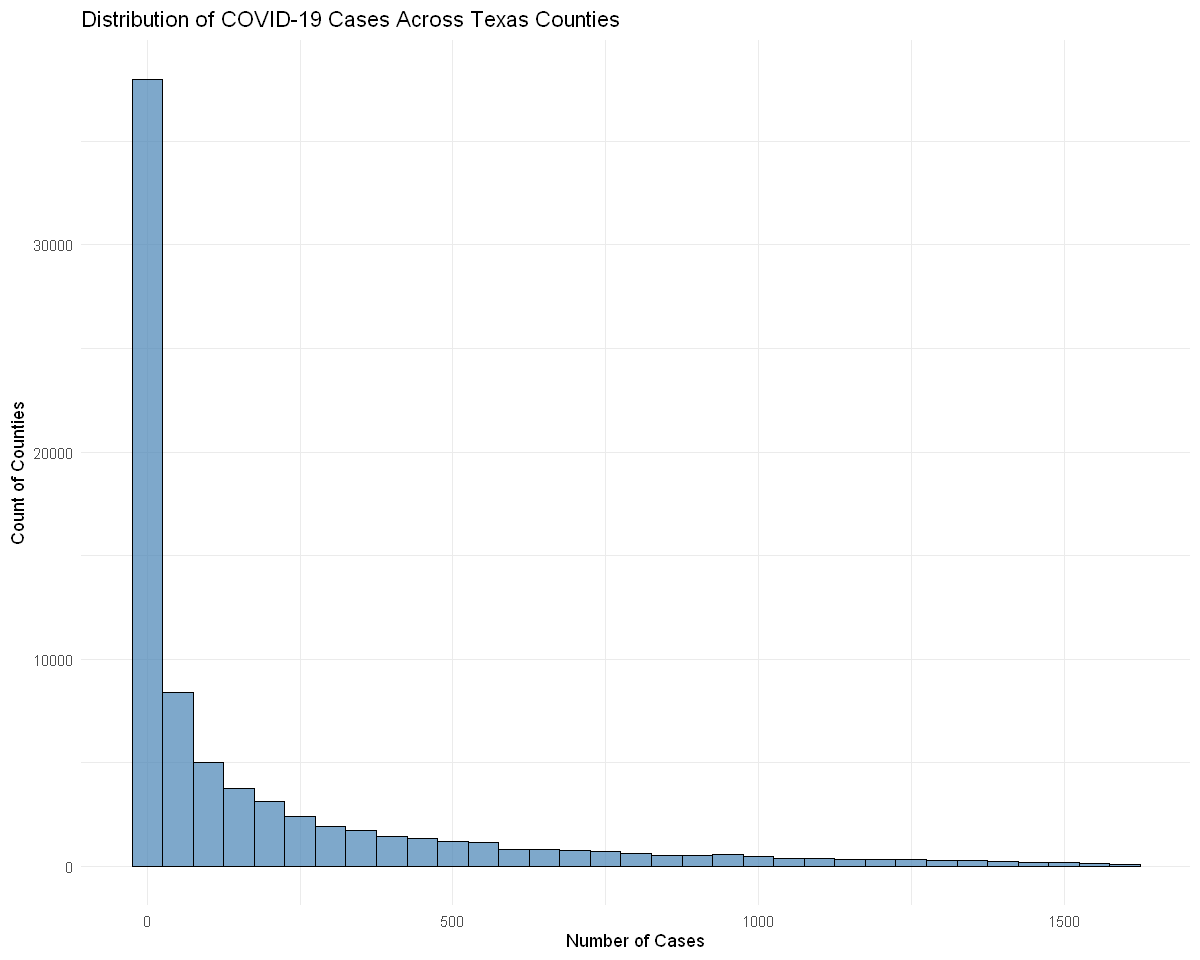

In [106]:
# Distribution of COVID-19 Cases
ggplot(covid_cases_tx_cleaned, aes(x = cases)) +
  geom_histogram(binwidth = 50, fill = "steelblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of COVID-19 Cases Across Texas Counties",
       x = "Number of Cases", 
       y = "Count of Counties") +
  theme_minimal()


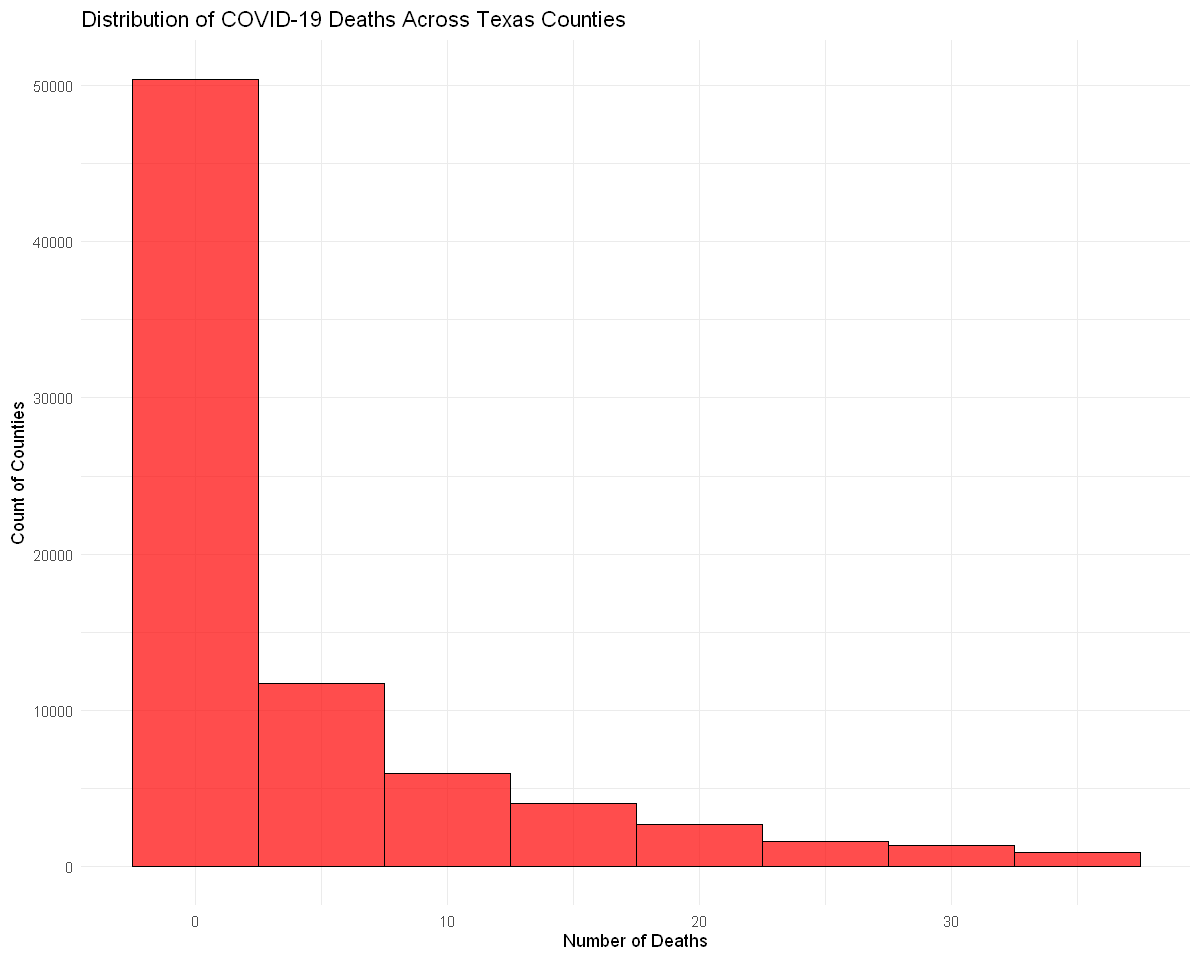

In [107]:
# Distribution of COVID-19 Deaths
ggplot(covid_cases_tx_cleaned, aes(x = deaths)) +
  geom_histogram(binwidth = 5, fill = "red", color = "black", alpha = 0.7) +
  labs(title = "Distribution of COVID-19 Deaths Across Texas Counties",
       x = "Number of Deaths", 
       y = "Count of Counties") +
  theme_minimal()

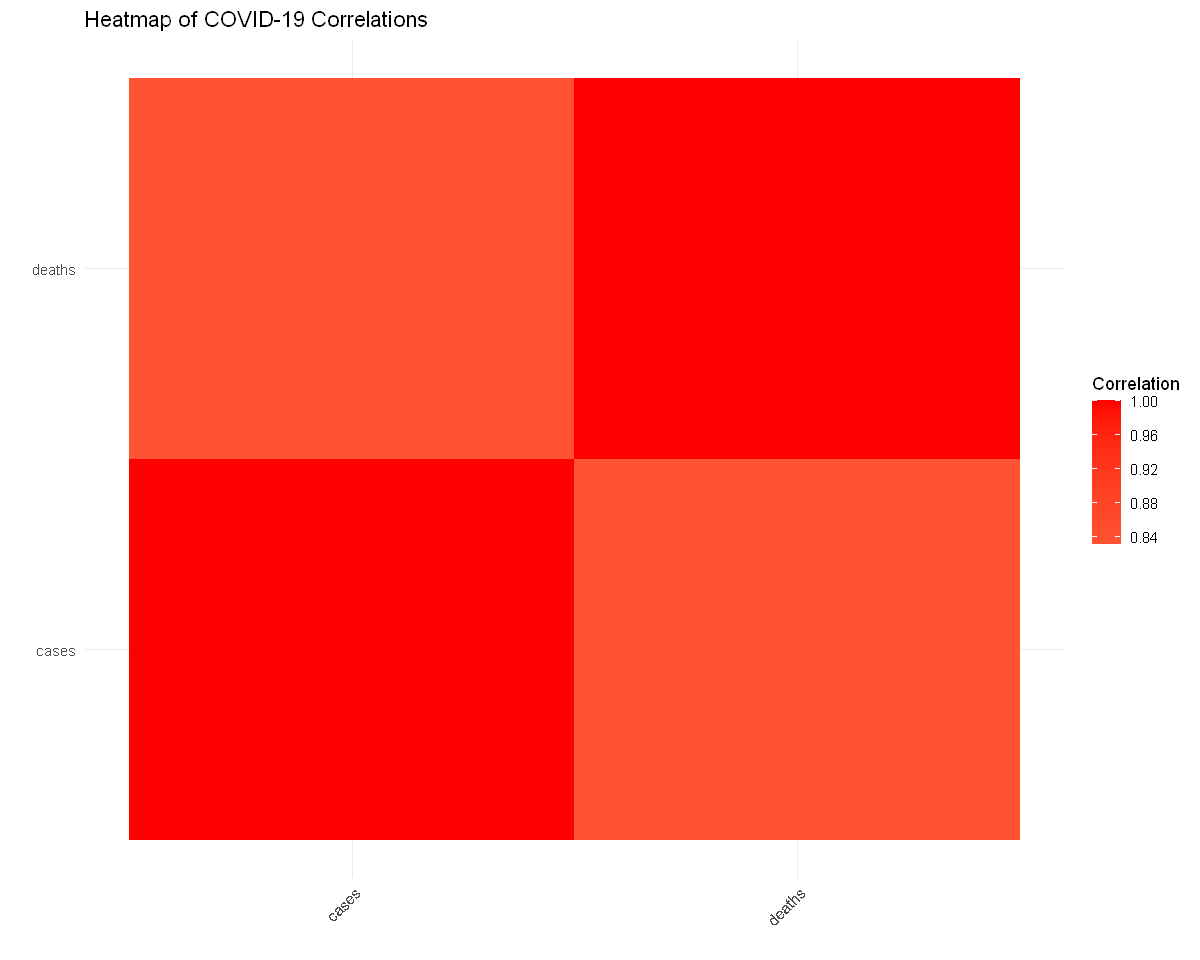

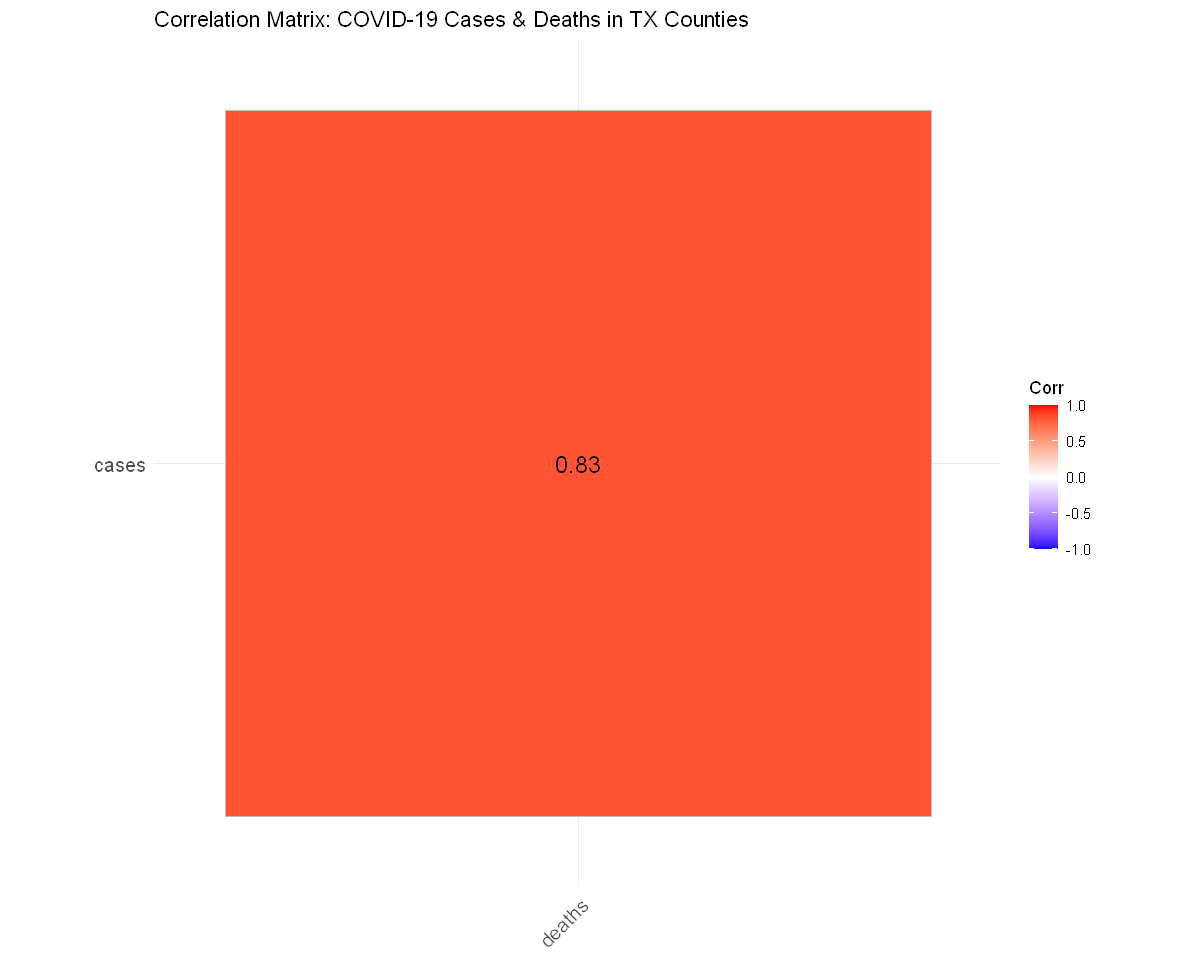

In [108]:
# Select relevant columns for correlation analysis (ONLY using 2.3 dataset columns)
covid_vars <- covid_cases_tx_cleaned %>%
  select(cases, deaths)

# Compute correlation matrix
cor_matrix <- cor(covid_vars, use = "complete.obs")

# Convert correlation matrix to long format for heatmap
heatmap_melted <- melt(cor_matrix)

# Plot correlation heatmap
ggplot(heatmap_melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  labs(title = "Heatmap of COVID-19 Correlations",
       x = "", y = "", fill = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot correlation matrix with numerical values
ggcorrplot(cor_matrix, method = "square", type = "lower", lab = TRUE,
           colors = c("blue", "white", "red"),
           title = "Correlation Matrix: COVID-19 Cases & Deaths in TX Counties",
           lab_size = 5)


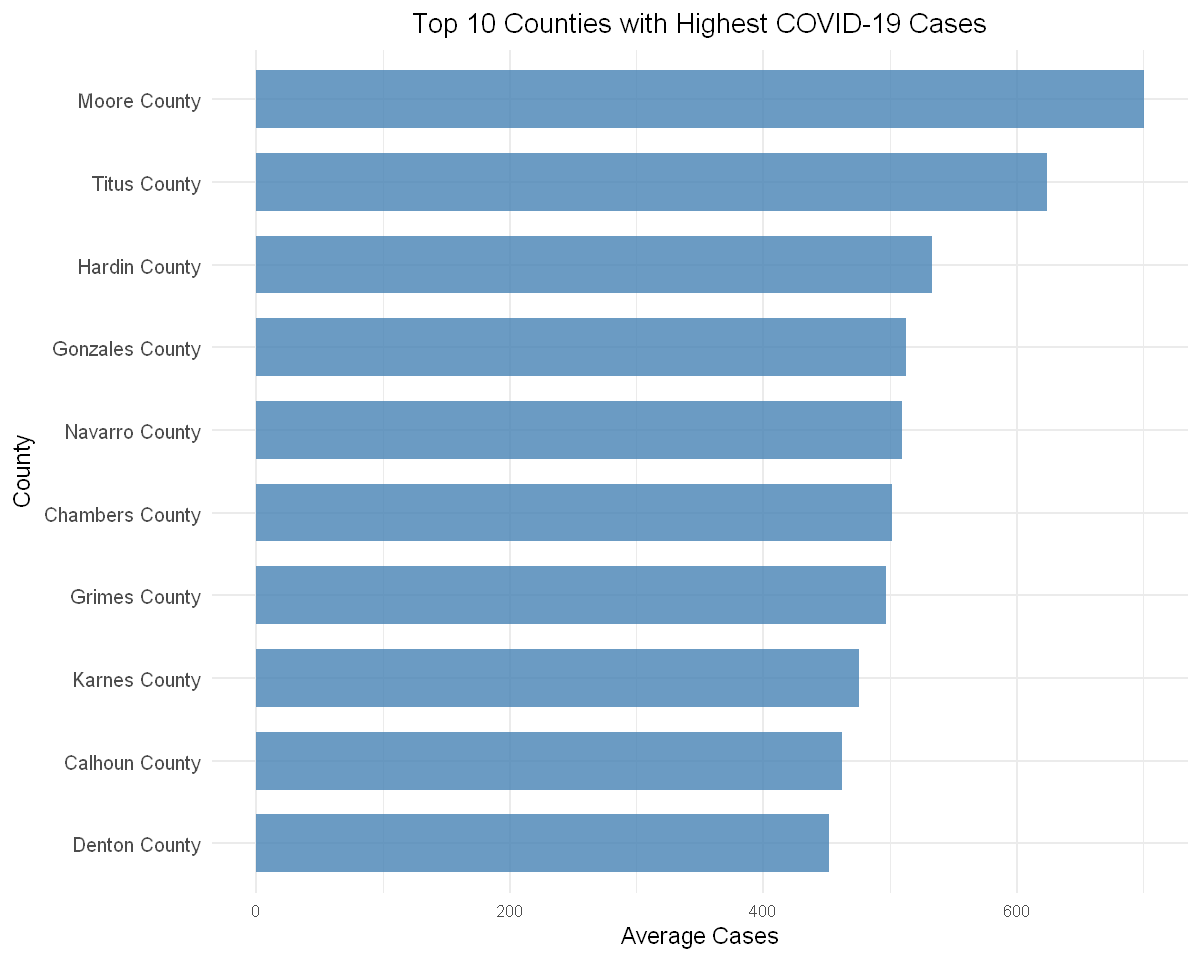

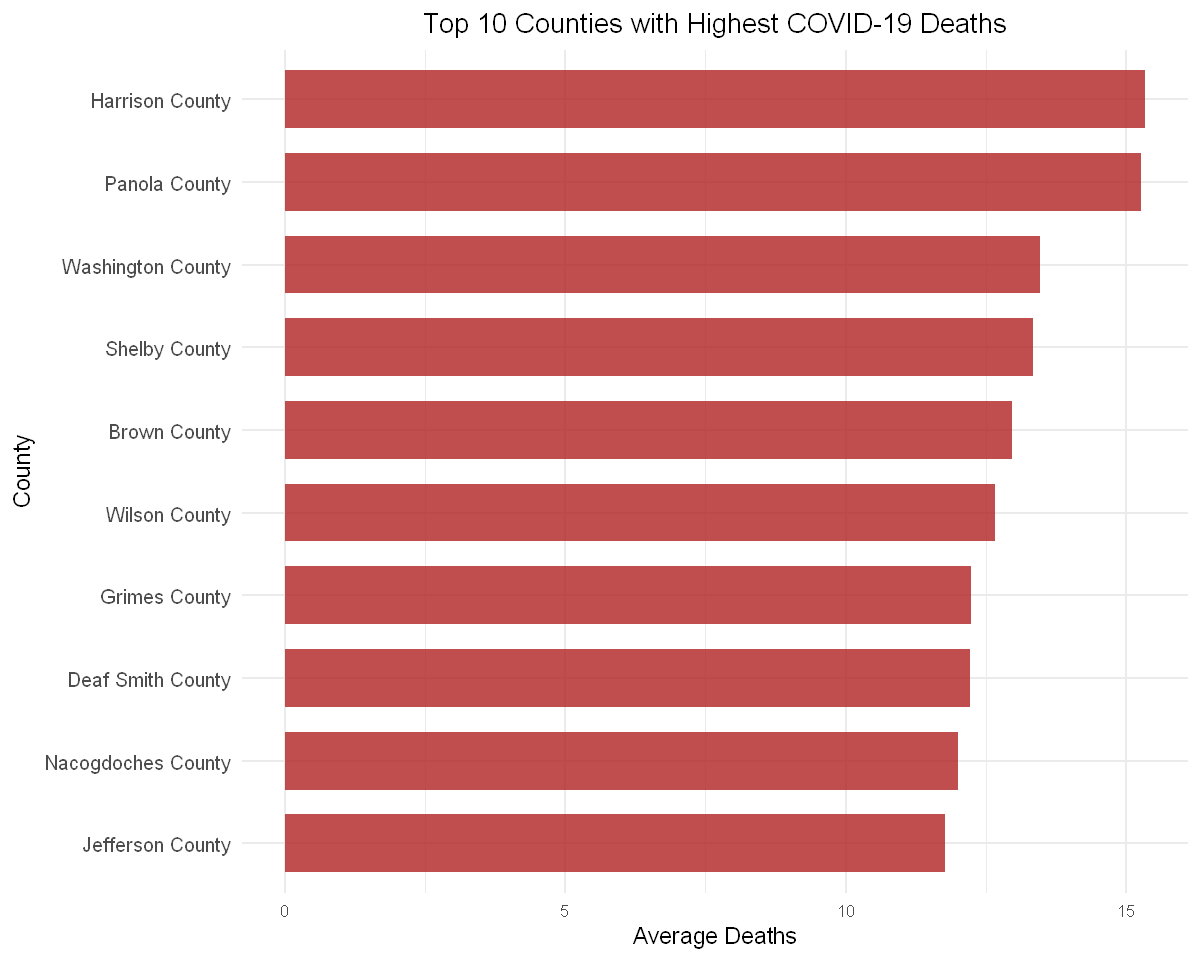

In [109]:
# Compute average cases and deaths per county
county_covid_summary <- covid_cases_tx_cleaned %>%
  group_by(county) %>%
  summarize(
    avg_cases = mean(cases, na.rm = TRUE),
    avg_deaths = mean(deaths, na.rm = TRUE)
  ) %>%
  arrange(desc(avg_cases))

# Select the top 10 counties with the highest cases
top_counties_cases <- county_covid_summary %>%
  slice_max(avg_cases, n = 10)

# Select the top 10 counties with the highest deaths
top_counties_deaths <- county_covid_summary %>%
  slice_max(avg_deaths, n = 10)

# Bar plot for highest COVID-19 cases
ggplot(top_counties_cases, aes(x = reorder(county, avg_cases), y = avg_cases)) +
  geom_col(fill = "steelblue", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 10 Counties with Highest COVID-19 Cases",
       x = "County", y = "Average Cases") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),
        axis.text.y = element_text(size = 12),
        axis.text.x = element_text(size = 10))

# Bar plot for highest COVID-19 deaths
ggplot(top_counties_deaths, aes(x = reorder(county, avg_deaths), y = avg_deaths)) +
  geom_col(fill = "firebrick", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 10 Counties with Highest COVID-19 Deaths",
       x = "County", y = "Average Deaths") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),
        axis.text.y = element_text(size = 12),
        axis.text.x = element_text(size = 10))

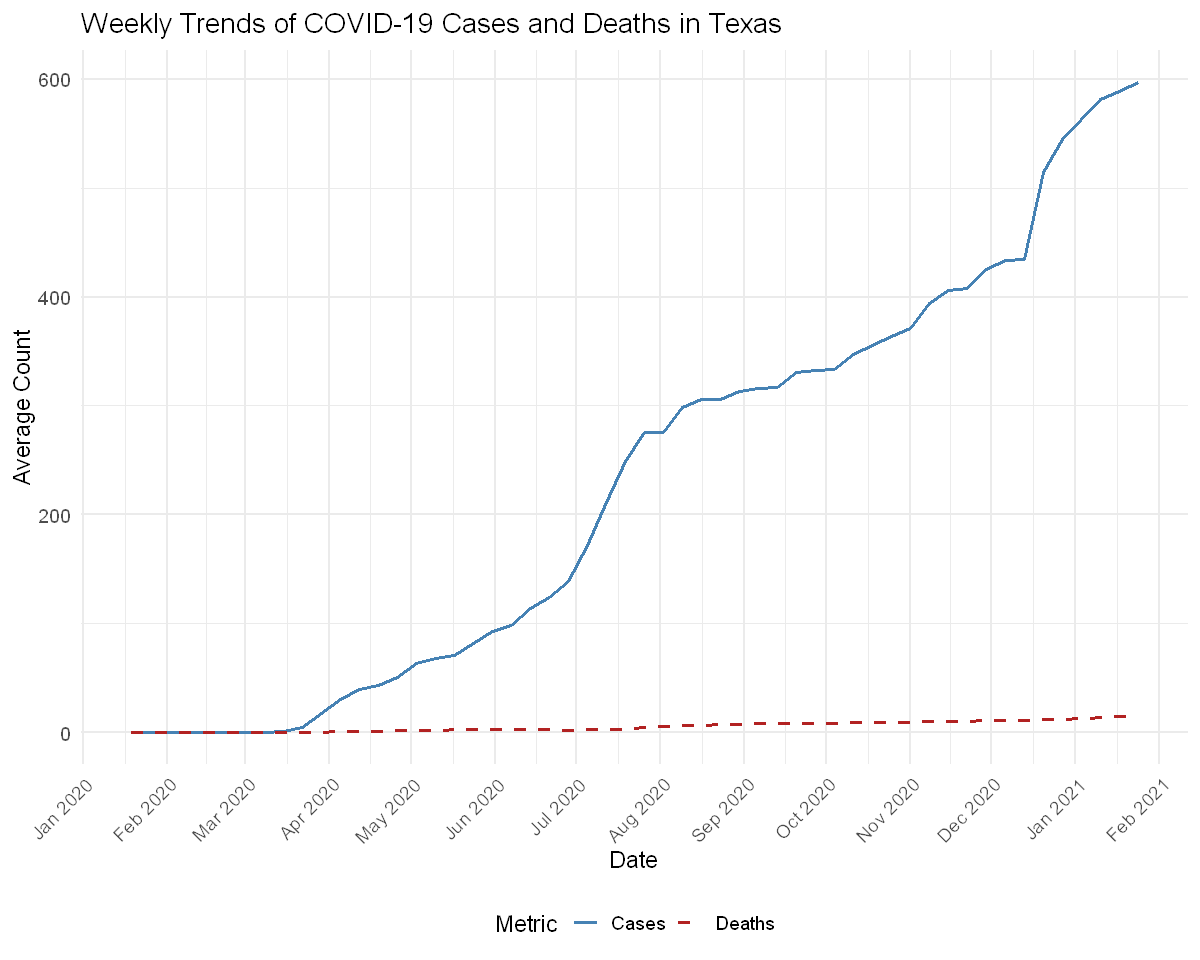

In [110]:
# Load necessary libraries

# Aggregate weekly case and death counts
covid_trends <- covid_cases_tx_cleaned %>%
  mutate(week = floor_date(date, "week")) %>%
  group_by(week) %>%
  summarize(
    avg_cases = mean(cases, na.rm = TRUE),
    avg_deaths = mean(deaths, na.rm = TRUE)
  ) %>%
  arrange(week)

# Line plot for cases and deaths over time
ggplot(covid_trends, aes(x = week)) +
  geom_line(aes(y = avg_cases, color = "Cases"), linewidth = 1) +
  geom_line(aes(y = avg_deaths, color = "Deaths"), linewidth = 1, linetype = "dashed") +
  theme_minimal(base_size = 14) +
  scale_color_manual(values = c("Cases" = "steelblue", "Deaths" = "firebrick")) +
  labs(
    title = "Weekly Trends of COVID-19 Cases and Deaths in Texas",
    x = "Date",
    y = "Average Count",
    color = "Metric"
  ) +
  theme(
    legend.position = "bottom",
    axis.text.x = element_text(angle = 45, hjust = 1)
  ) +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y")

## Graduate-Level Analysis: by Leonardo Piedrahita

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


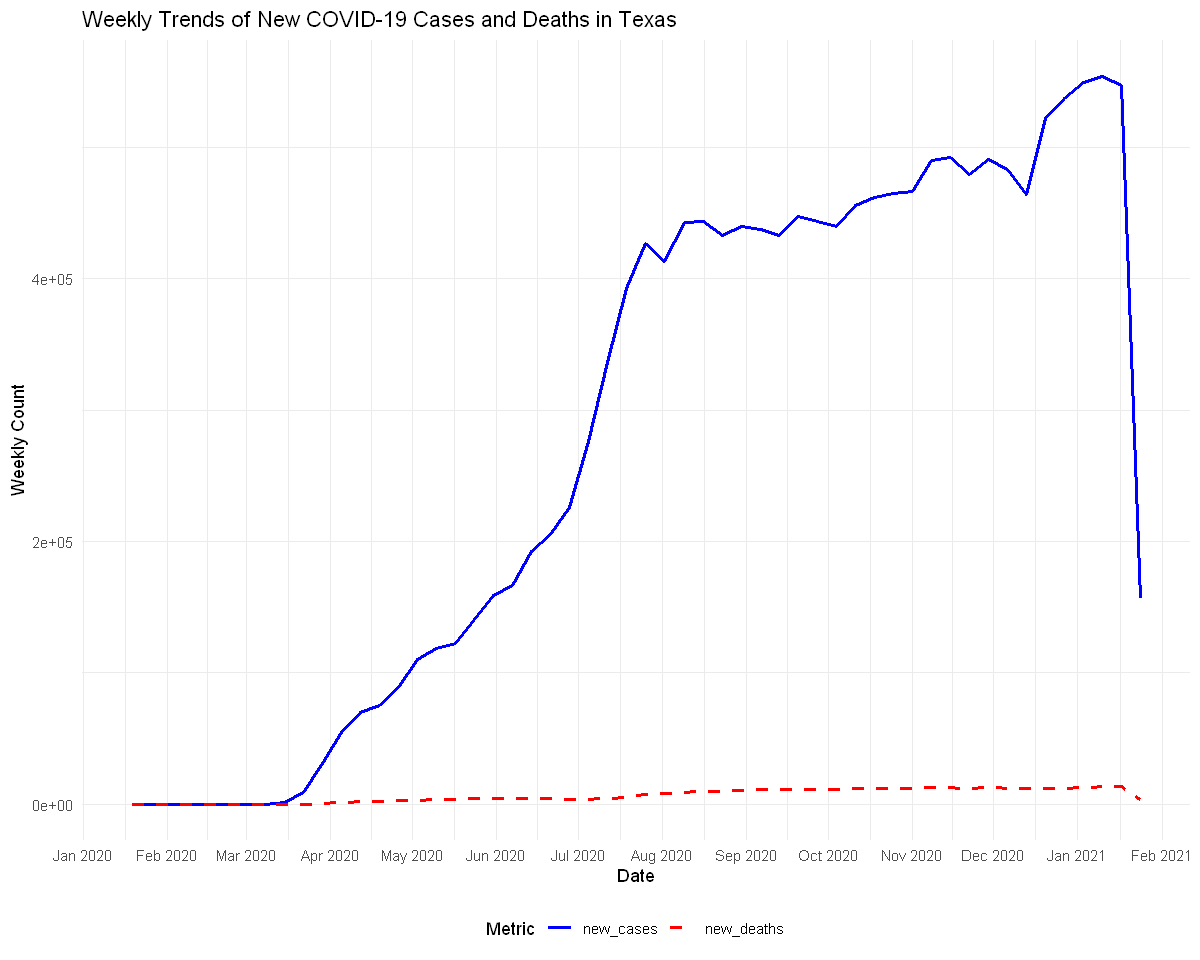

In [111]:
# Ensure date column is in Date format
covid_cases_tx_cleaned <- covid_cases_tx_cleaned %>%
  mutate(date = as.Date(date, format="%m/%d/%Y"))

# Aggregate new cases and deaths per week (instead of cumulative)
weekly_trends <- covid_cases_tx_cleaned %>%
  mutate(week = floor_date(date, "week")) %>%
  group_by(week) %>%
  summarize(
    new_cases = sum(cases, na.rm = TRUE),
    new_deaths = sum(deaths, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = c(new_cases, new_deaths), 
               names_to = "metric", 
               values_to = "count")

# Plot new weekly trends (NOT cumulative)
ggplot(weekly_trends, aes(x = week, y = count, color = metric, linetype = metric)) +
  geom_line(size = 1) +
  scale_color_manual(values = c("new_cases" = "blue", "new_deaths" = "red")) +
  scale_linetype_manual(values = c("new_cases" = "solid", "new_deaths" = "dashed")) +
  labs(
    title = "Weekly Trends of New COVID-19 Cases and Deaths in Texas",
    x = "Date",
    y = "Weekly Count",
    color = "Metric",
    linetype = "Metric"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y")


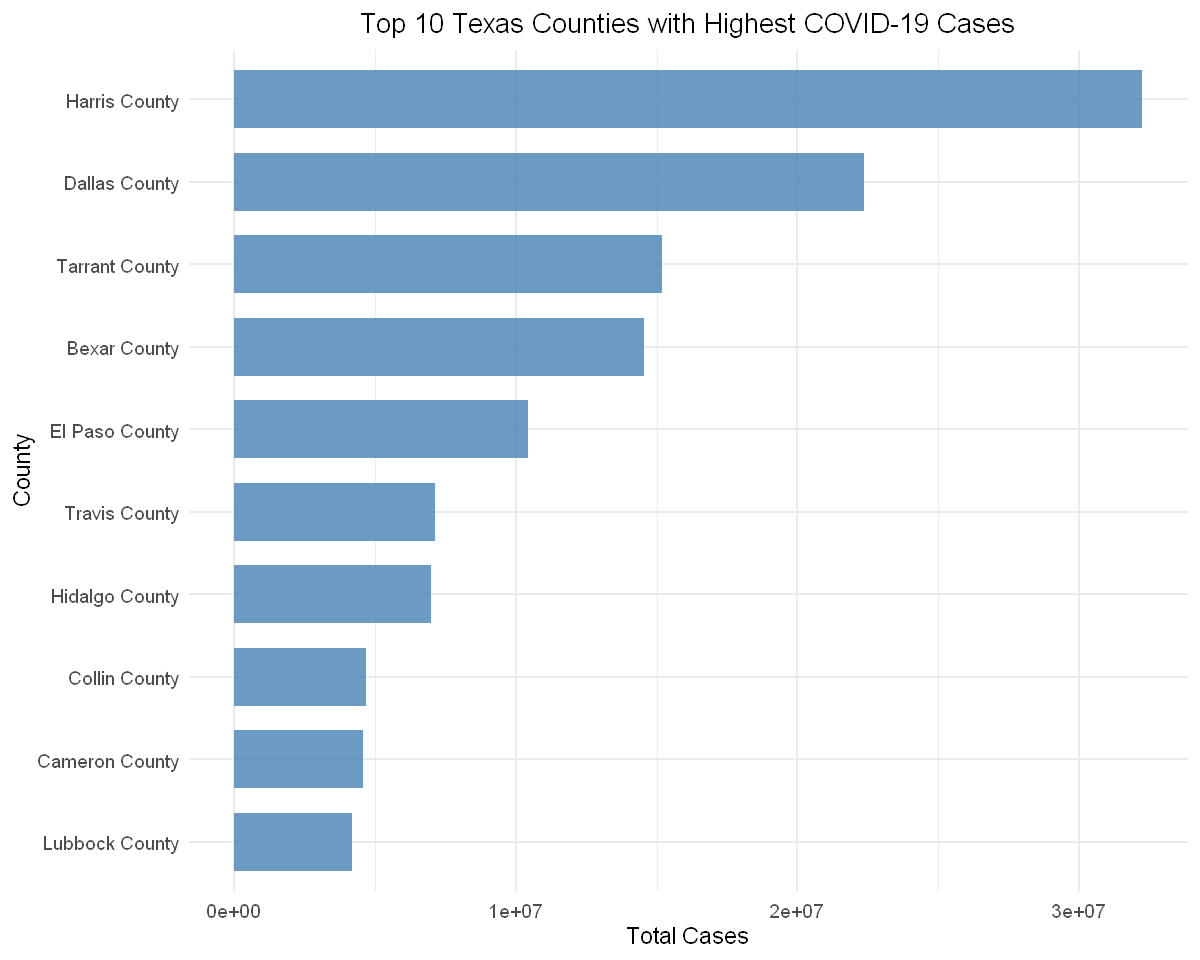

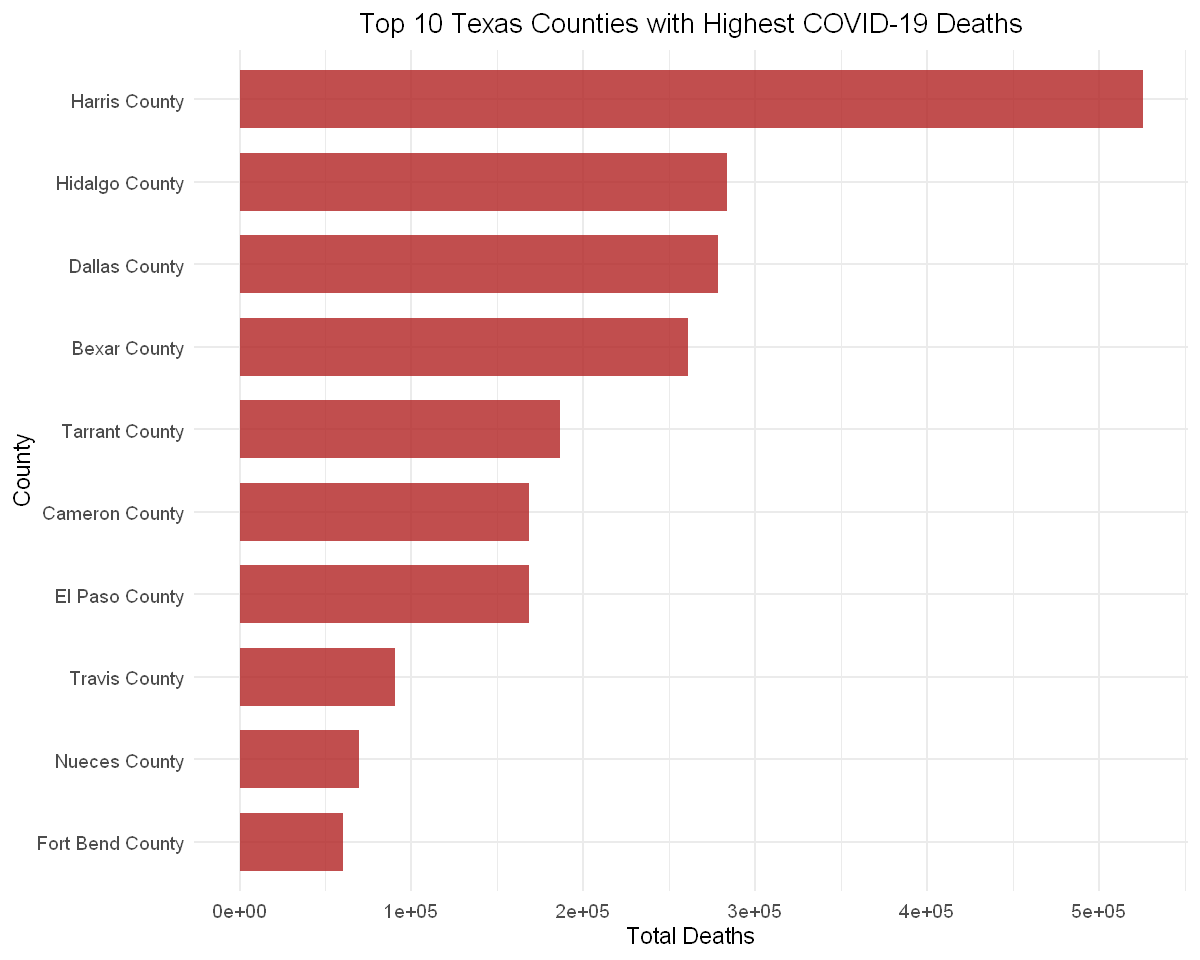

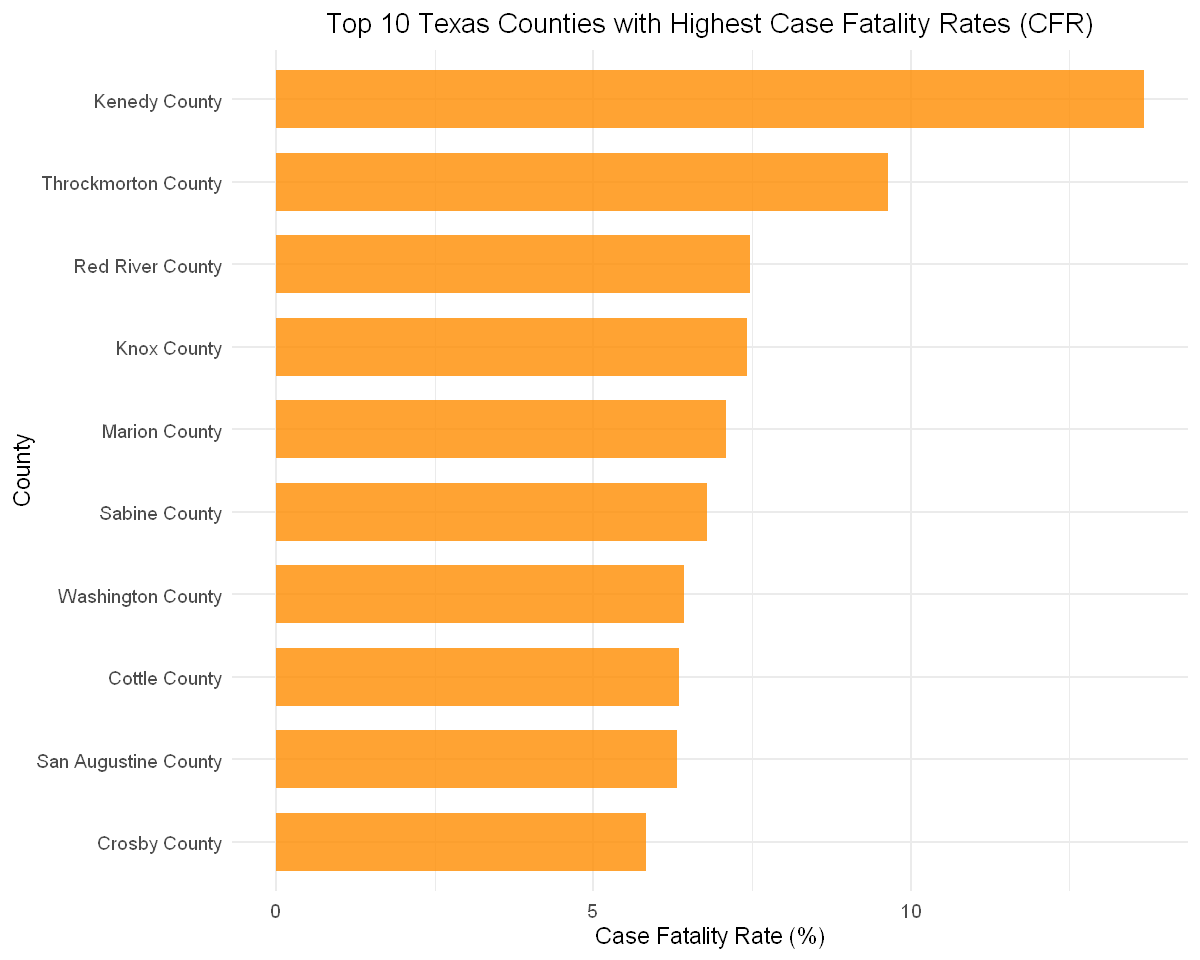

In [112]:
# Group data by county to compute total cases and deaths
county_summary <- covid_cases_tx %>%
  group_by(county) %>%
  summarize(
    total_cases = sum(cases, na.rm = TRUE),
    total_deaths = sum(deaths, na.rm = TRUE)
  ) %>%
  mutate(case_fatality_rate = (total_deaths / total_cases) * 100) %>%
  arrange(desc(total_cases))

# Top 10 counties with highest cases
top_cases <- county_summary %>%
  slice_max(total_cases, n = 10)

# Top 10 counties with highest deaths
top_deaths <- county_summary %>%
  slice_max(total_deaths, n = 10)

# Top 10 counties with highest case fatality rate (CFR)
top_cfr <- county_summary %>%
  filter(total_cases > 100) %>%  # Filter to avoid extreme outliers with very few cases
  slice_max(case_fatality_rate, n = 10)

# Bar plot for highest total cases
ggplot(top_cases, aes(x = reorder(county, total_cases), y = total_cases)) +
  geom_col(fill = "steelblue", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 10 Texas Counties with Highest COVID-19 Cases",
       x = "County", y = "Total Cases") +
  theme(plot.title = element_text(hjust = 0.5, size = 16))

# Bar plot for highest total deaths
ggplot(top_deaths, aes(x = reorder(county, total_deaths), y = total_deaths)) +
  geom_col(fill = "firebrick", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 10 Texas Counties with Highest COVID-19 Deaths",
       x = "County", y = "Total Deaths") +
  theme(plot.title = element_text(hjust = 0.5, size = 16))

# Bar plot for highest case fatality rates (CFR)
ggplot(top_cfr, aes(x = reorder(county, case_fatality_rate), y = case_fatality_rate)) +
  geom_col(fill = "darkorange", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 10 Texas Counties with Highest Case Fatality Rates (CFR)",
       x = "County", y = "Case Fatality Rate (%)") +
  theme(plot.title = element_text(hjust = 0.5, size = 16))

In [113]:
# Filter out "Statewide Unallocated" and aggregate by county
county_agg <- covid_cases_tx %>%
  filter(county != "Statewide Unallocated") %>% 
  group_by(county) %>%                          
  summarize(
    total_cases = max(cases, na.rm = TRUE),     
    total_deaths = max(deaths, na.rm = TRUE)
  ) %>%
  filter(!is.na(total_cases) & !is.na(total_deaths) & total_cases > 0)  # Remove NA and zero-case counties

# Quick check of the data
head(county_agg)

county           total_cases total_deaths
1 Anderson County  5724         84         
2 Andrews County   1630         37         
3 Angelina County  6857        206         
4 Aransas County    935         29         
5 Archer County     733         10         
6 Armstrong County  135          6

In [114]:
# Correlation matrix for cases and deaths
cc <- county_agg %>%
  select(total_cases, total_deaths) %>%
  cor(use = "complete.obs")
print("Correlation Matrix:")
print(cc)

[1] "Correlation Matrix:"
             total_cases total_deaths
total_cases    1.0000000    0.9519214
total_deaths   0.9519214    1.0000000


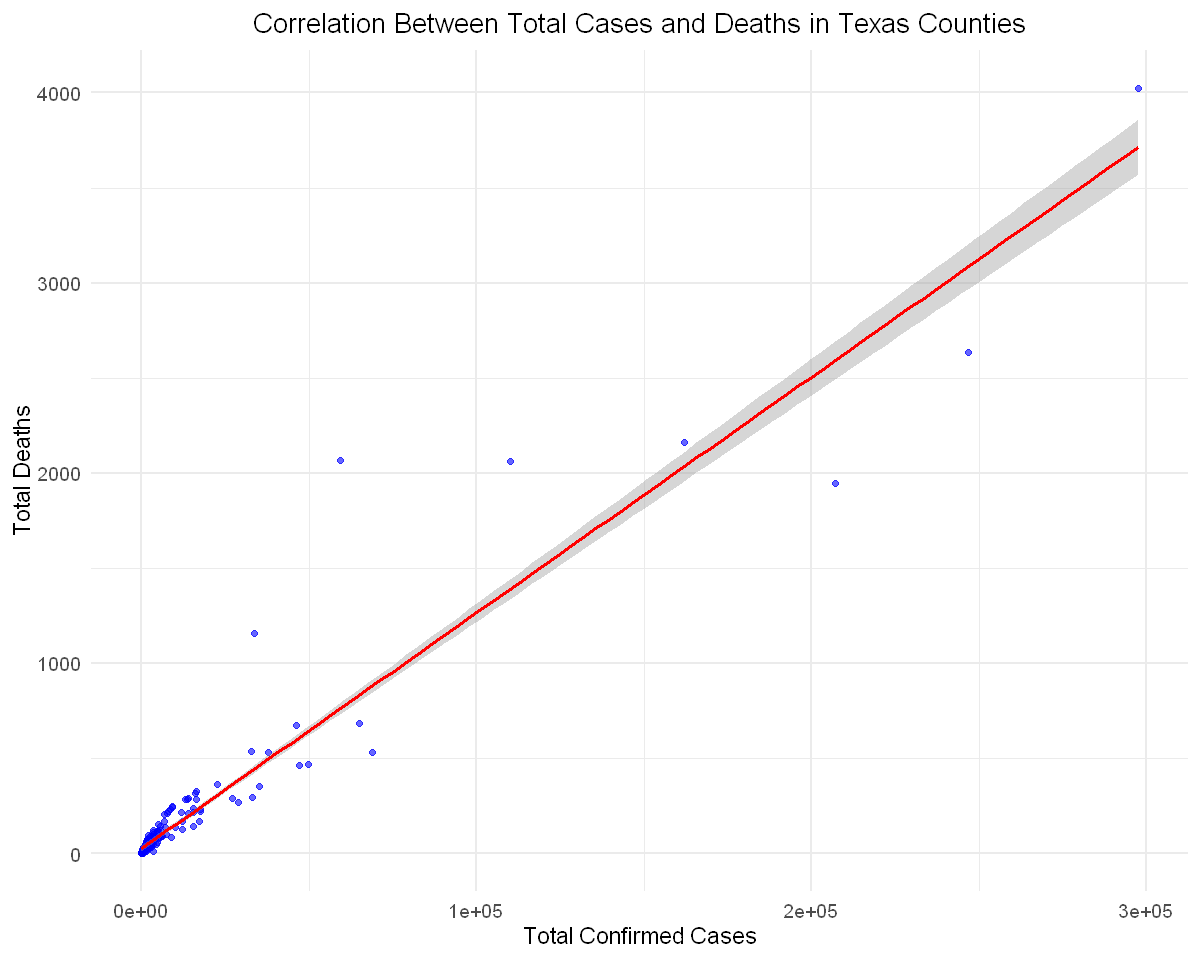

In [115]:
library(ggplot2)

ggplot(county_agg, aes(x = total_cases, y = total_deaths)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_smooth(method = "lm", formula = y ~ x, color = "red", se = TRUE) +
  theme_minimal(base_size = 14) +
  labs(title = "Correlation Between Total Cases and Deaths in Texas Counties",
       x = "Total Confirmed Cases", y = "Total Deaths") +
  theme(plot.title = element_text(hjust = 0.5, size = 16))

In [116]:
# Run the correlation test
cor_test_result <- with(county_agg, cor.test(total_cases, total_deaths))

# Print the results
print("Correlation Test Result:")
print(cor_test_result)

[1] "Correlation Test Result:"

	Pearson's product-moment correlation

data:  total_cases and total_deaths
t = 49.328, df = 252, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9388375 0.9622609
sample estimates:
      cor 
0.9519214 




	Pearson's product-moment correlation

data:  total_cases and total_deaths
t = 49.328, df = 252, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9388375 0.9622609
sample estimates:
      cor 
0.9519214 



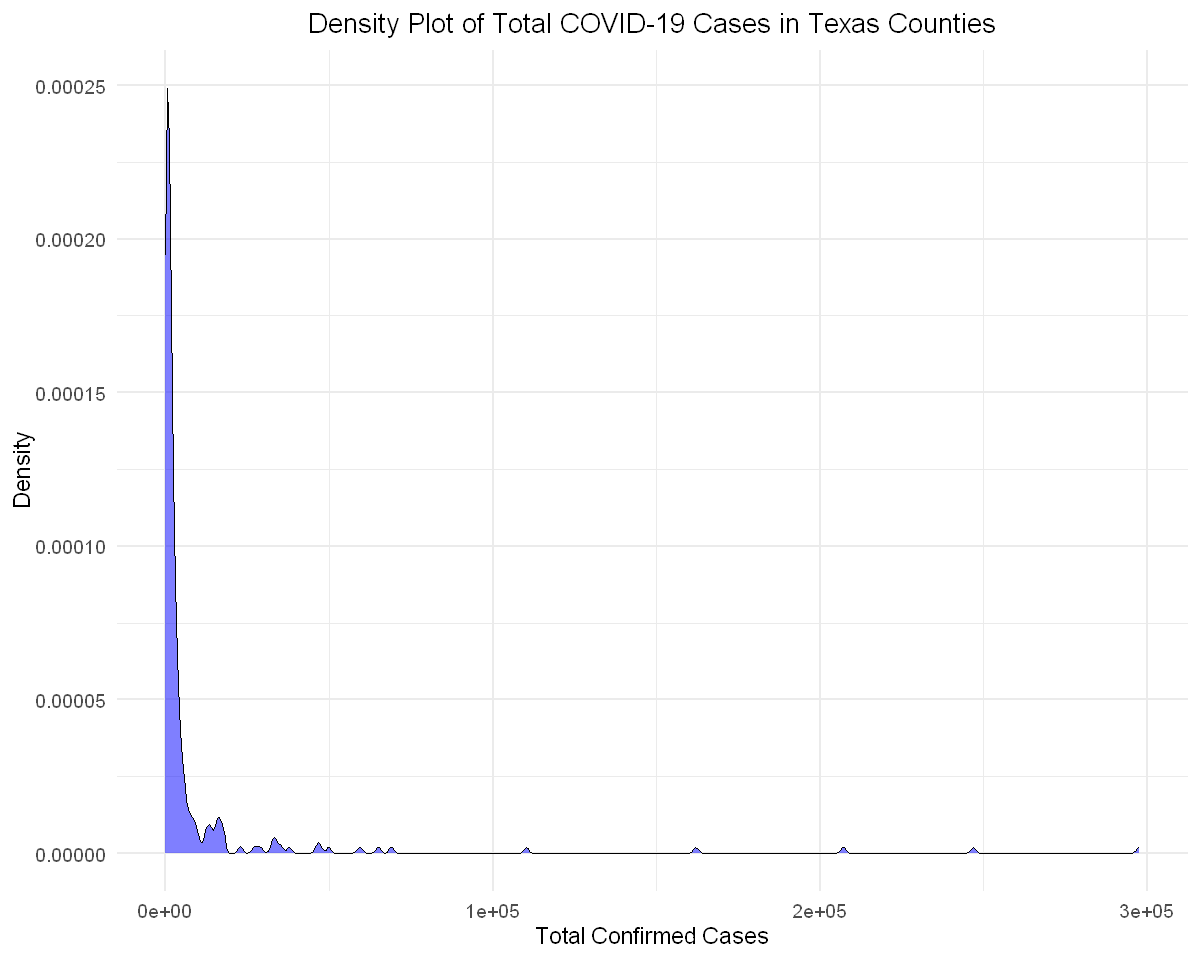

In [117]:
# Create a density plot for total_cases
ggplot(county_agg, aes(x = total_cases)) +
  geom_density(fill = "blue", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(title = "Density Plot of Total COVID-19 Cases in Texas Counties",
       x = "Total Confirmed Cases",
       y = "Density") +
  theme(plot.title = element_text(hjust = 0.5, size = 16))

In [118]:
# Merge mobility and census datasets based on region_2 (county)
merged_mobility_and_census <- merge(texas_mobility_data_cleaned, covid_census_tx_cleaned, by.x = "region_2", by.y = "county")

In [119]:
# Check for missing values and handle them
merged_mobility_and_census_clean <- merged_mobility_and_census %>%
  drop_na()


In [120]:
# Prepare the model formula - predicting COVID-19 cases using mobility and census variables
model_formula <- as.formula("cases ~ retail_change + grocery_change + workplace_change + residential_change + transit_change + median_income + public_trans_commuters + work_from_home + poverty + income_below_20k + food_stamps")


In [121]:
# Fit the linear regression model
model <- lm(model_formula, data = merged_mobility_and_census_clean)


In [122]:
# Summarize the model results
summary(model)



Call:
lm(formula = model_formula, data = merged_mobility_and_census_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-1906.4  -822.9  -244.4   842.2  3109.5 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.049e+03  1.344e+02   7.803 7.27e-15 ***
retail_change          -7.026e+00  2.134e+00  -3.292    0.001 ** 
grocery_change          7.231e+00  1.745e+00   4.144 3.47e-05 ***
workplace_change       -5.617e-01  2.442e+00  -0.230    0.818    
residential_change     -6.376e+00  7.344e+00  -0.868    0.385    
transit_change         -4.553e+00  1.132e+00  -4.022 5.85e-05 ***
median_income           1.804e-02  2.292e-03   7.869 4.33e-15 ***
public_trans_commuters  7.734e+00  5.965e-01  12.966  < 2e-16 ***
work_from_home          1.049e+00  5.218e-02  20.102  < 2e-16 ***
poverty                -3.251e-01  2.256e-02 -14.412  < 2e-16 ***
income_below_20k        1.148e+00  4.871e-02  23.565  < 2e-16 ***
food_stamps            

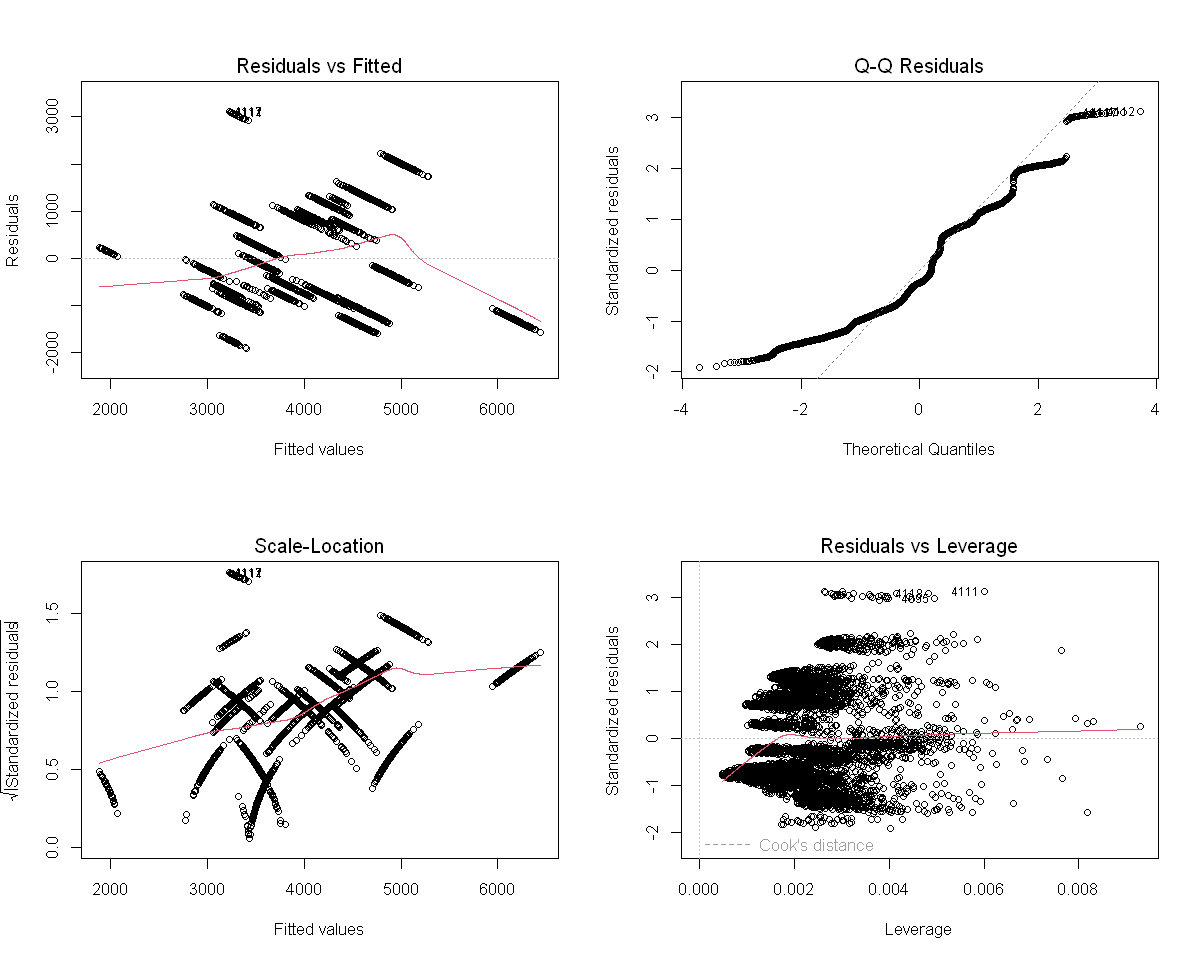

In [123]:
# Model Diagnostics (Check residuals)
par(mfrow = c(2, 2))
plot(model)


In [124]:
# Check VIF (Variance Inflation Factor) for multicollinearity
vif(model)

retail_change         grocery_change       workplace_change 
              2.763515               1.530980               4.062015 
    residential_change         transit_change          median_income 
              5.876347               1.689253               1.495394 
public_trans_commuters         work_from_home                poverty 
              1.626975               1.848126              34.574510 
      income_below_20k            food_stamps 
             33.441976               3.312154

In [125]:
# Evaluate model performance using RMSE and R-squared
rmse <- sqrt(mean(model$residuals^2))
cat("RMSE: ", rmse, "\n")

rsq <- summary(model)$r.squared
cat("R-squared: ", rsq, "\n")


RMSE:  998.5824 
R-squared:  0.395759 


R-squared:  0.395759 


In [126]:
# Predict COVID-19 cases using the model
predictions <- predict(model, newdata = merged_mobility_and_census_clean)


`geom_smooth()` using formula = 'y ~ x'


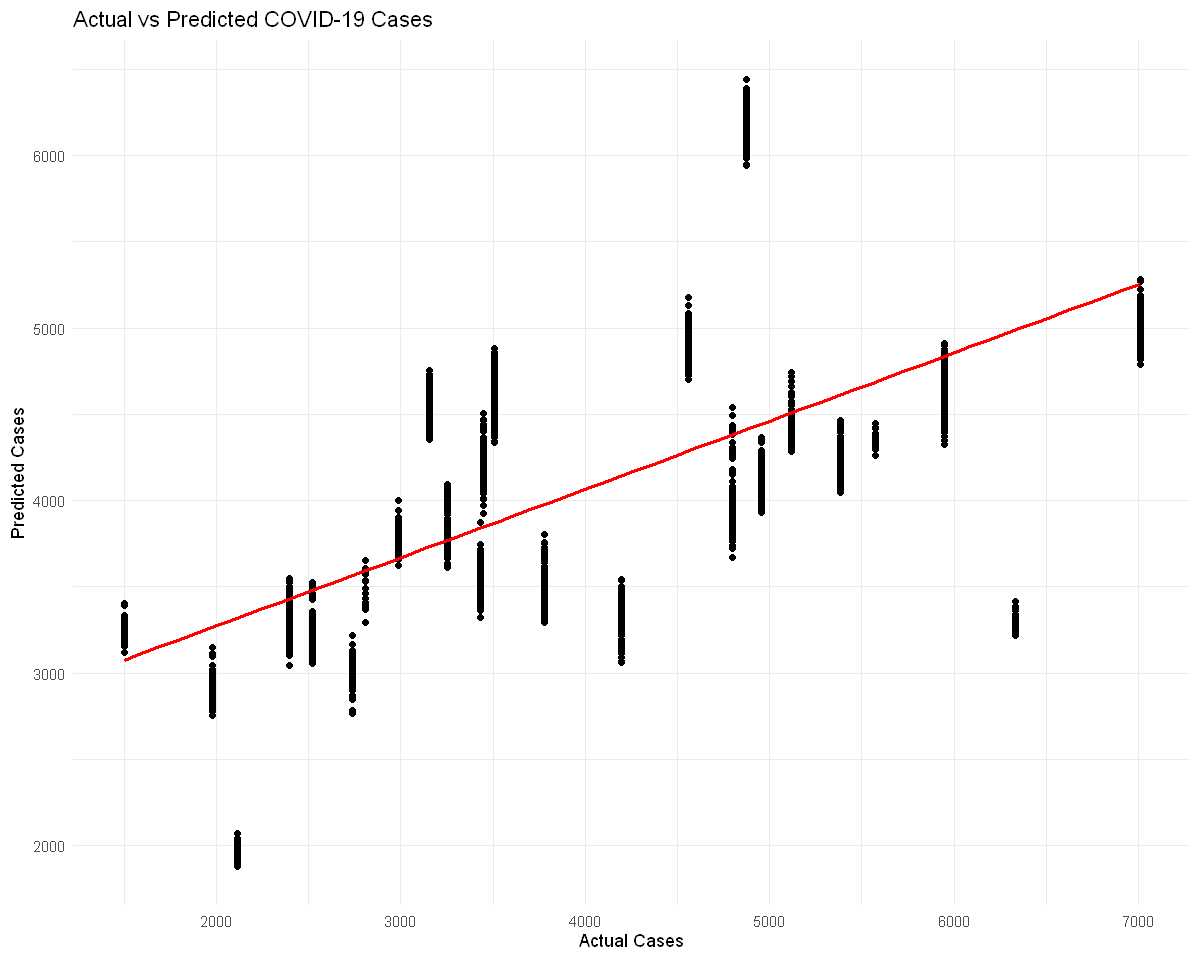

In [127]:
# Visualize the predicted vs actual values
ggplot(merged_mobility_and_census_clean, aes(x = cases, y = predictions)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Actual vs Predicted COVID-19 Cases", x = "Actual Cases", y = "Predicted Cases") +
  theme_minimal()
